# ADVANCE REGRESSION ASSIGNMENT

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know the following things about the prospective properties:
Which variables are significant in predicting the price of a house, and
How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

 

## BUSINESS GOAL

Model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# Step 1: Import and Inspect Data

In [358]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [359]:
house_df=pd.read_csv("train.csv") # importing data
house_df.head() # check the 5 top rows

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [360]:
house_df.shape # shape of dataset

(1460, 81)

In [361]:
house_df.describe() # check the data stats

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [362]:
house_df.info() # check the columns and info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Step2: Data Cleaning and Visualization

### <font color=purple> Checking percentage of Null values and taking required actions

In [363]:
# Creating a function to pull the null counts and its percentage

def find_NaN(df):
    NaN_cnt = df.isna().sum()
    NaN_pct = (df.isna().sum()/df.isna().count()*100)
    return pd.concat([NaN_cnt, NaN_pct], axis=1, keys=['Cnt_of_Nulls', 'Null_Percentage'])

In [364]:
find_NaN(house_df) #check null count and percentage

,Cnt_of_Nulls,Null_Percentage
Id,0,0.000000
MSSubClass,0,0.000000
MSZoning,0,0.000000
LotFrontage,259,17.739726
LotArea,0,0.000000
Street,0,0.000000
Alley,1369,93.767123
LotShape,0,0.000000
LandContour,0,0.000000
Utilities,0,0.000000


In [365]:
null_vals=find_NaN(house_df)
null_vals[null_vals.Cnt_of_Nulls>0] #checking variables with nullvalues 

,Cnt_of_Nulls,Null_Percentage
LotFrontage,259,17.739726
Alley,1369,93.767123
MasVnrType,8,0.547945
MasVnrArea,8,0.547945
BsmtQual,37,2.534247
BsmtCond,37,2.534247
BsmtExposure,38,2.602740
BsmtFinType1,37,2.534247
BsmtFinType2,38,2.602740
Electrical,1,0.068493


### <font color=purple> IMPUTING MISSING VALUES

#### We Observe that few columns have NA value because that feature is not present for the house, hence we can impute them with a value.
Example: GarageType having NA, here the NA means there is no garage, so we can impute with 'No garage'

In [366]:
#imputing values with "No ..""
house_df['Alley'].fillna('No alley access',inplace = True)
house_df['BsmtQual'].fillna('No Basement for qual',inplace = True)
house_df['BsmtCond'].fillna('No Basement for cond', inplace=True)
house_df['BsmtExposure'].fillna('No Basement for expo', inplace=True)
house_df['BsmtFinType1'].fillna('No Basement for fintype1', inplace=True)
house_df['BsmtFinType2'].fillna('No Basement for fintype2', inplace=True)
house_df['FireplaceQu'].fillna('No Fireplace', inplace=True)
house_df['GarageType'].fillna('No Garage', inplace=True)
house_df['GarageFinish'].fillna('No Garage finish', inplace=True)
house_df['GarageQual'].fillna('No Garage finish', inplace=True)
house_df['GarageCond'].fillna('No Garage cond', inplace=True)
house_df['PoolQC'].fillna('No Pool', inplace=True)
house_df['Fence'].fillna('No Fence', inplace=True)

In [367]:
#checking the nullValues
null_vals=find_NaN(house_df)
null_vals[null_vals.Cnt_of_Nulls>0] #checking variables which have null

,Cnt_of_Nulls,Null_Percentage
LotFrontage,259,17.739726
MasVnrType,8,0.547945
MasVnrArea,8,0.547945
Electrical,1,0.068493
GarageYrBlt,81,5.547945
MiscFeature,1406,96.301370


MiscFeature has more than 95% missing Values, hence we drop this column 

In [368]:
house_df = house_df.drop('MiscFeature',axis = 1) #droping MiscFeature column 

In [369]:
house_df[['LotFrontage','MasVnrType','MasVnrArea','Electrical','GarageYrBlt']].head() #checking details of the columns with nullvalues

,LotFrontage,MasVnrType,MasVnrArea,Electrical,GarageYrBlt
0,65.0,BrkFace,196.0,SBrkr,2003.0
1,80.0,None,0.0,SBrkr,1976.0
2,68.0,BrkFace,162.0,SBrkr,2001.0
3,60.0,None,0.0,SBrkr,1998.0
4,84.0,BrkFace,350.0,SBrkr,2000.0


In [370]:
house_df[['LotFrontage','MasVnrArea','GarageYrBlt']].describe() #checking the numeric nullvalue columns to choose between mean and median 

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


In [371]:
# impute missing values with mean or median for numeric data
house_df["LotFrontage"]=house_df["LotFrontage"].replace(np.nan, house_df["LotFrontage"].mean()) 
house_df["MasVnrArea"]=house_df["MasVnrArea"].replace(np.nan, house_df["MasVnrArea"].mean())
house_df["GarageYrBlt"]=house_df["GarageYrBlt"].replace(np.nan, house_df["GarageYrBlt"].mean())
                                                 

In [372]:
# impute missing values with mode for catergorical data
house_df['Electrical'] = house_df['Electrical'].fillna(house_df['Electrical']).mode()[0]
house_df['MasVnrType'] = house_df['MasVnrType'].fillna(house_df['MasVnrType']).mode()[0]


In [373]:
#checking the nullValues
null_vals=find_NaN(house_df)
null_vals[null_vals.Cnt_of_Nulls>0] #checking variables which have null

,Cnt_of_Nulls,Null_Percentage


There are no NULL values present now.
We will now proceed further.

In [374]:
house_df.info() #check the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### <font color=purple> CHECKING SKEWNESS OF CATEGORICAL DATA

In [375]:
#list all columns with dtype object
house_df.select_dtypes(include=object).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [376]:
cat_col=['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'SaleType',
       'SaleCondition']

In [377]:
# Creating a function to check unique values and its percentanges in the remaining columns of lead_df to understand the skewness within the columns

def v_cnts(cols):
    for i in cols:
        print("***************************************************************")
        print(i)
        print("----------------------------------------------------------------")
        print(house_df[i].value_counts(normalize=True, dropna=False)*100) 

In [378]:
v_cnts(cat_col)

***************************************************************
MSZoning
----------------------------------------------------------------
RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: MSZoning, dtype: float64
***************************************************************
Street
----------------------------------------------------------------
Pave    99.589041
Grvl     0.410959
Name: Street, dtype: float64
***************************************************************
Alley
----------------------------------------------------------------
No alley access    93.767123
Grvl                3.424658
Pave                2.808219
Name: Alley, dtype: float64
***************************************************************
LotShape
----------------------------------------------------------------
Reg    63.356164
IR1    33.150685
IR2     2.808219
IR3     0.684932
Name: LotShape, dtype: float64
**************************************

### <font color=red> <u>__INFERENCE__</u>
    
The Following Columns are highly skewed, one of the values have 90% count, hence it is Skewed.
'Street','Alley','Utilities','LandSlope','Condition2','RoofMatl','MasVnrType','Heating','CentralAir','Electrical','Functional','GarageCond','PavedDrive','PoolQC'

In [379]:
# Creating different functions for visualizing the data


# Creating a function for annotation of bar graphs- Horizontal
def ann_h(df):
   
    totals = []

    # find the values and append to list
    for i in df.patches:
        totals.append(i.get_height())

    # set individual bar lables using above list
    total = sum(totals)

    # set individual bar lables using above list
    for i in df.patches:
        # get_x pulls left or right; get_height pushes up or down
        df.text(i.get_x()+.29, i.get_height(), \
                str(round((i.get_height()/total)*100, 2))+'%', fontsize=15)
        
#count plot functionn
        
def cnt(col):    
    for i in col:
        plt.figure(figsize = (30,15)) 
        p=sns.countplot(house_df[i]) #ploting for varibales
        ann_h(p)
        plt.xticks(rotation=90, fontsize=20)
        plt.xlabel(i, fontsize=20)
        plt.ylabel('Count', fontsize=0)
        plt.yticks(fontsize=20)
        plt.show()
        
# Pie plot function
        
def pi(col):    
    for i in col:
        plt.figure(figsize = (8,8)) 
        house_df[i].value_counts(normalize= True).plot.pie(autopct='%1.1f%%') #ploting pie plots
        plt.show()
        

# Box plot function

def box_plot(col):
    plt.figure(figsize=(20, 15))
    for i in enumerate(col):
        plt.subplot(3,3,i[0]+1)
        sns.boxplot(x = i[1],y=house_df['SalePrice'],data =house_df)
        
        
        


#### Let us check the skewness with help of visualization 

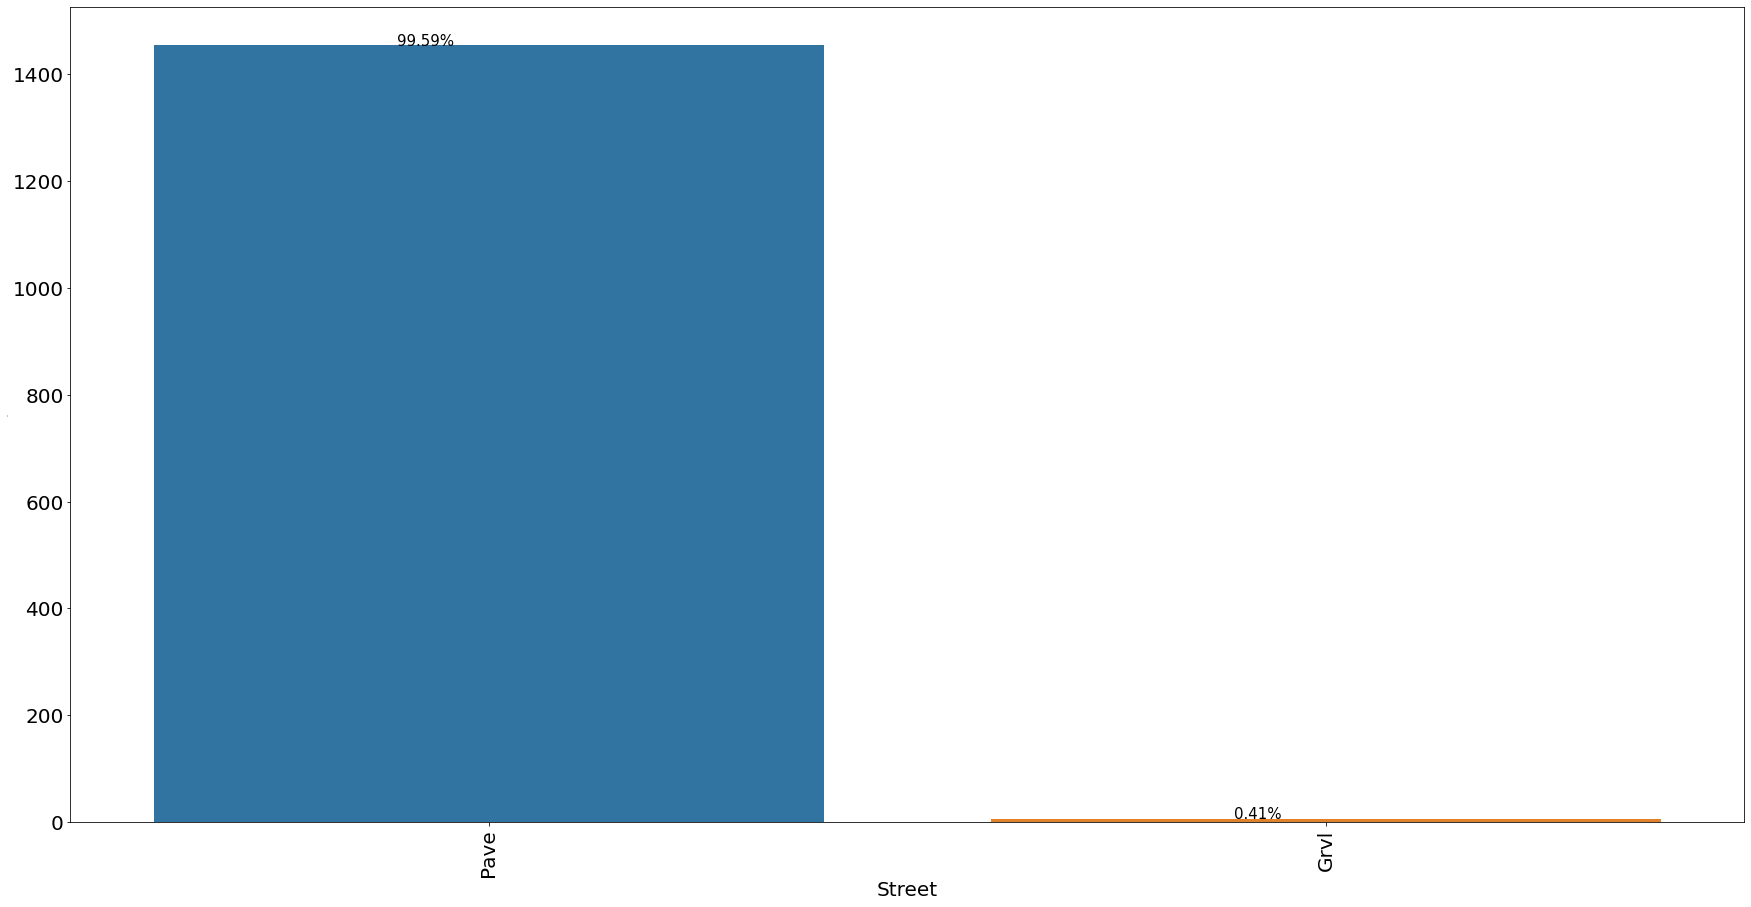

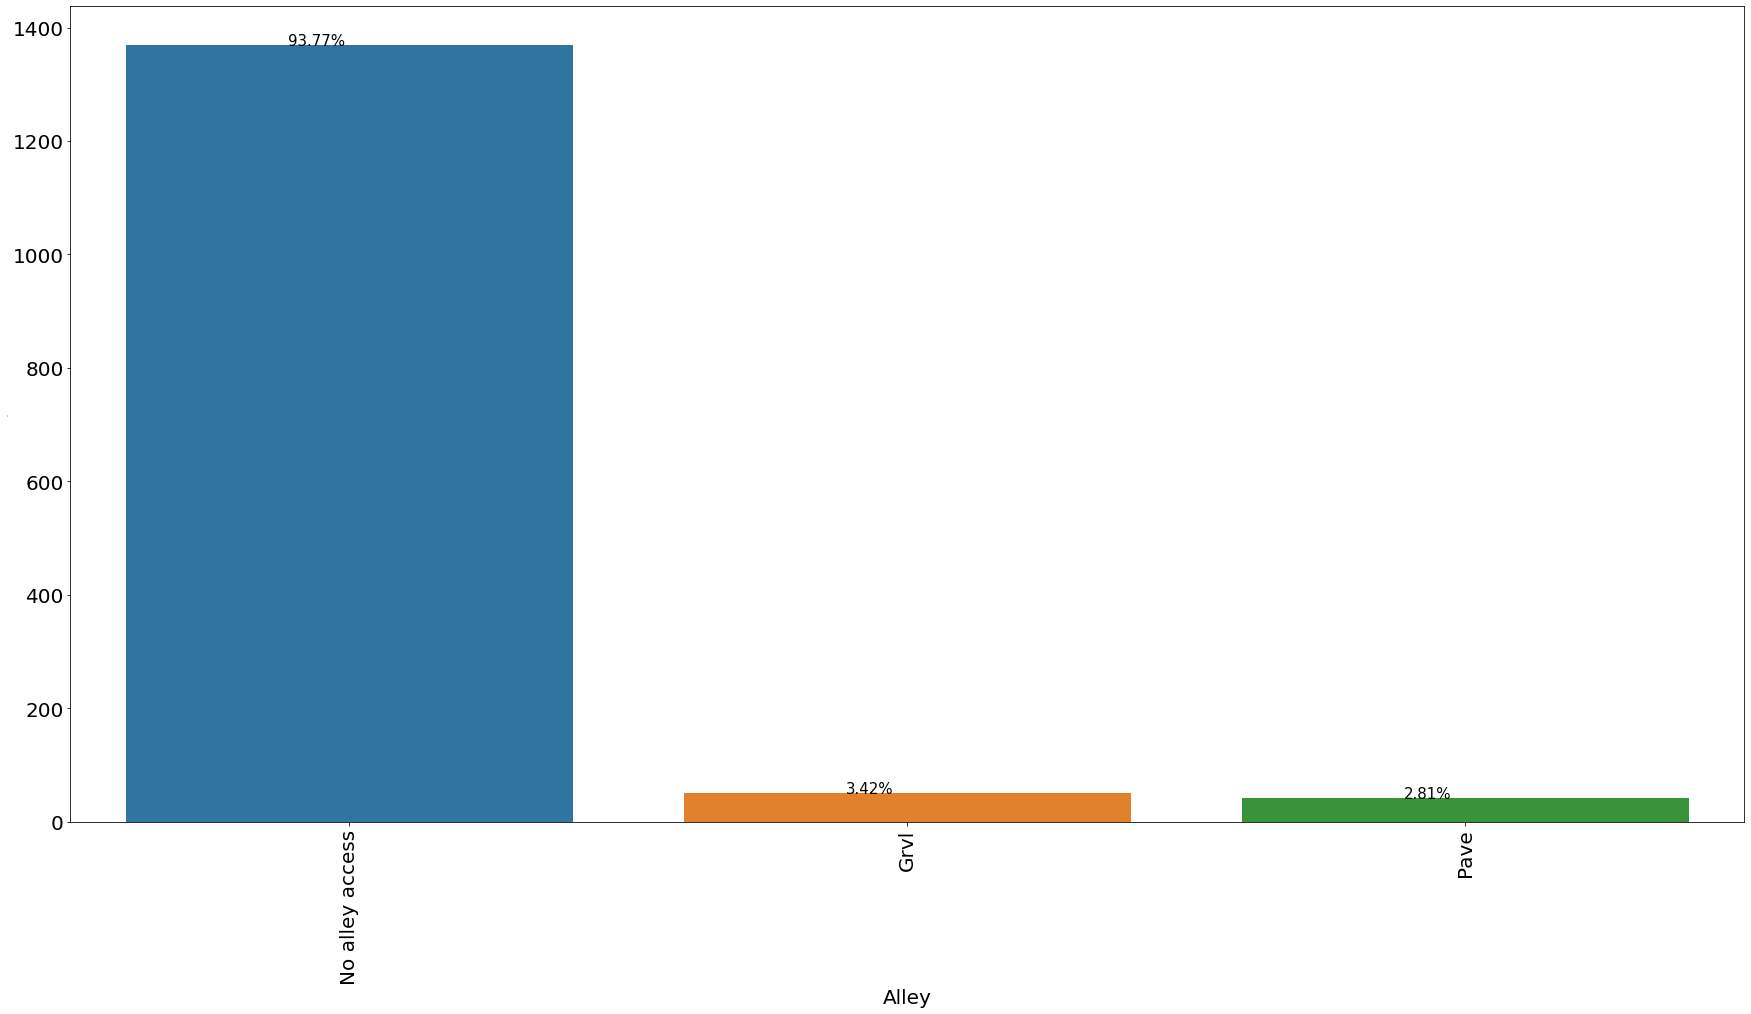

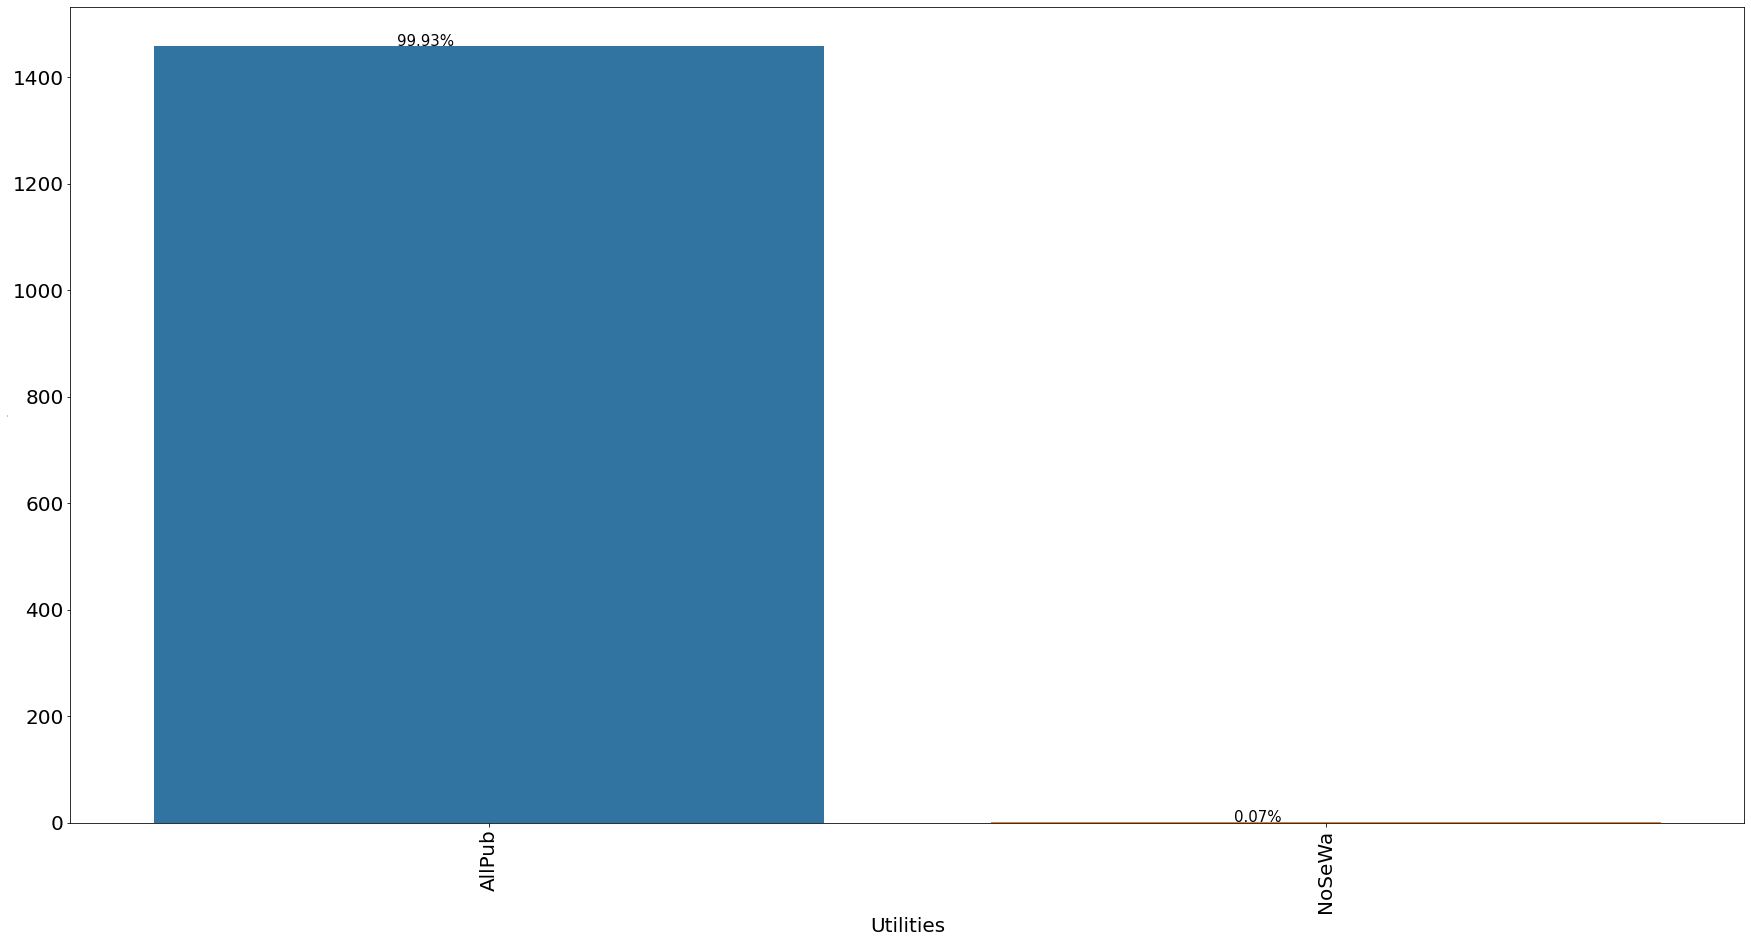

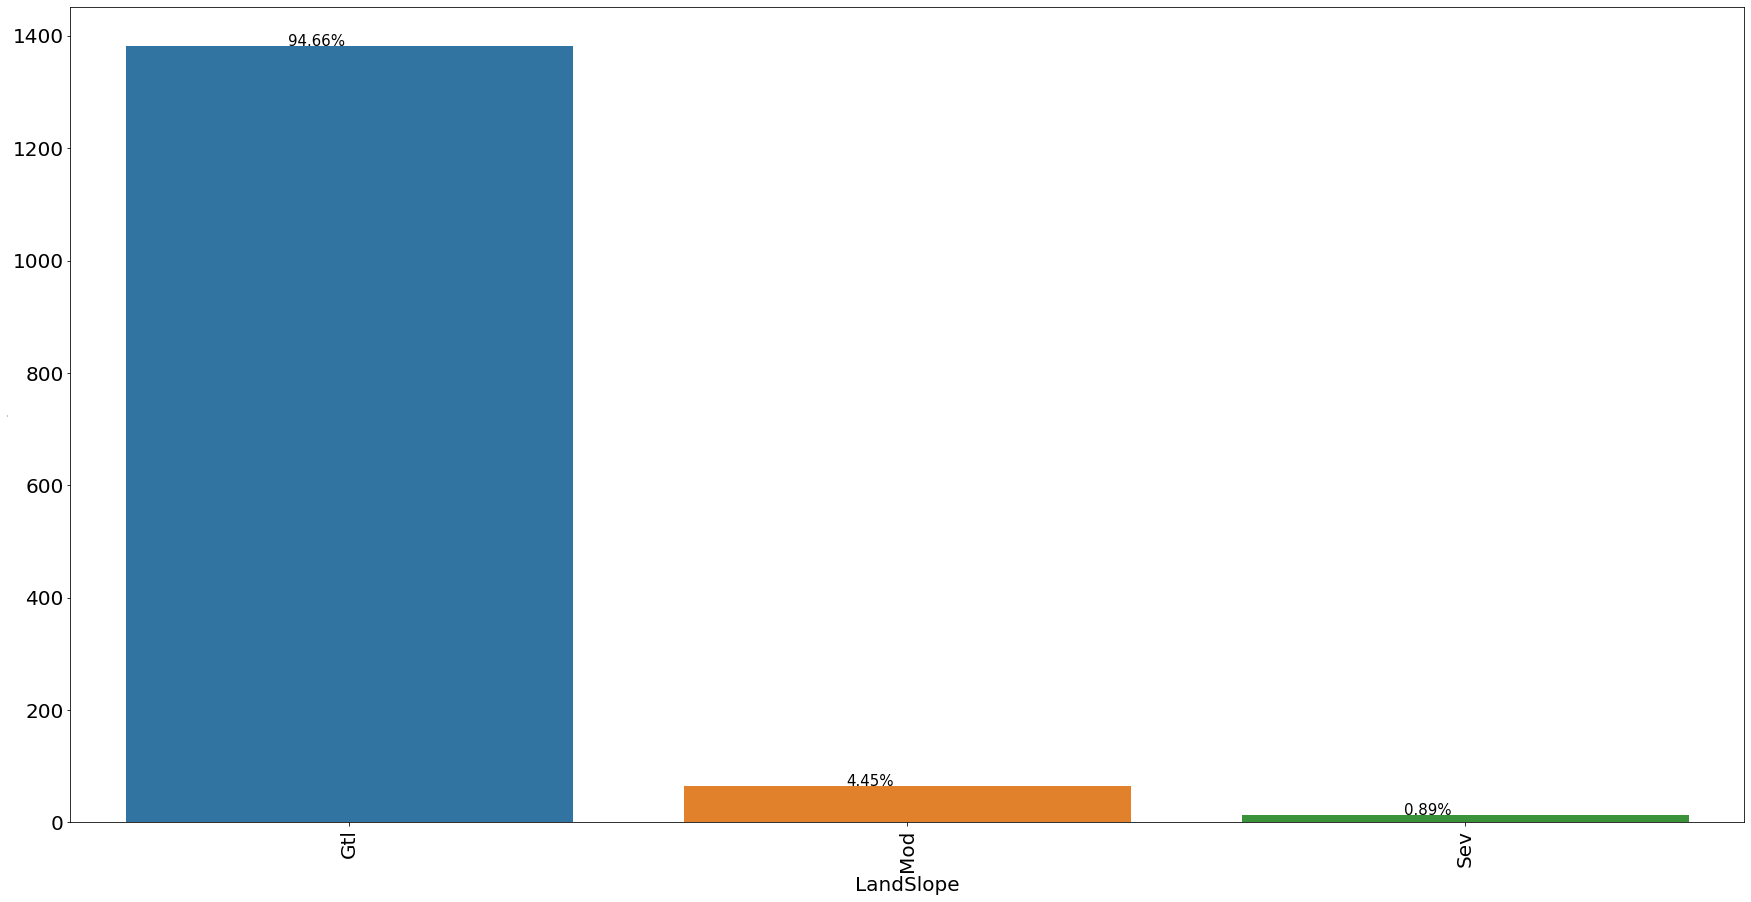

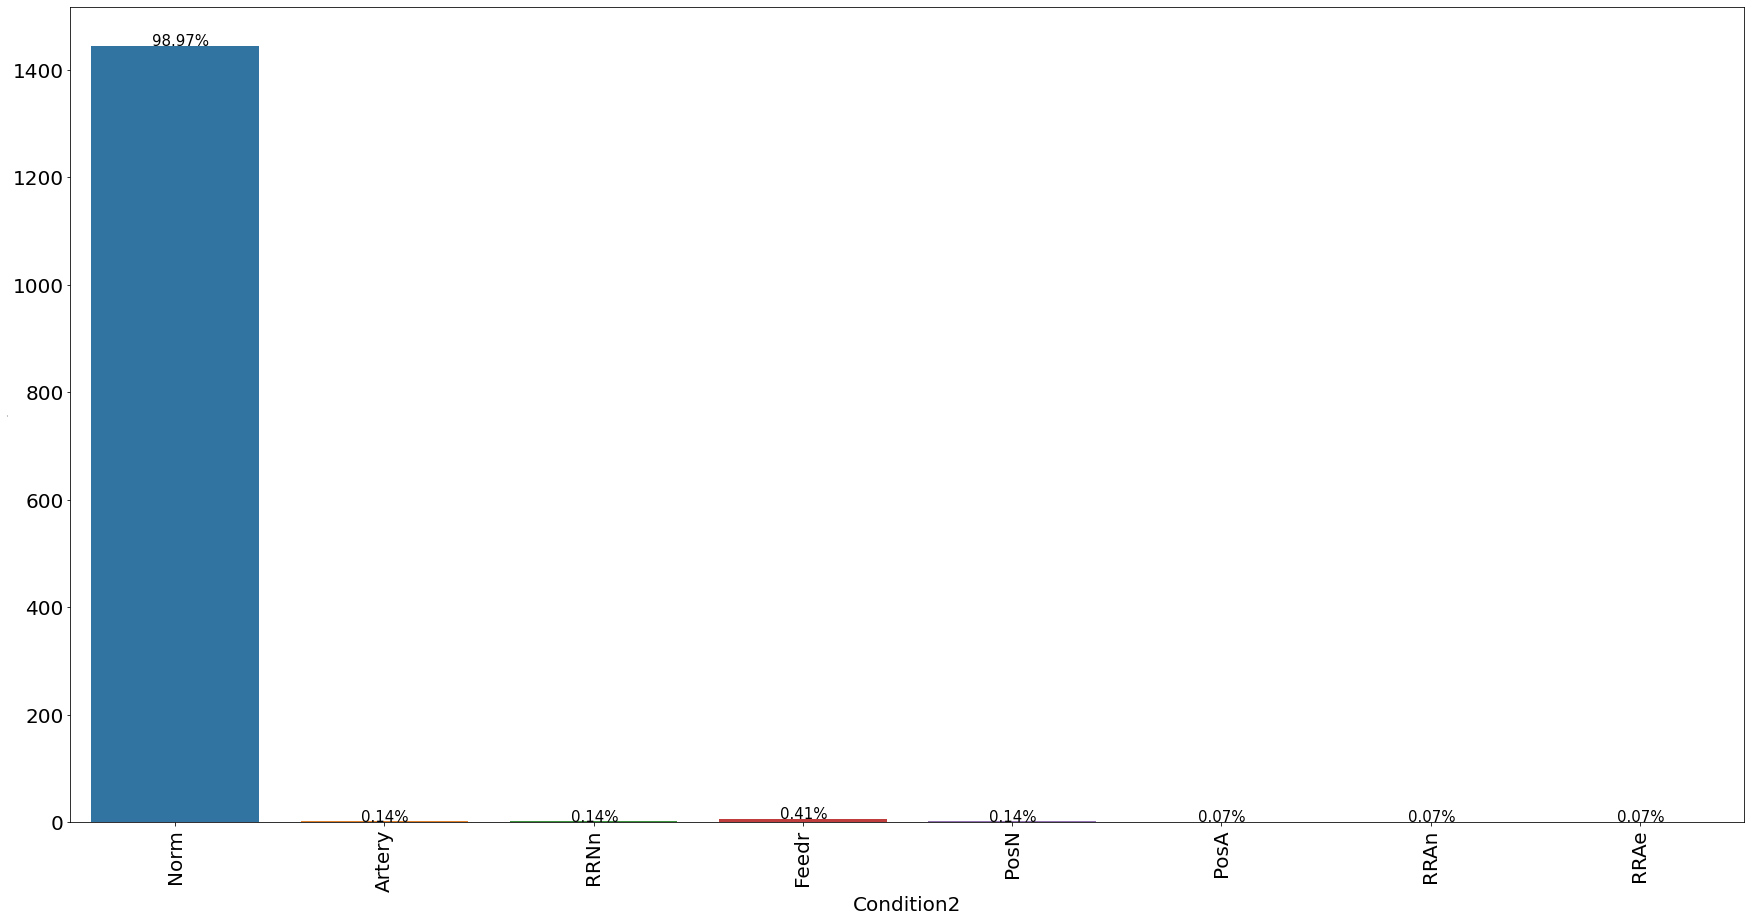

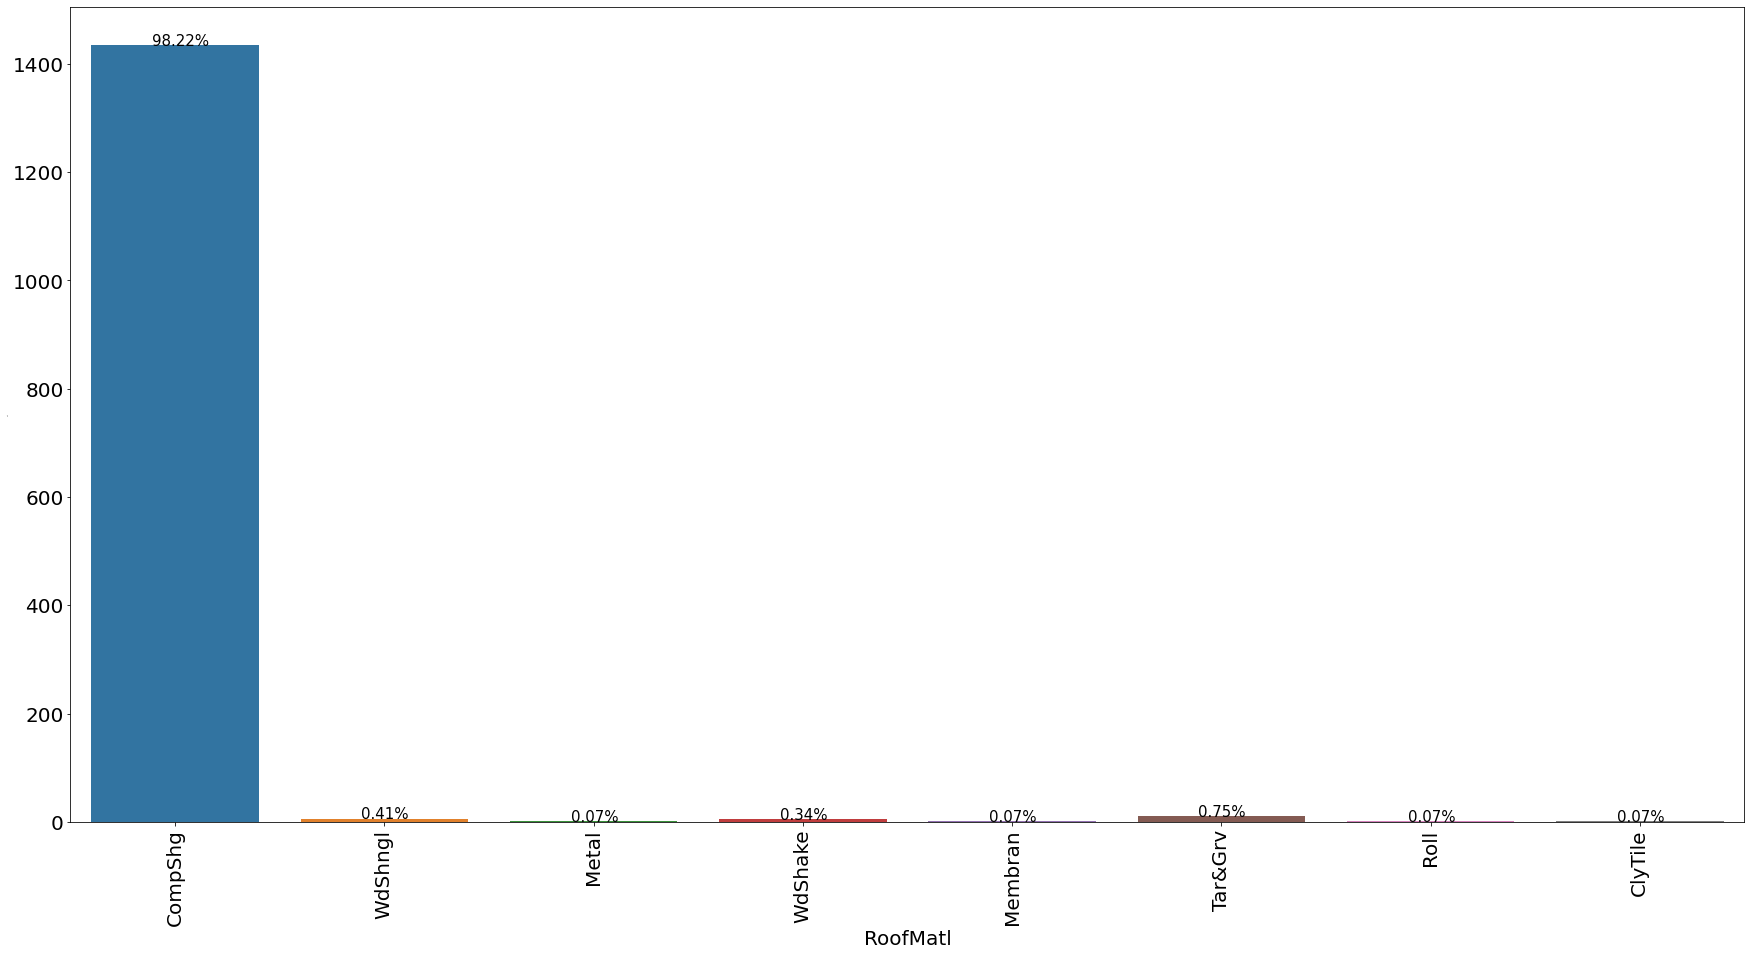

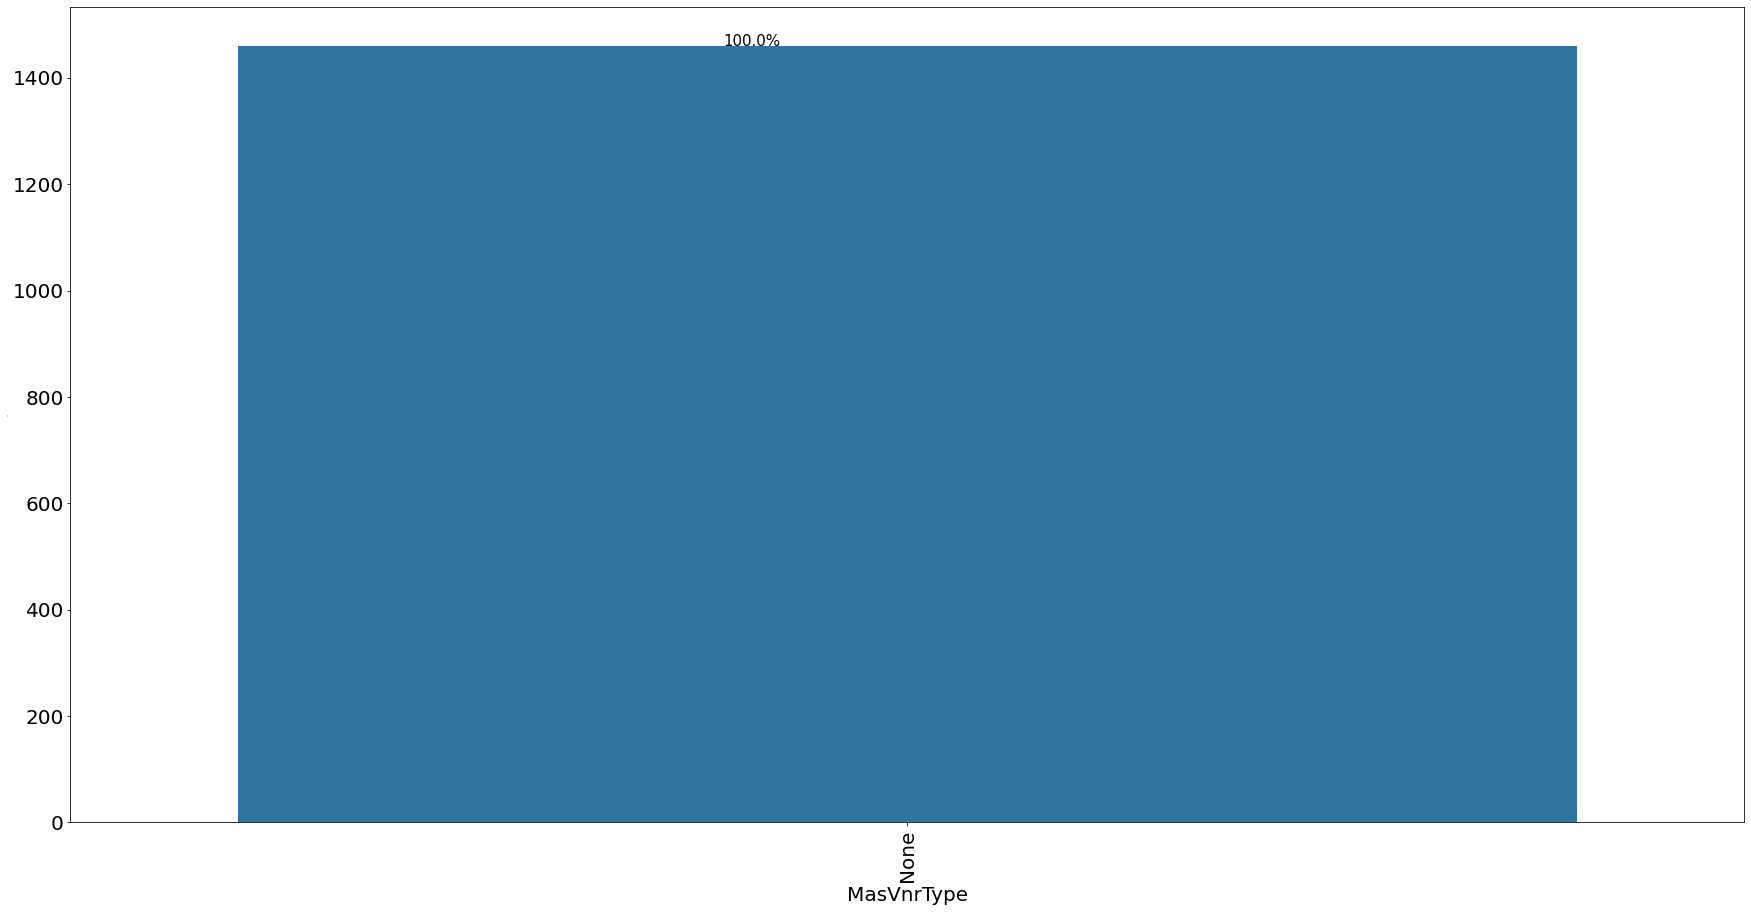

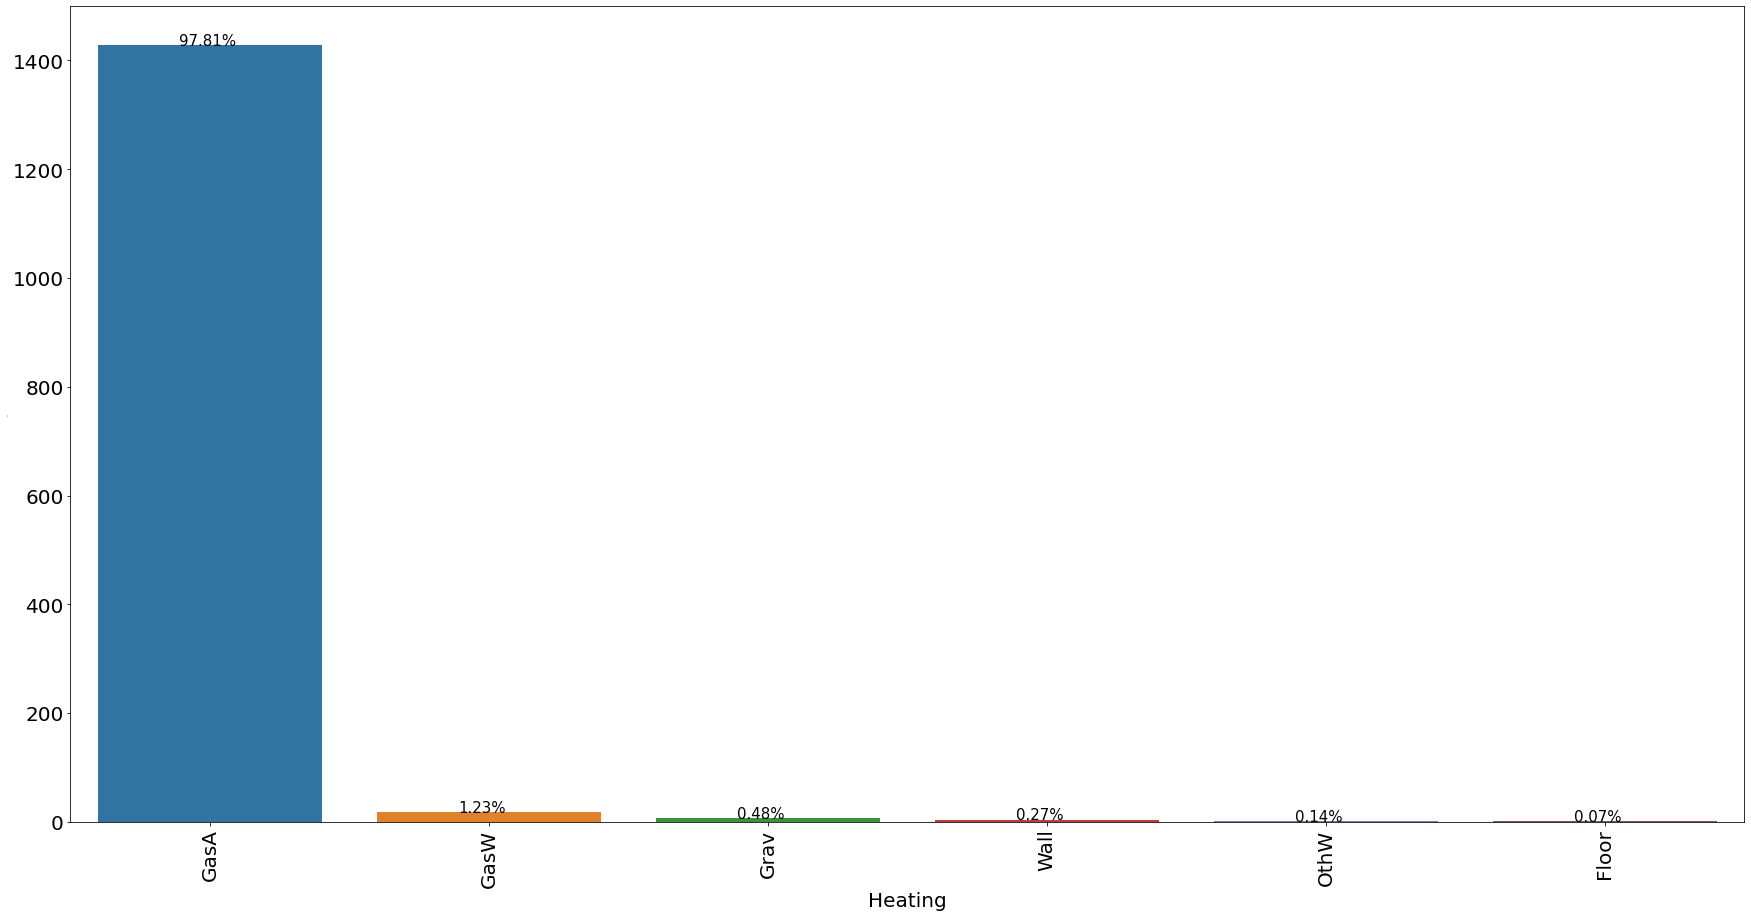

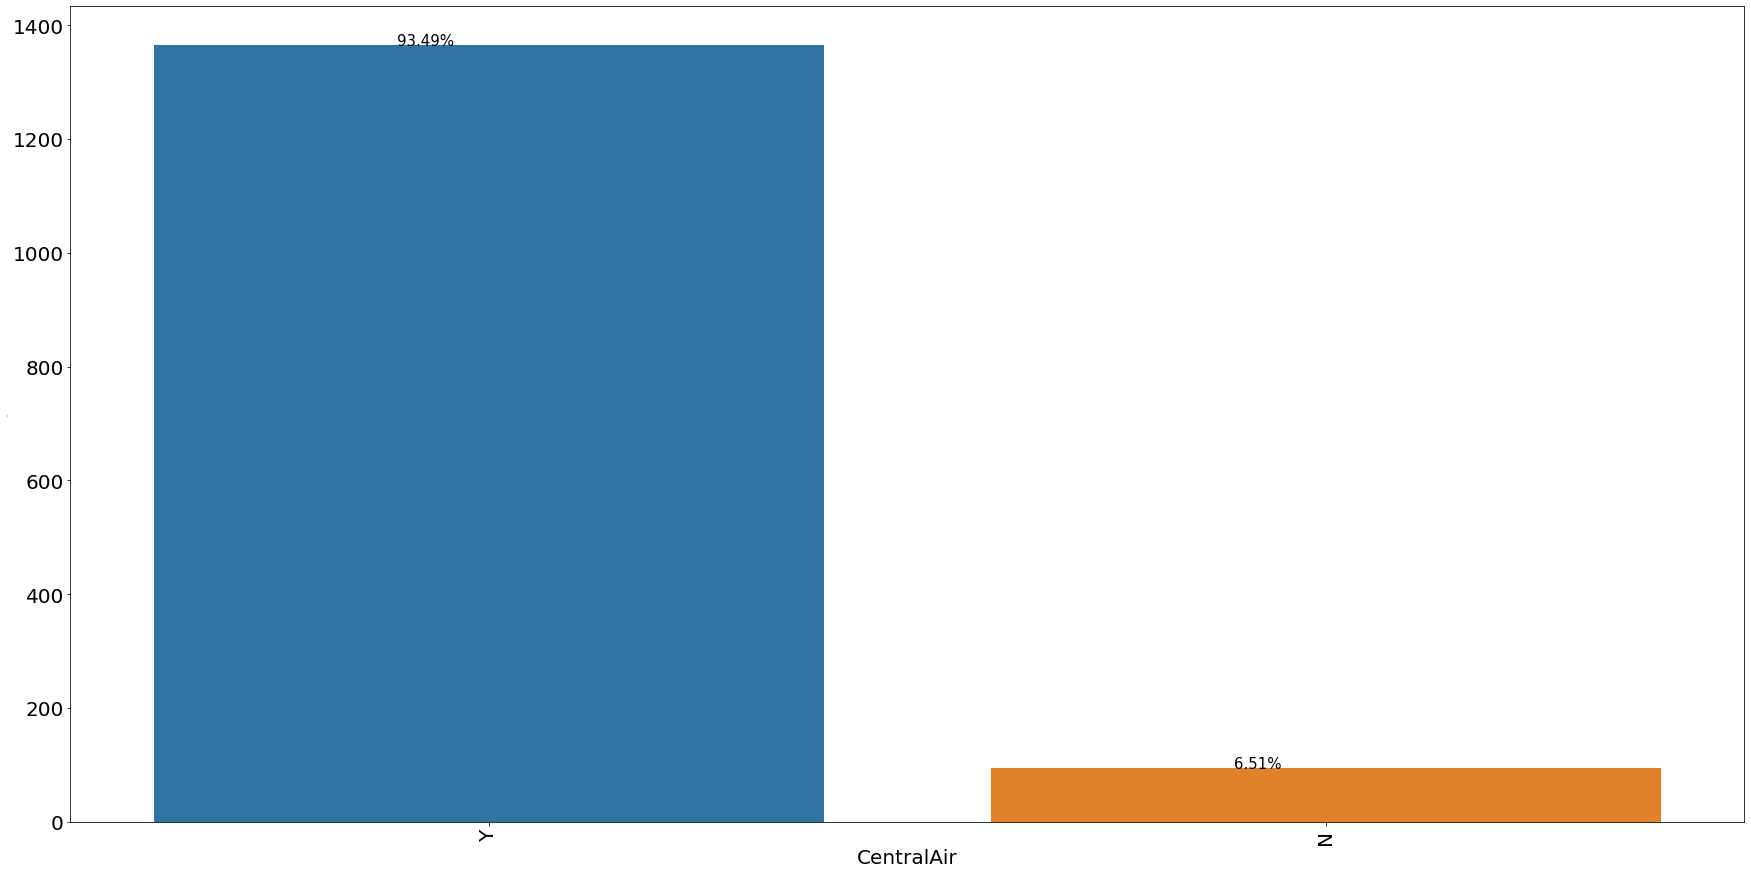

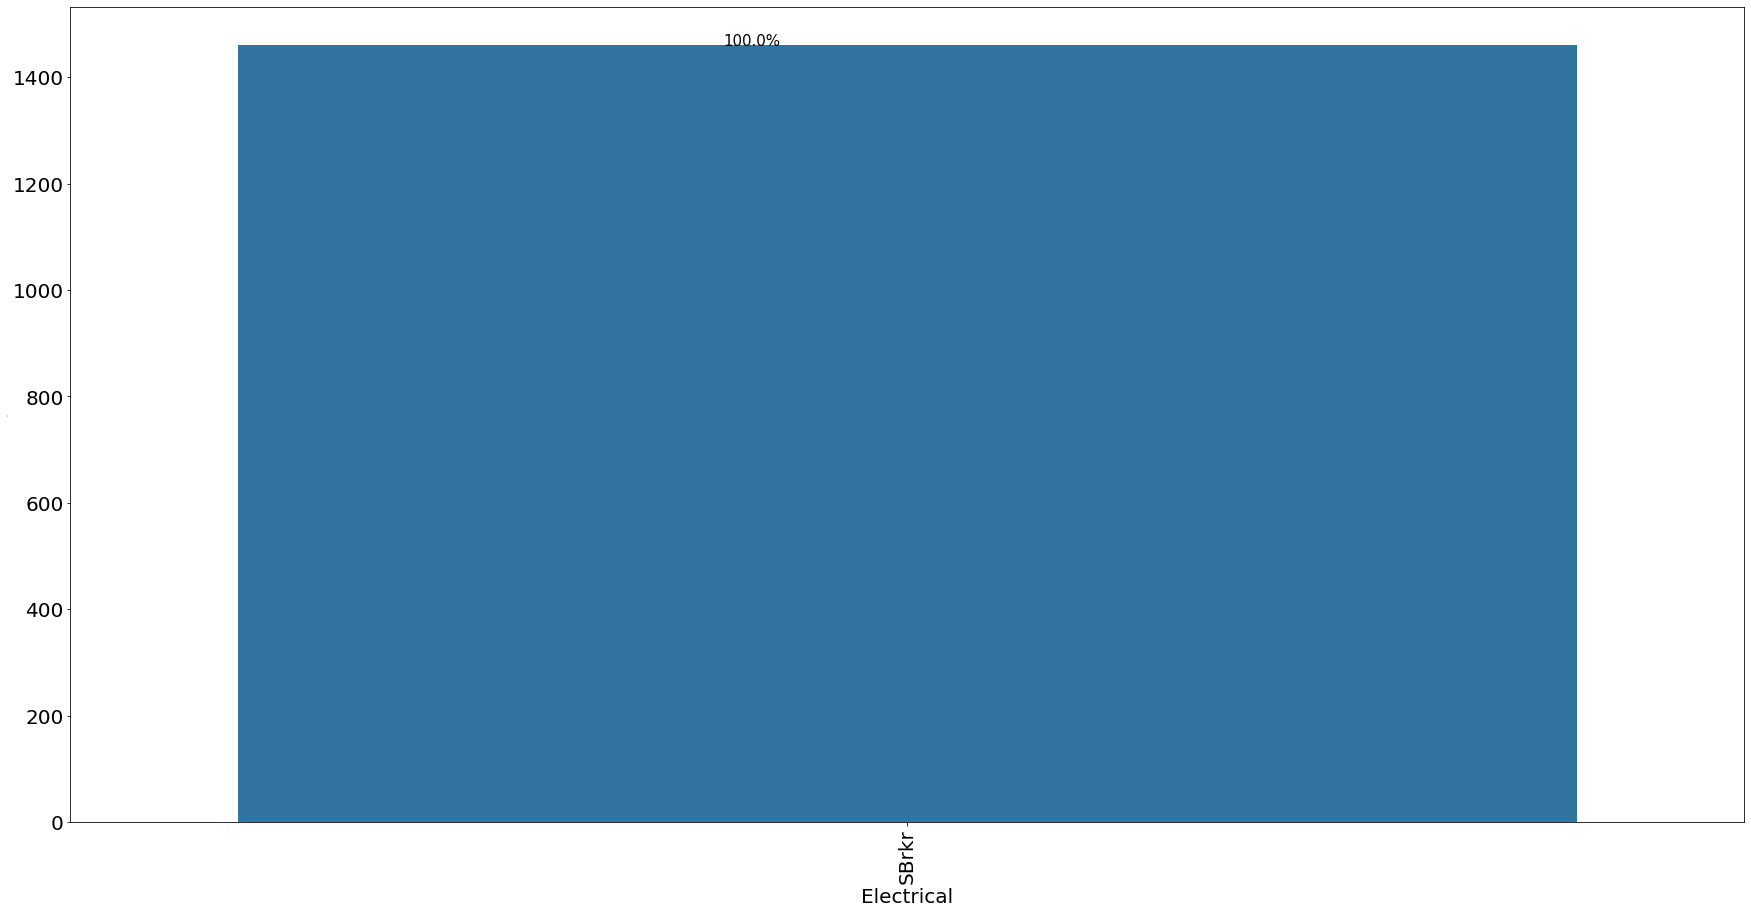

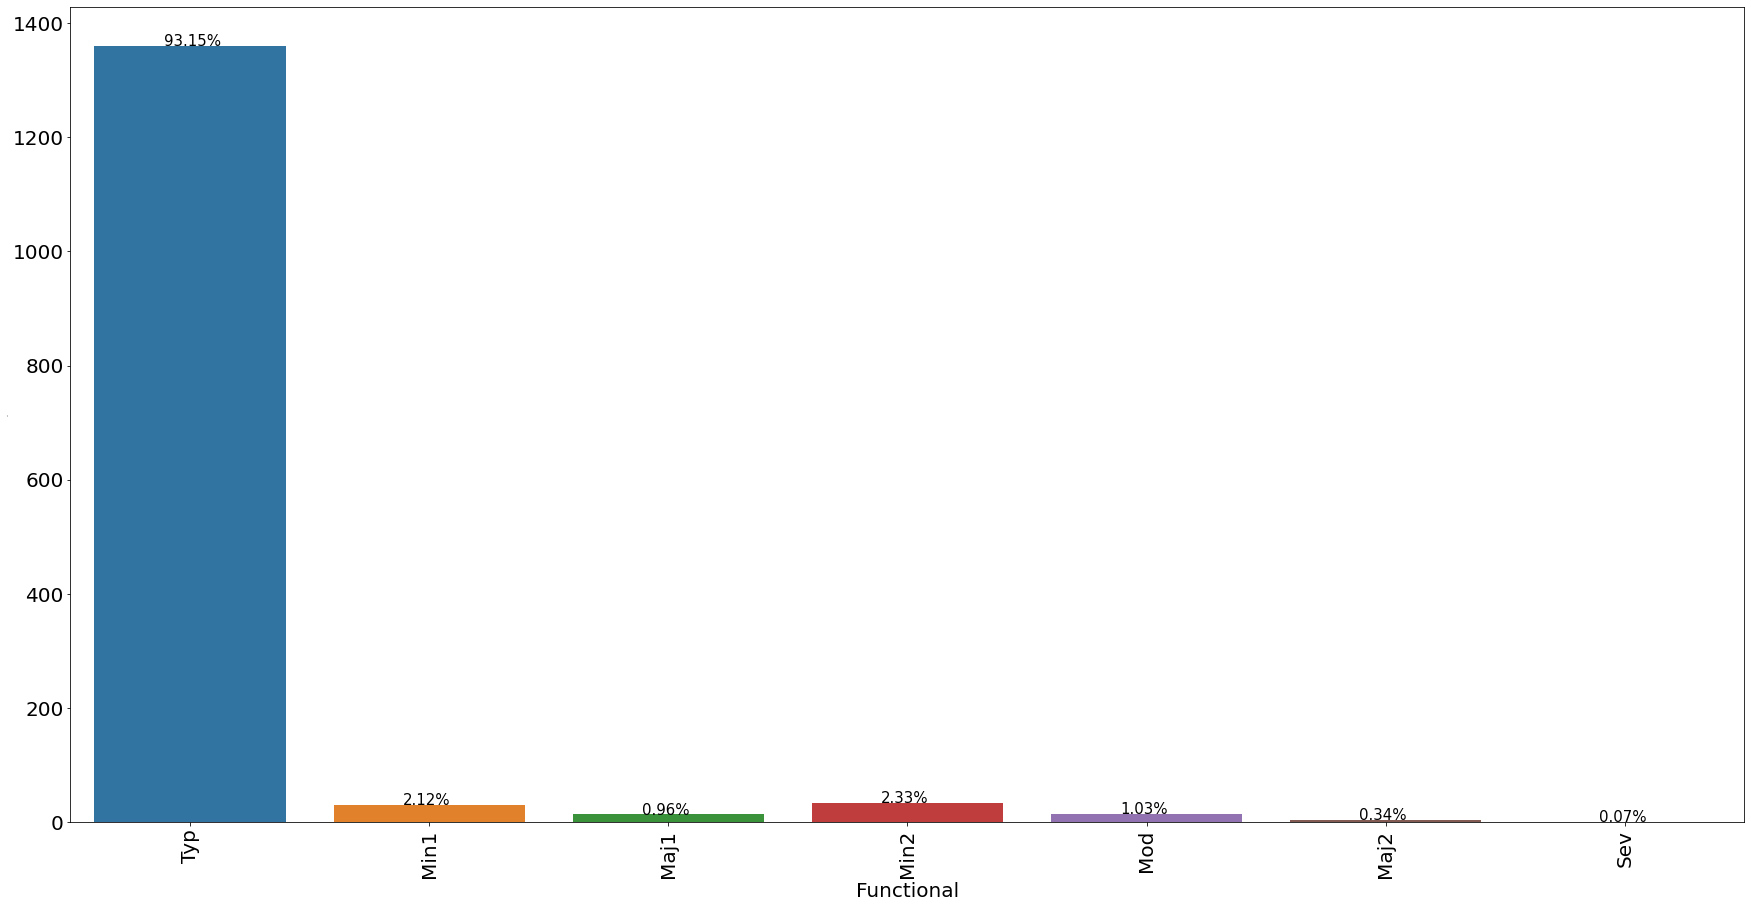

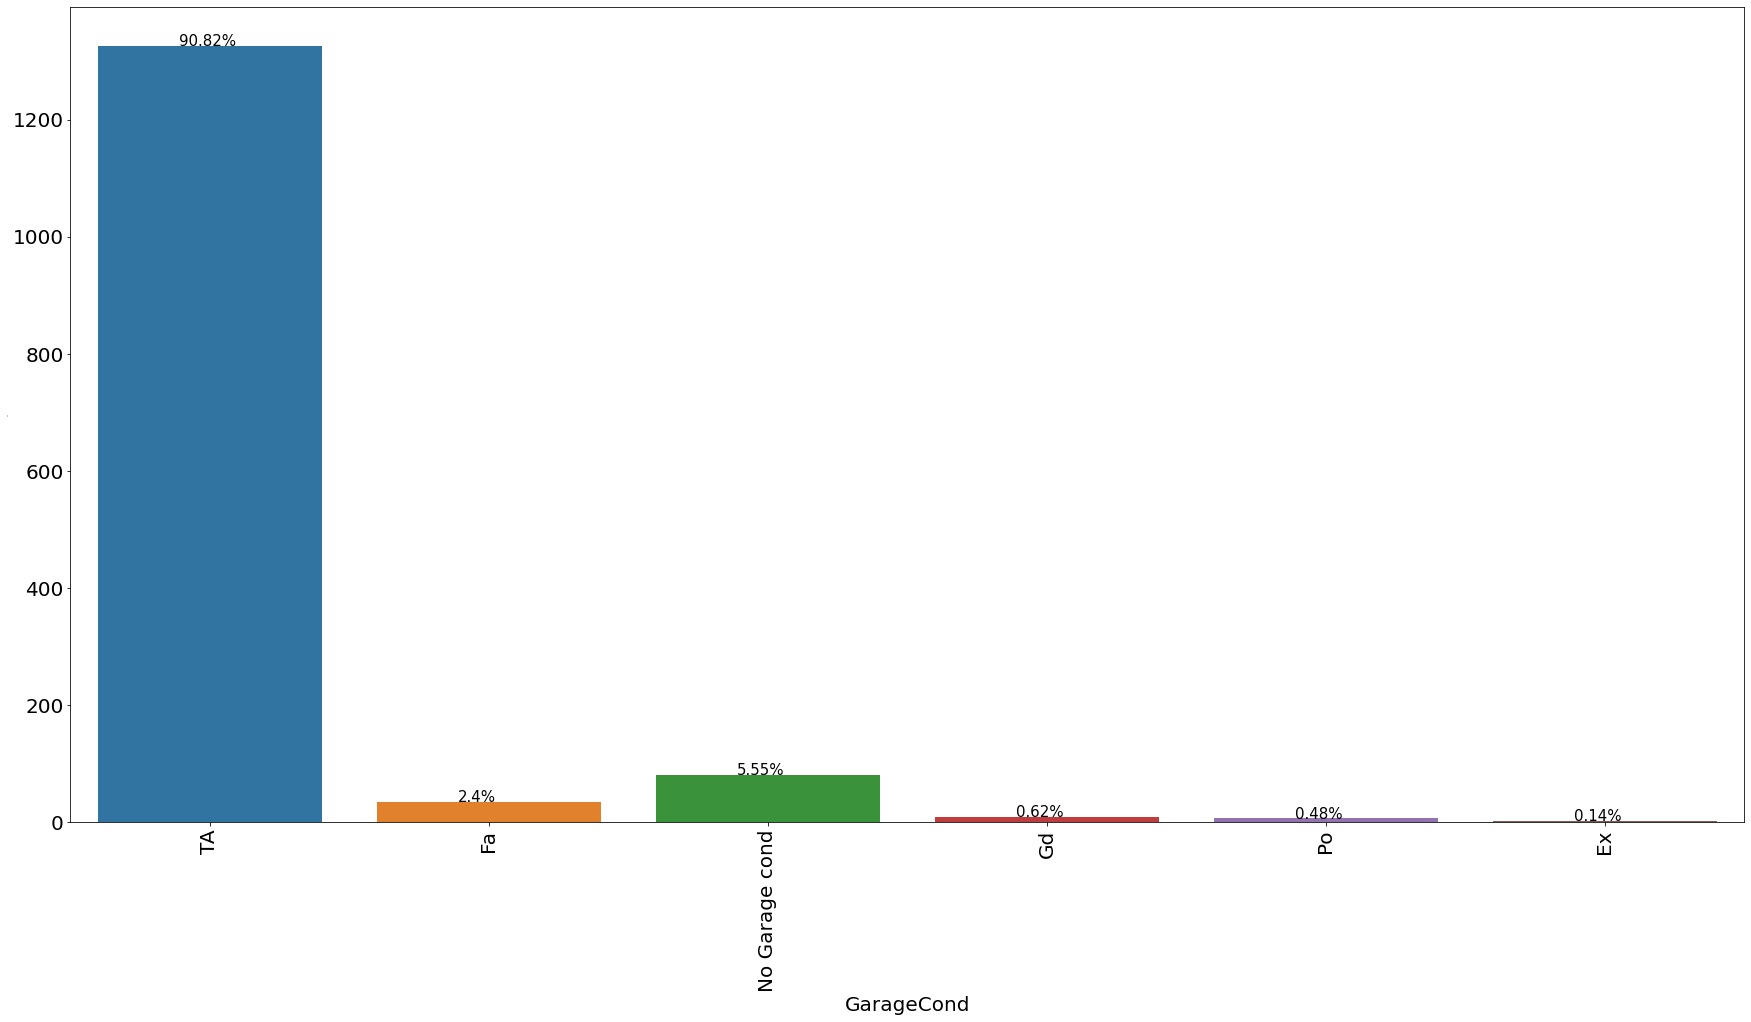

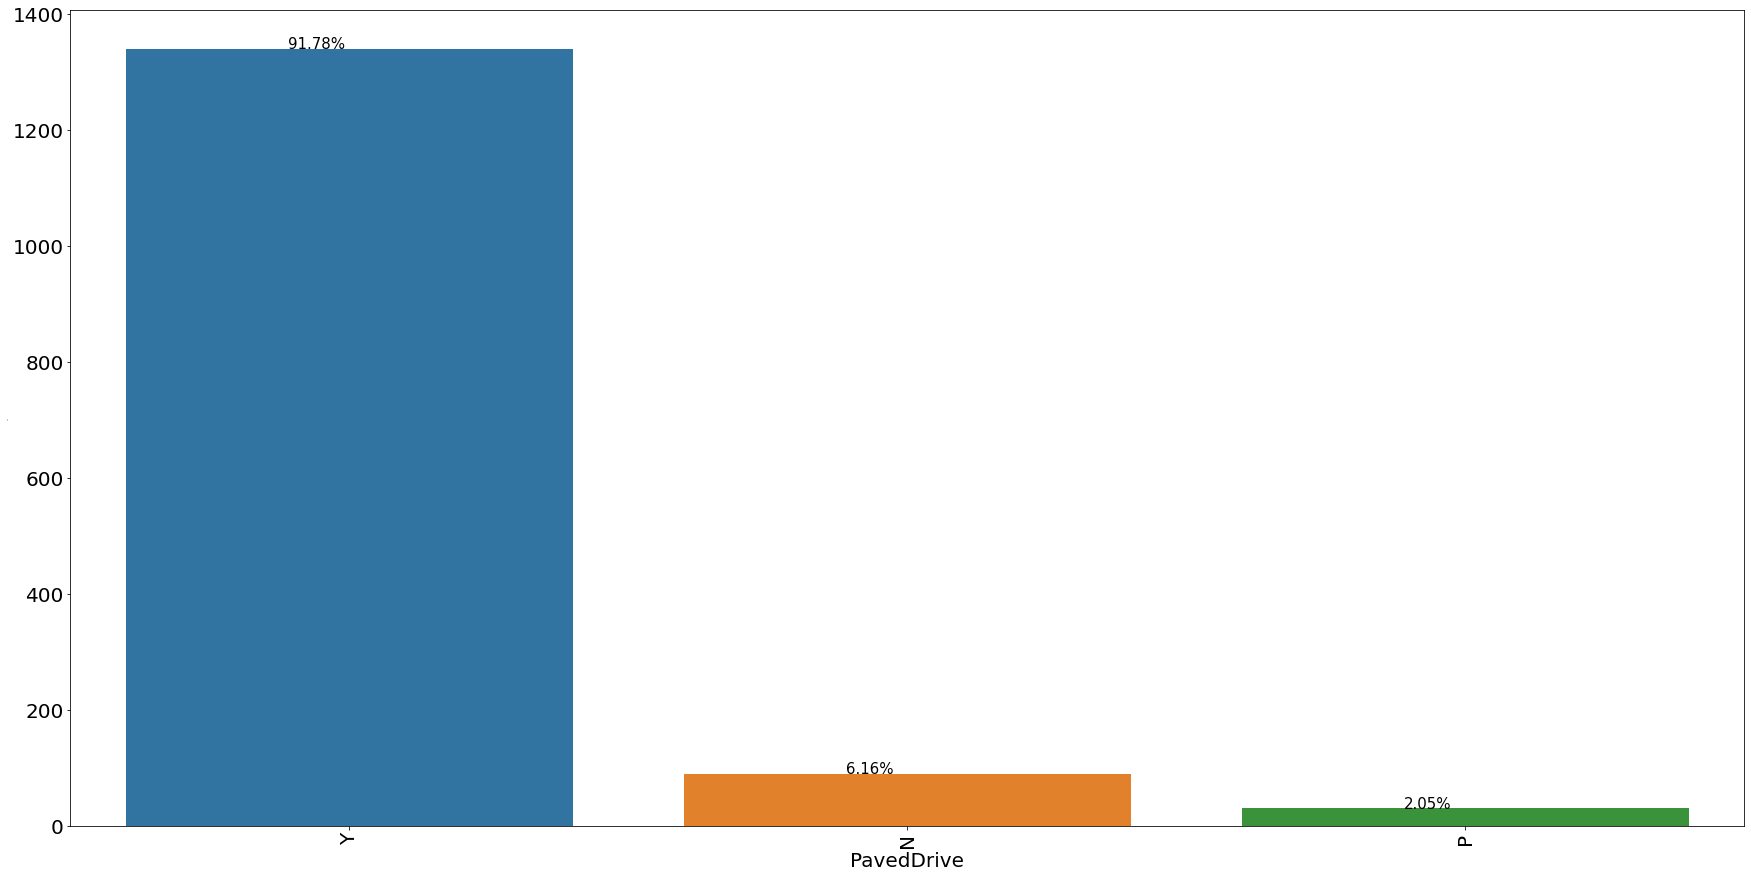

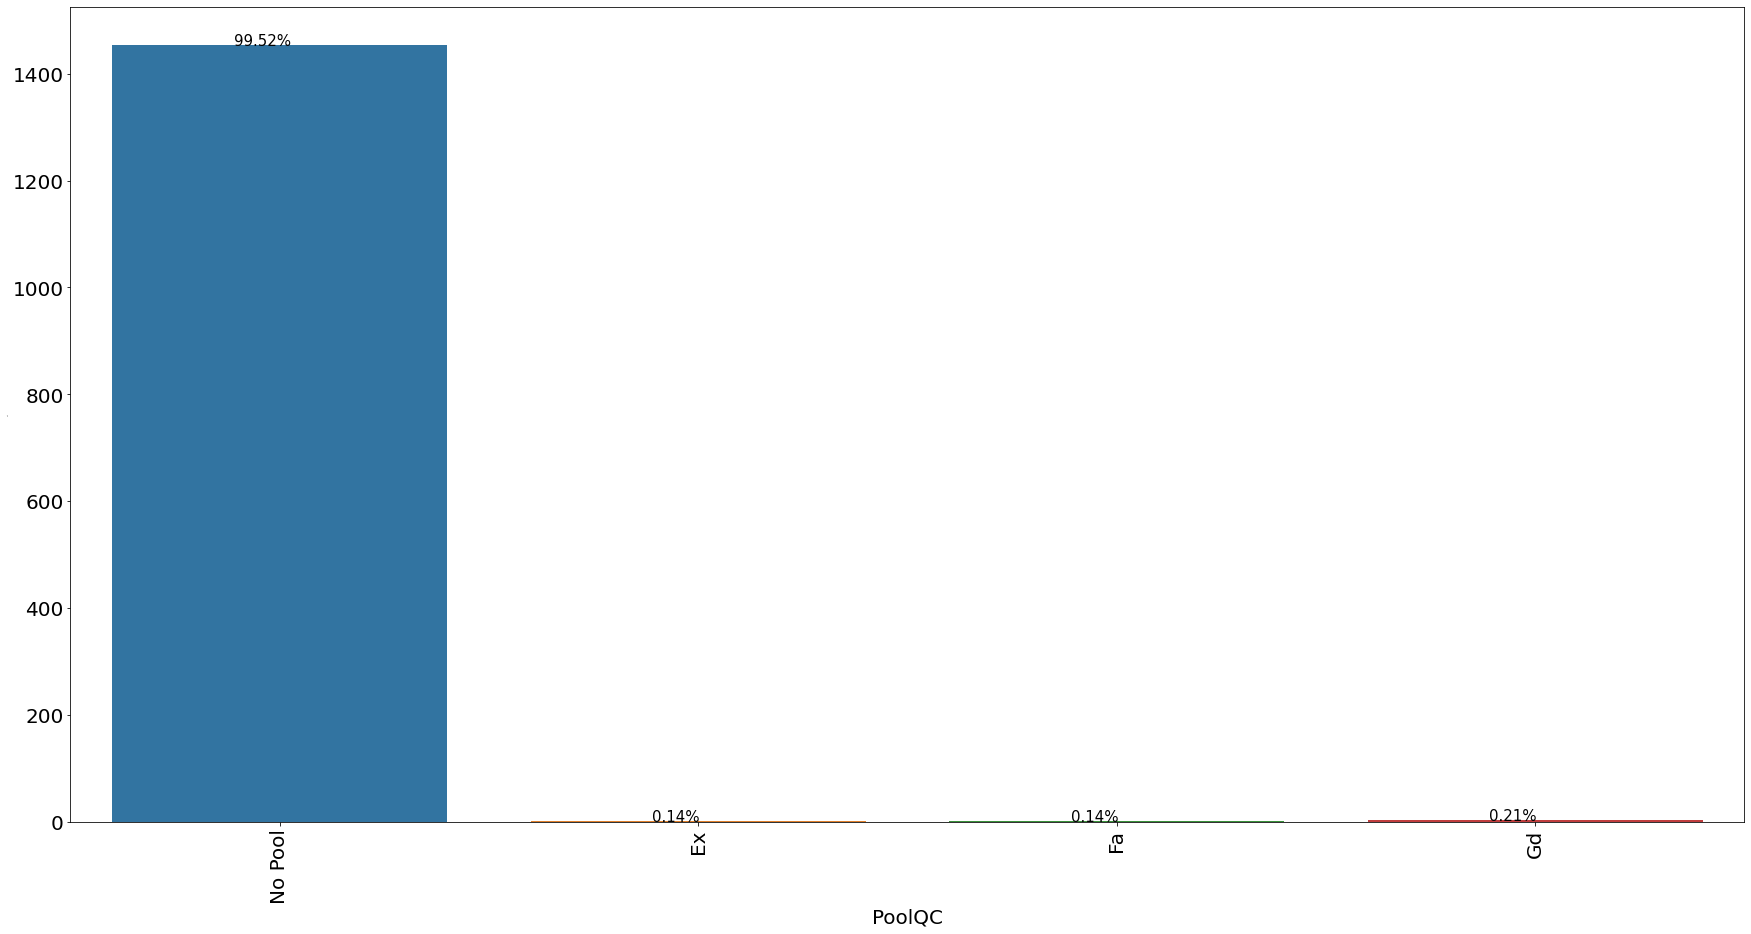

In [380]:
# Visualizing all the columns with imbalances (as found in the above step)

col=['Street','Alley','Utilities','LandSlope','Condition2','RoofMatl','MasVnrType','Heating','CentralAir','Electrical','Functional','GarageCond','PavedDrive','PoolQC']
cnt(col)

### <font color=red> <u>__INFERENCE__</u>
    
From the above graphs we can see that the below columns are highly skewed and can be dropped.
'Street','Alley','Utilities','LandSlope','Condition2','RoofMatl','MasVnrType','Heating','CentralAir','Electrical','Functional','GarageCond','PavedDrive','PoolQC'

In [381]:
# Dropping the highly skewed columns

house_df=house_df.drop(col, axis=1)
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,...,0,0,0,No Fence,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,...,0,0,0,No Fence,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,...,0,0,0,No Fence,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,...,0,0,0,No Fence,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,...,0,0,0,No Fence,0,12,2008,WD,Normal,250000


In [382]:
#list all columns with dtype object
house_df.select_dtypes(include=object).columns

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
       'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageQual', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')

In [383]:
cat_col=['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
       'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageQual', 'Fence', 'SaleType', 'SaleCondition']

In [384]:
c1=['ExterQual', 'BsmtQual','HeatingQC','GarageQual','KitchenQual', 'FireplaceQu']

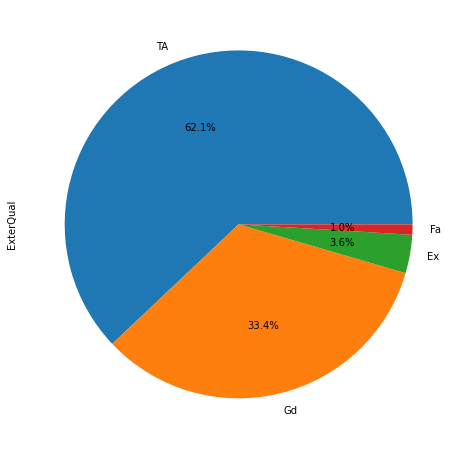

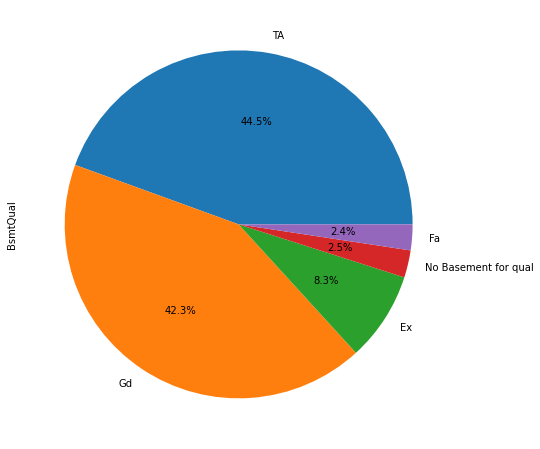

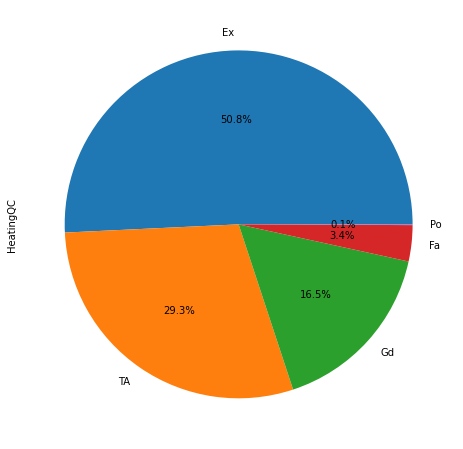

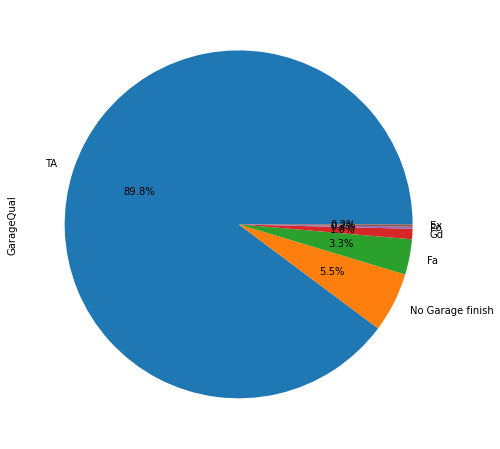

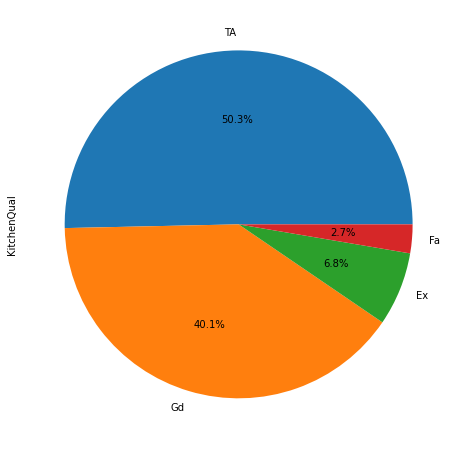

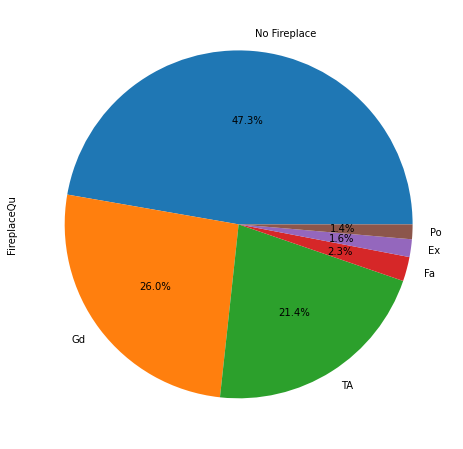

In [385]:
pi(c1)

### <font color=red> <u>__INFERENCE__</u> 

    From the above PIE charts we see that
    -> Quality of the material on the exterior is mostly Average/Typical about 47.3% of the houses 
    -> the height of the basement is around 80-99 inches
    -> Heating quality and condition is mostly excellent for 50.8% of the houses
    -> Garage quality is Average for 89.8% houses
    -> KitchenQuality is Average for 50% houses
    -> 47.3% of thr house have no Fireplace

    


In [386]:
c2=[ 'Neighborhood', 'Fence', 'SaleType', 'SaleCondition']

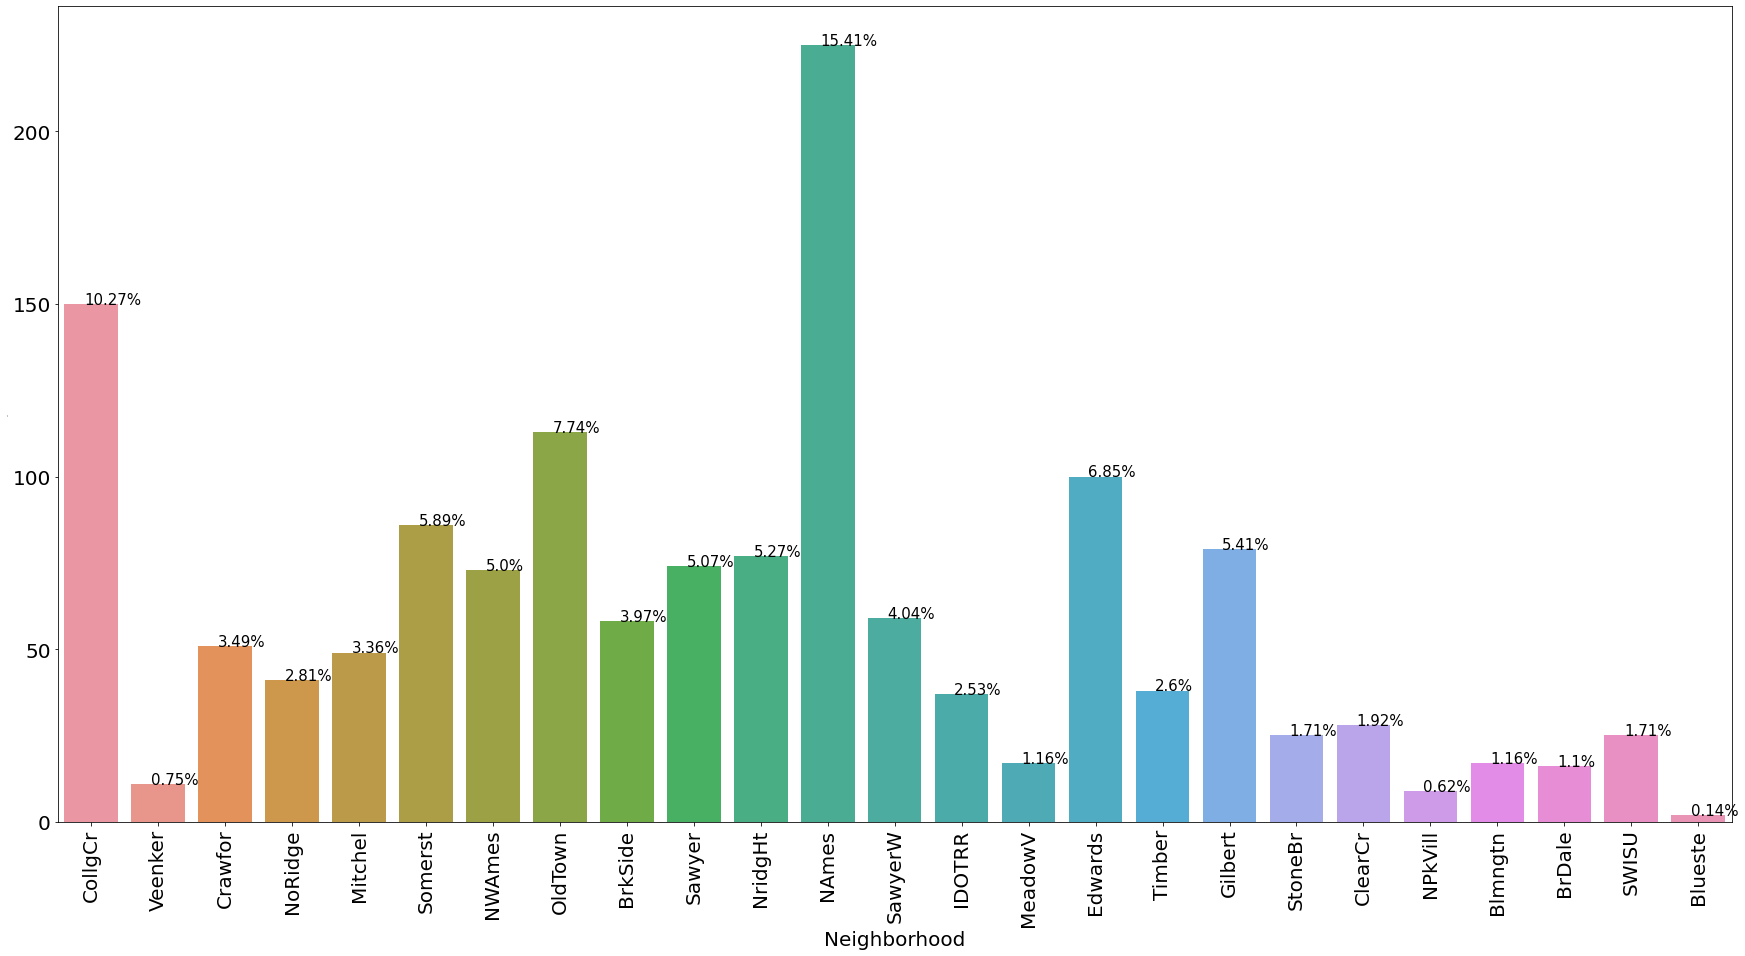

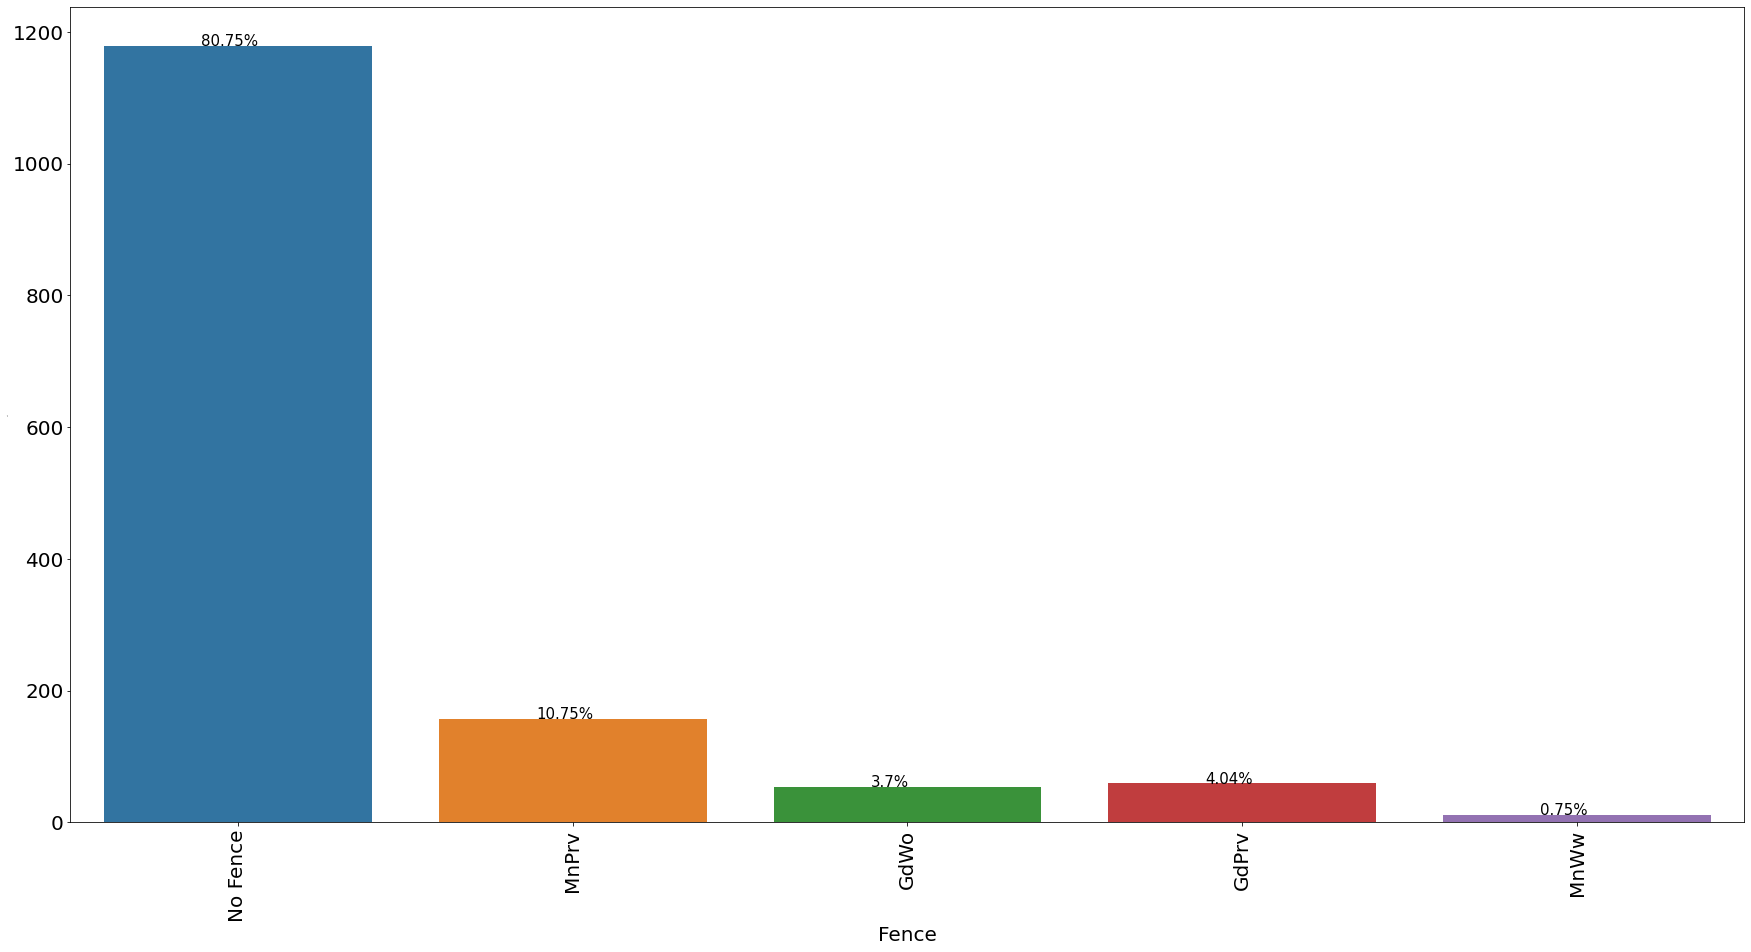

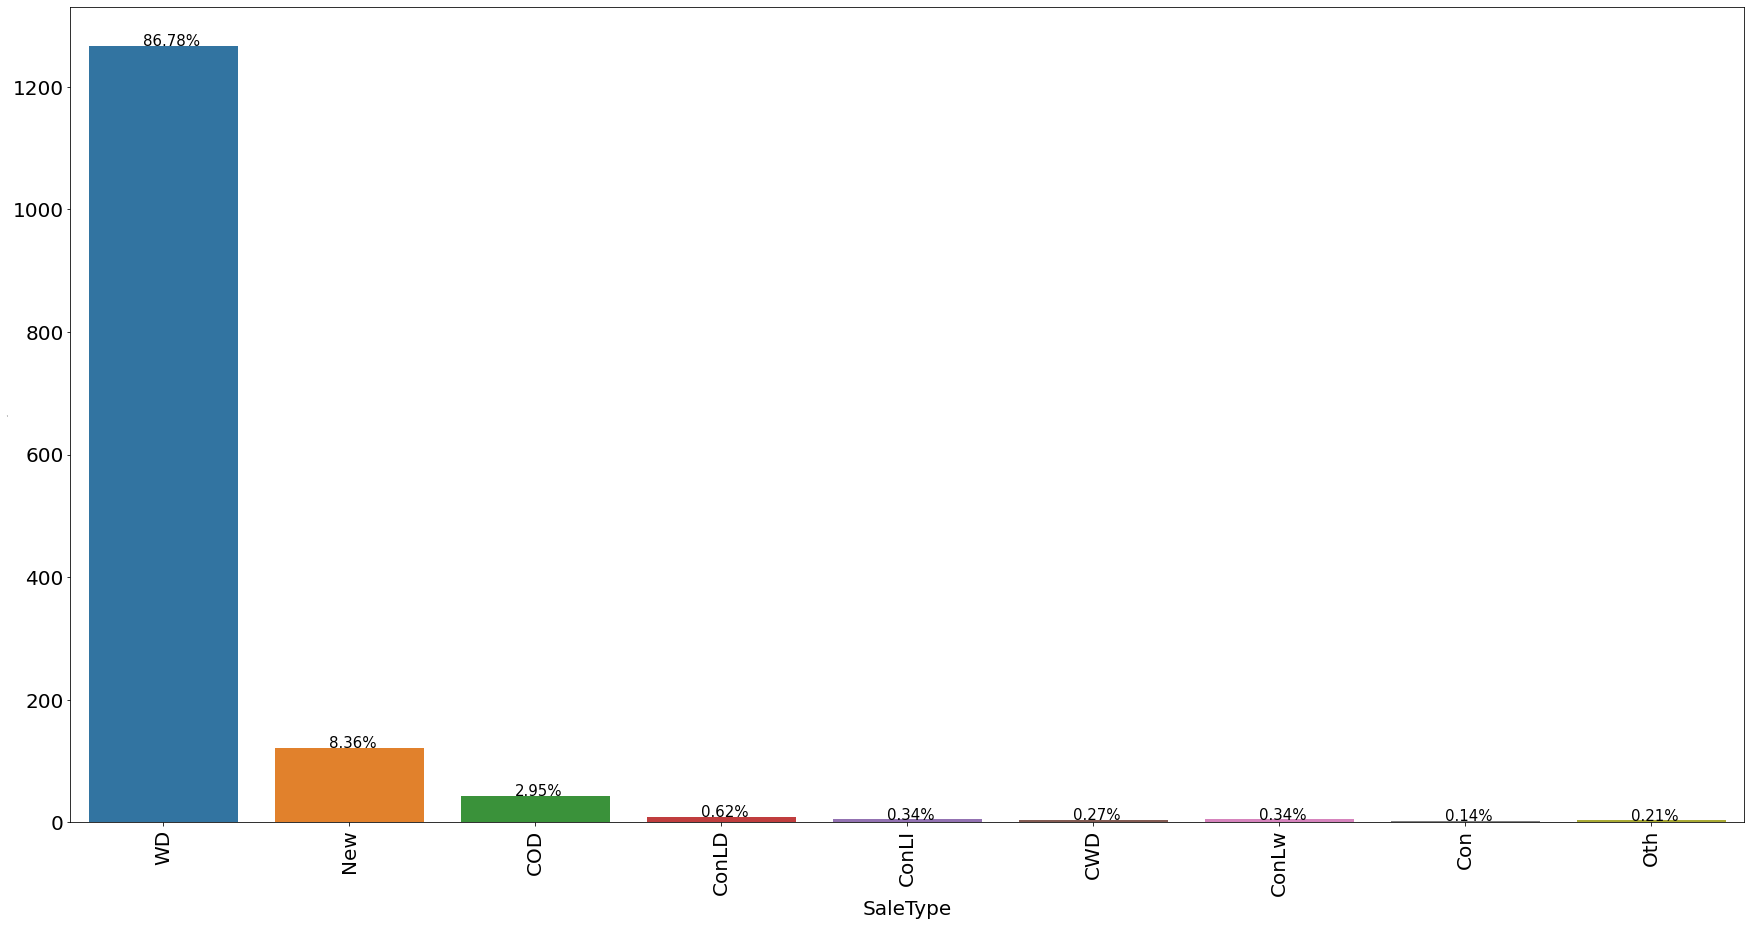

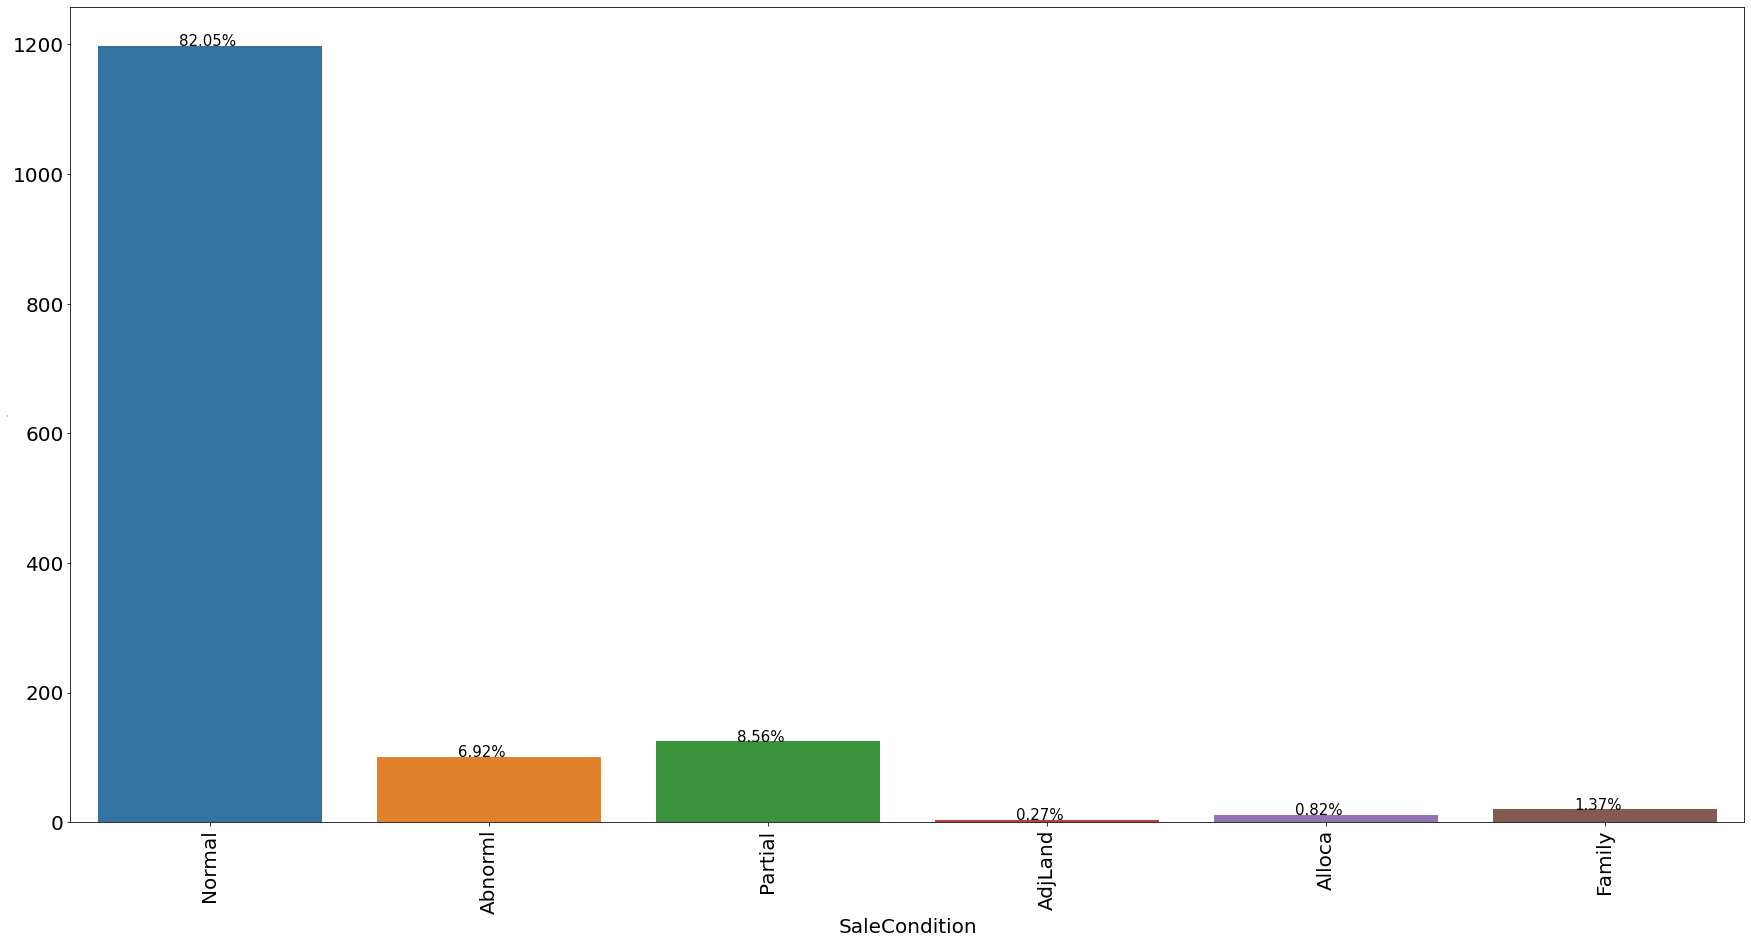

In [387]:
cnt(c2)

### <font color=red> <u>__INFERENCE__</u> 
    
    ->North Ames has most houses about 15.41%
    ->80.75% of house have no fence 
    ->86.78% of the sake type is Warranty Deed - Conventional
    ->82.05% of thr SaleCondition is Normal


### <font color=purple> ALTERING THE DATA 

##### Some of these columns have ordinal values they can be made numeric values

In [388]:
#creating a function to covert ordinal data to numeric

def ordi_val(x):
    if (x=='Ex'):
        x=5
    elif (x=='Gd'):
        x=4
    elif (x=='TA'):
        x=3
    elif (x=='Fa'):
        x=2
    elif (x=='Po'):
        x=1
    else:
        x=0
    return x
    

In [389]:
#ordinal columns 
ord_col=[
'KitchenQual',
'FireplaceQu',
'GarageQual',
'ExterQual',
'ExterCond',
'HeatingQC',
'BsmtQual',
'BsmtCond',
'BsmtExposure']


In [390]:
#coverting the ordinal columns to numeric columns 
for i in ord_col:
    house_df[i]=house_df[i].apply(lambda x:ordi_val(x))
    
    

In [391]:
house_df[ord_col].head()

,KitchenQual,FireplaceQu,GarageQual,ExterQual,ExterCond,HeatingQC,BsmtQual,BsmtCond,BsmtExposure
0,4,0,3,4,3,5,4,3,0
1,3,3,3,3,3,5,4,3,4
2,4,3,3,4,3,5,4,3,0
3,4,4,3,3,3,4,3,4,0
4,4,3,3,4,3,5,4,3,0


In [392]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 66 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   Neighborhood   1460 non-null   object 
 9   Condition1     1460 non-null   object 
 10  BldgType       1460 non-null   object 
 11  HouseStyle     1460 non-null   object 
 12  OverallQual    1460 non-null   int64  
 13  OverallCond    1460 non-null   int64  
 14  YearBuilt      1460 non-null   int64  
 15  YearRemodAdd   1460 non-null   int64  
 16  RoofStyle      1460 non-null   object 
 17  Exterior1st    1460 non-null   object 
 18  Exterior

In [393]:
#list all columns with dtype object
house_df.select_dtypes(include=object).columns

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'Foundation', 'BsmtFinType1', 'BsmtFinType2',
       'GarageType', 'GarageFinish', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')

In [394]:
cat_col=['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'Foundation', 'BsmtFinType1', 'BsmtFinType2',
       'GarageType', 'GarageFinish', 'Fence', 'SaleType', 'SaleCondition']

In [395]:
v_cnts(cat_col) #checking the value counts for categorical variable 

***************************************************************
MSZoning
----------------------------------------------------------------
RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: MSZoning, dtype: float64
***************************************************************
LotShape
----------------------------------------------------------------
Reg    63.356164
IR1    33.150685
IR2     2.808219
IR3     0.684932
Name: LotShape, dtype: float64
***************************************************************
LandContour
----------------------------------------------------------------
Lvl    89.794521
Bnk     4.315068
HLS     3.424658
Low     2.465753
Name: LandContour, dtype: float64
***************************************************************
LotConfig
----------------------------------------------------------------
Inside     72.054795
Corner     18.013699
CulDSac     6.438356
FR2         3.219178
FR3         0.273973
Na

##### We see that few of the column with values count about 5% or less count, we can combine these values to Others, to make the modelling more meaning full. 

In [396]:
# Understanding the values in each column and then categorizing it correctly to "others"

house_df['MSZoning']=house_df['MSZoning'].apply(lambda x: 'Others' if x in ['FV','RH','C (all)'] else x)
house_df['LotShape']=house_df['LotShape'].apply(lambda x: 'Others' if x in ['IR2','IR3'] else x)

house_df['LandContour']=house_df['LandContour'].apply(lambda x: 'Others' if x in ['Bnk','HLS','Low'] else x)
house_df['LotConfig']=house_df['LotConfig'].apply(lambda x: 'Others' if x in ['CulDSac','FR2','FR3'] else x)
house_df['Neighborhood']=house_df['Neighborhood'].apply(lambda x: x if x in ['NAmes','CollgCr','OldTown','Edwards'] else 'Others')

house_df['Condition1']=house_df['Condition1'].apply(lambda x: x if x in ['Norm'] else 'Others')
house_df['BldgType']=house_df['BldgType'].apply(lambda x: x if x in ['1Fam'] else 'Others')
house_df['HouseStyle']=house_df['HouseStyle'].apply(lambda x: x if x in ['1Story','2Story','1.5Fin'] else 'Others')
house_df['RoofStyle']=house_df['RoofStyle'].apply(lambda x: x if x in ['Gable','Hip'] else 'Others')
house_df['Exterior1st']=house_df['Exterior1st'].apply(lambda x: x if x in ['VinylSd','HdBoard','MetalSd','Wd Sdng','Plywood'] else 'Others')
house_df['Exterior2nd']=house_df['Exterior2nd'].apply(lambda x: x if x in ['VinylSd','MetalSd','HdBoard','Wd Sdng','Plywood'] else 'Others')
house_df['BsmtFinType2']=house_df['BsmtFinType2'].apply(lambda x: x if x in ['Unf'] else 'Others')
house_df['GarageType']=house_df['GarageType'].apply(lambda x: x if x in ['Attchd','Detchd','BuiltIn'] else 'Others')
#house_df['GarageQual']=house_df['GarageQual'].apply(lambda x: x if x in ['TA'] else 'Others')
house_df['Fence']=house_df['Fence'].apply(lambda x: x if x in ['No Fence','MnPrv'] else 'Others')
house_df['SaleType']=house_df['SaleType'].apply(lambda x: x if x in ['WD','New'] else 'Others')
house_df['SaleCondition']=house_df['SaleCondition'].apply(lambda x: x if x in ['Normal'] else 'Others')
#house_df['FireplaceQu']=house_df['FireplaceQu'].apply(lambda x: x if x in ['No Fireplace','Gd','TA'] else 'Others')

#house_df['ExterQual']=house_df['ExterQual'].apply(lambda x: 'Others' if x in ['Ex','Fa'] else x)
#house_df['ExterCond']=house_df['ExterCond'].apply(lambda x: 'Others' if x in ['Fa','Ex','Po'] else x)
house_df['Foundation']=house_df['Foundation'].apply(lambda x: 'Others' if x in ['Slab','Wood','Stone'] else x)
#house_df['BsmtQual']=house_df['BsmtQual'].apply(lambda x: 'Others' if x in ['Ex','No Basement for qual','Fa'] else x)
#house_df['BsmtCond']=house_df['BsmtCond'].apply(lambda x: 'Others' if x in ['Gd','Fa','No Basement for cond','Po'] else x)
house_df['BsmtFinType1']=house_df['BsmtFinType1'].apply(lambda x: 'Others' if x in ['LwQ','No Basement for fintype1'] else x)
#house_df['HeatingQC']=house_df['HeatingQC'].apply(lambda x: 'Others' if x in ['Fa','Po'] else x)
#house_df['KitchenQual']=house_df['KitchenQual'].apply(lambda x: 'Others' if x in ['Ex','Fa'] else x)






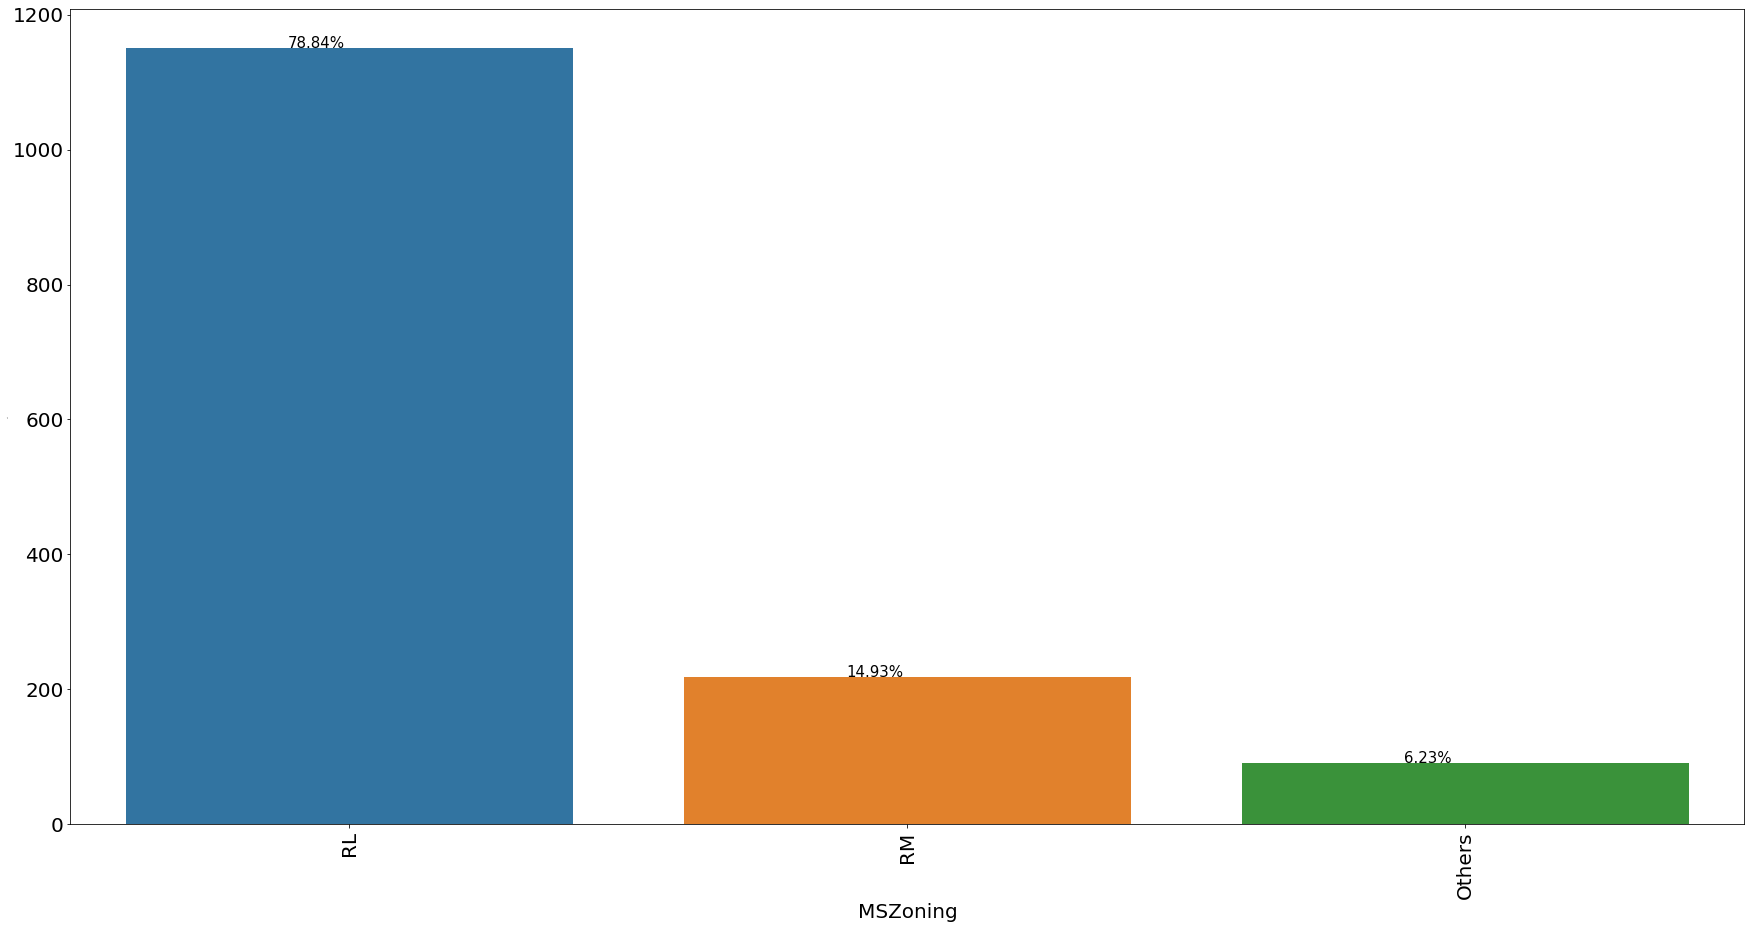

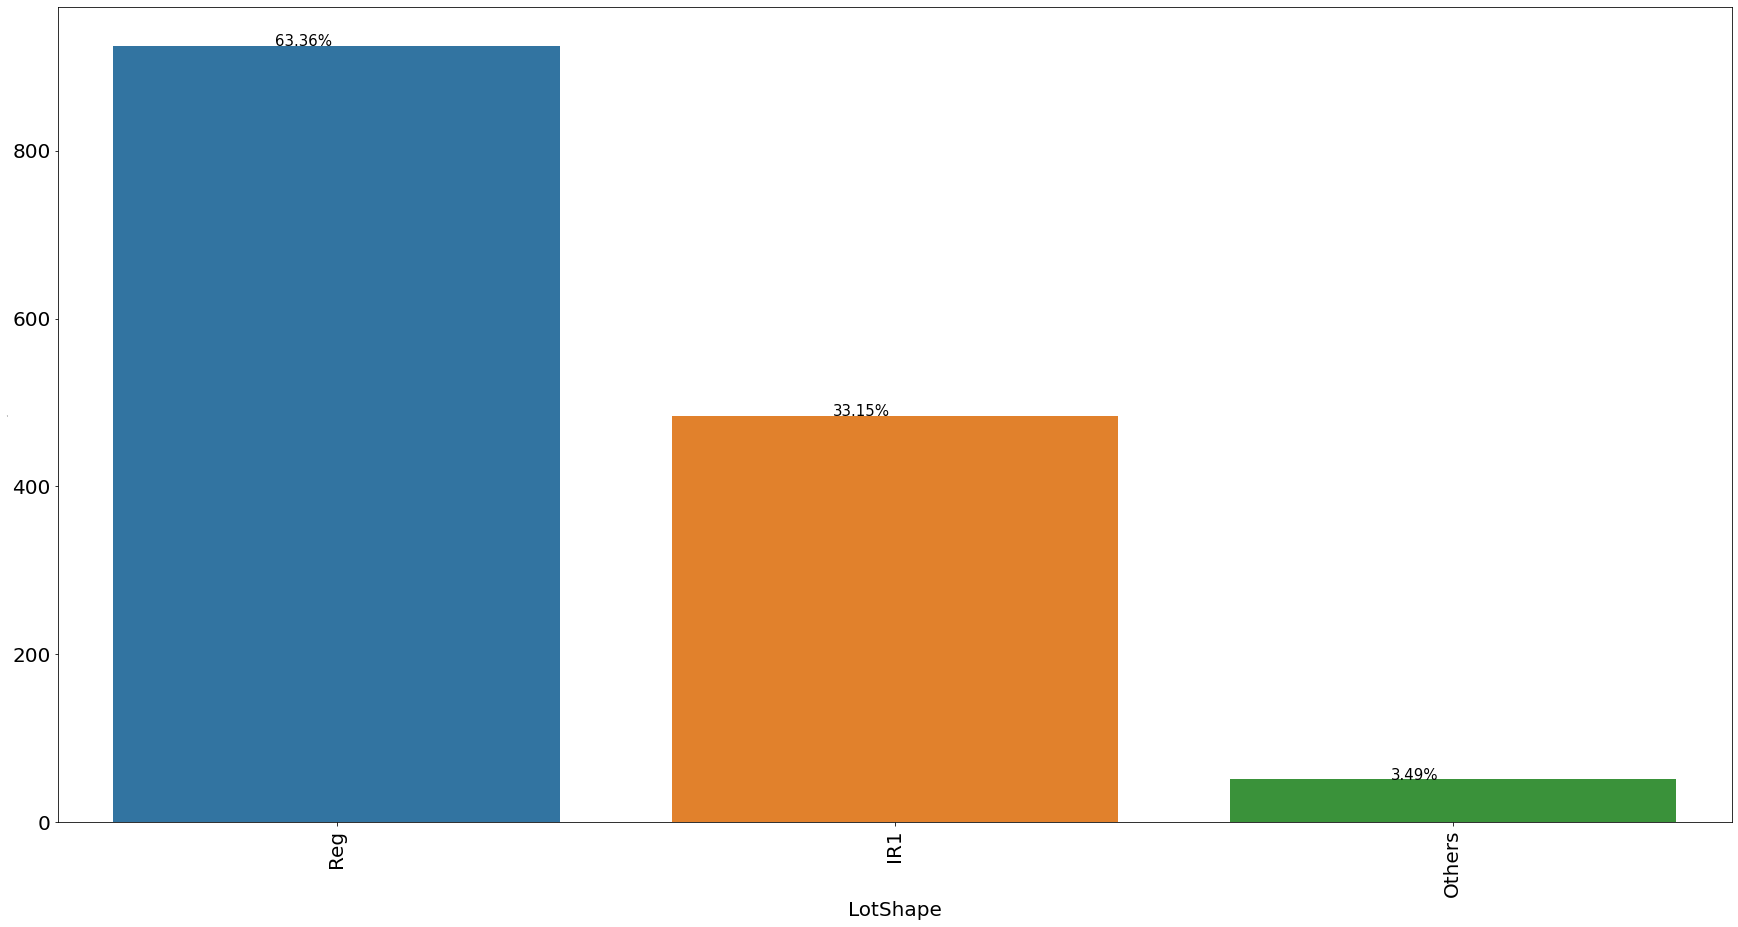

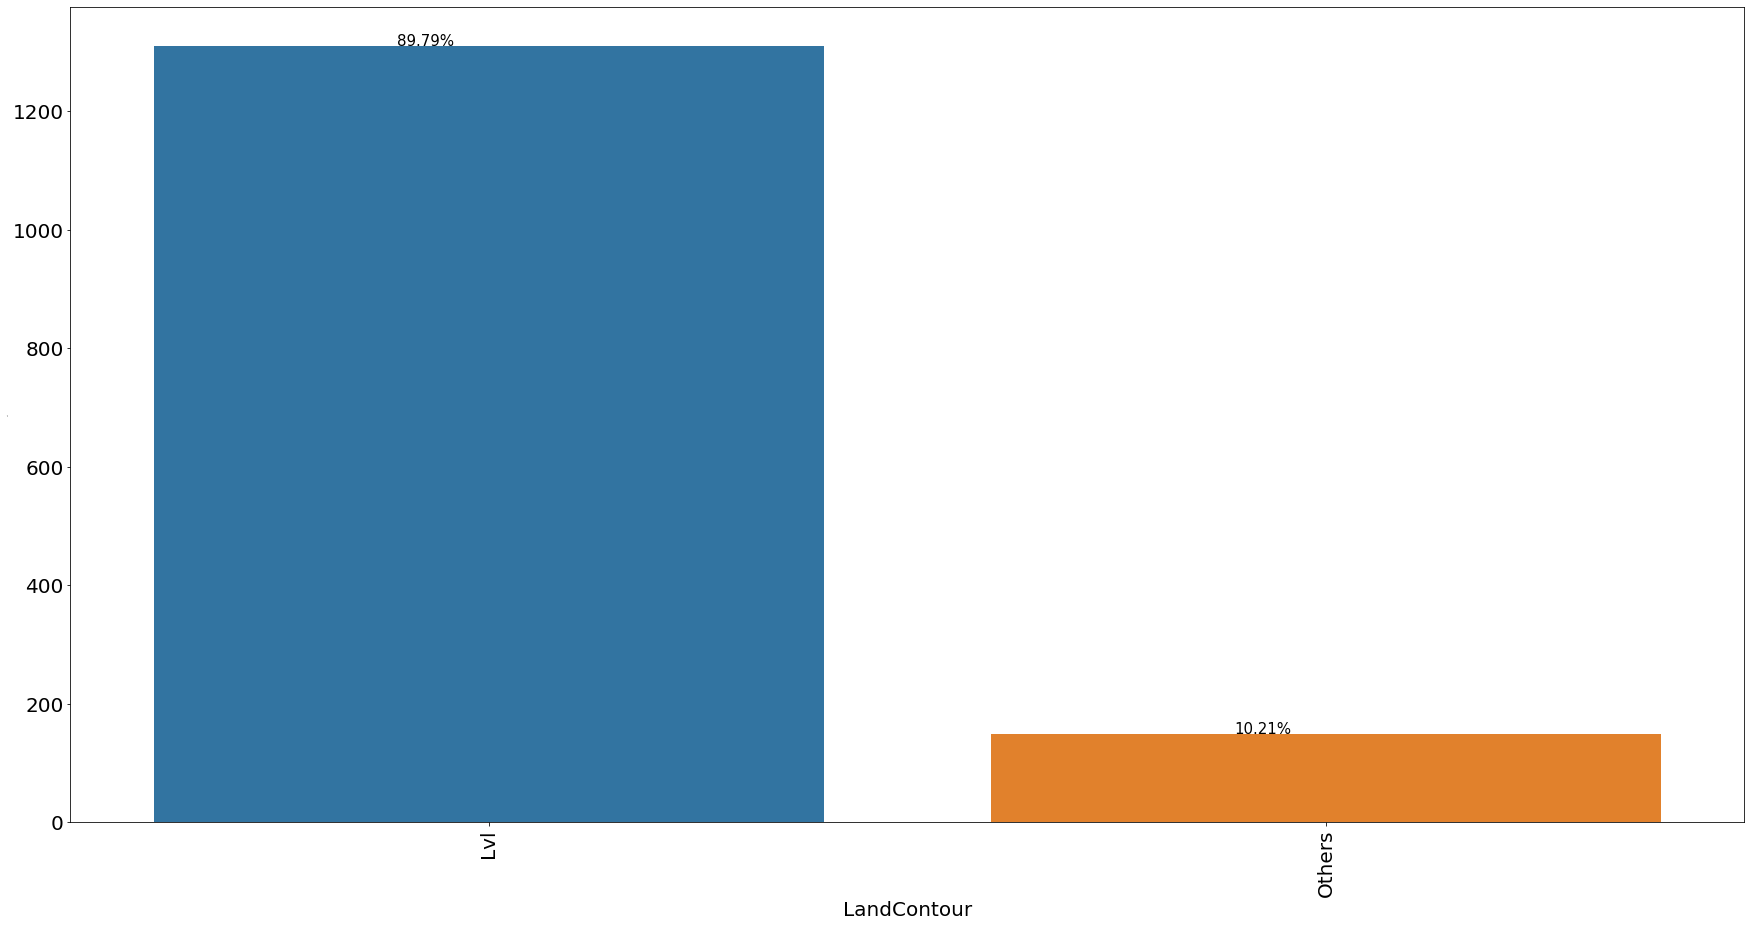

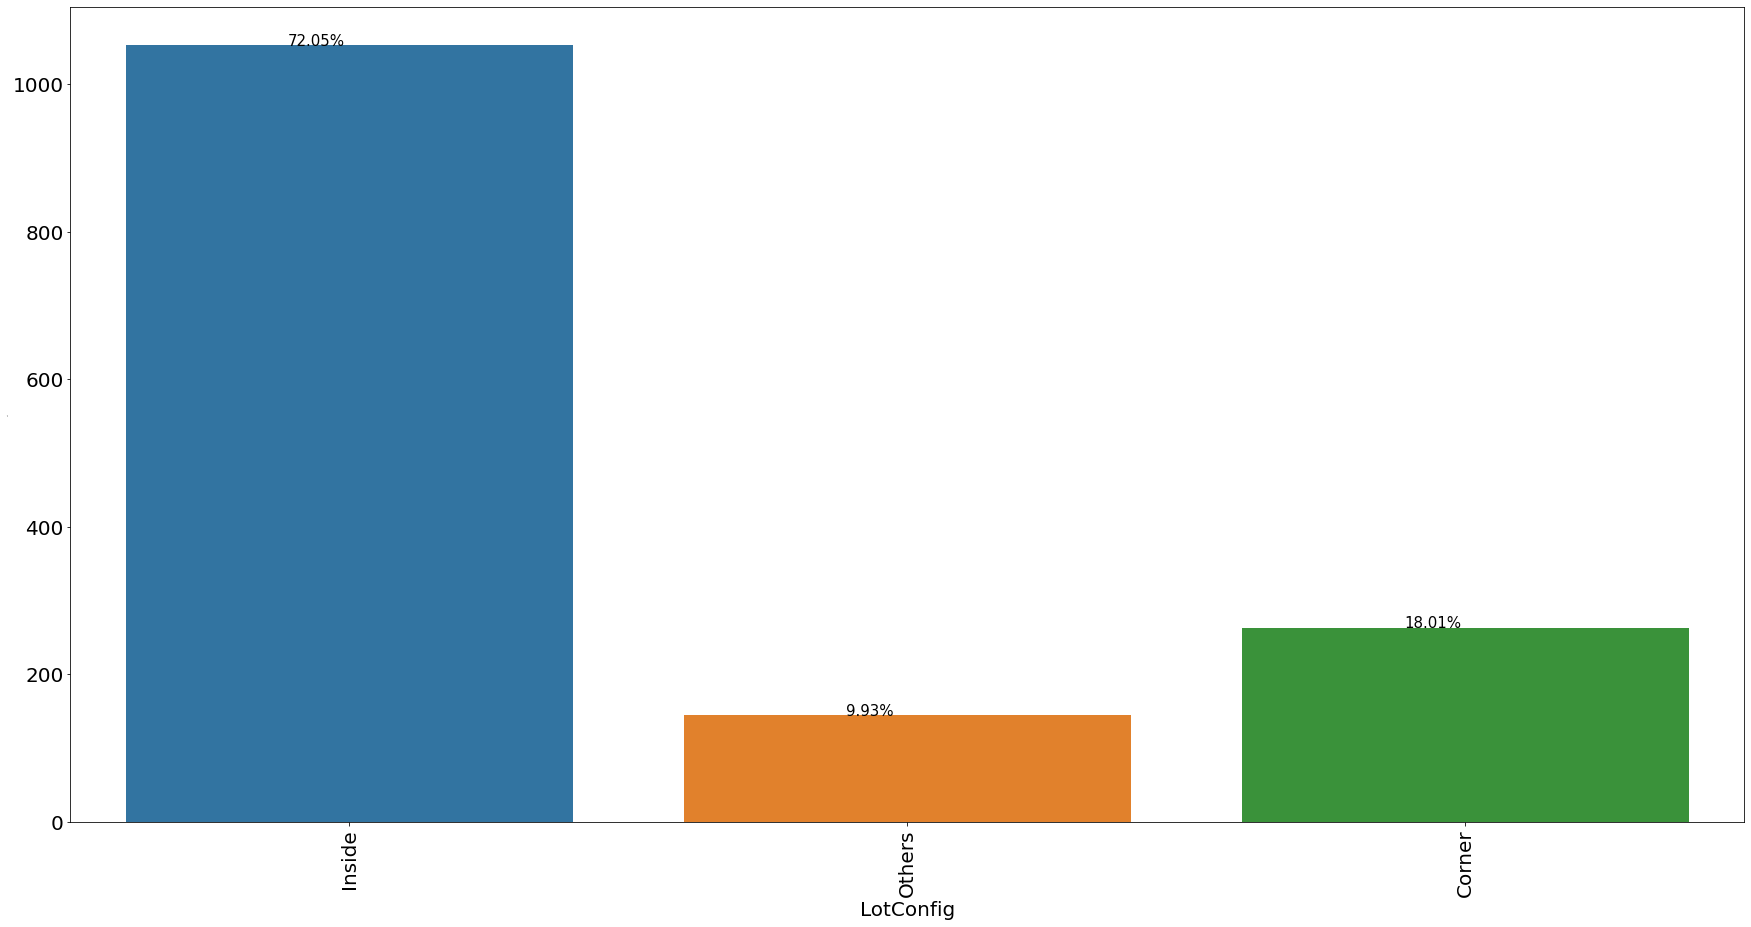

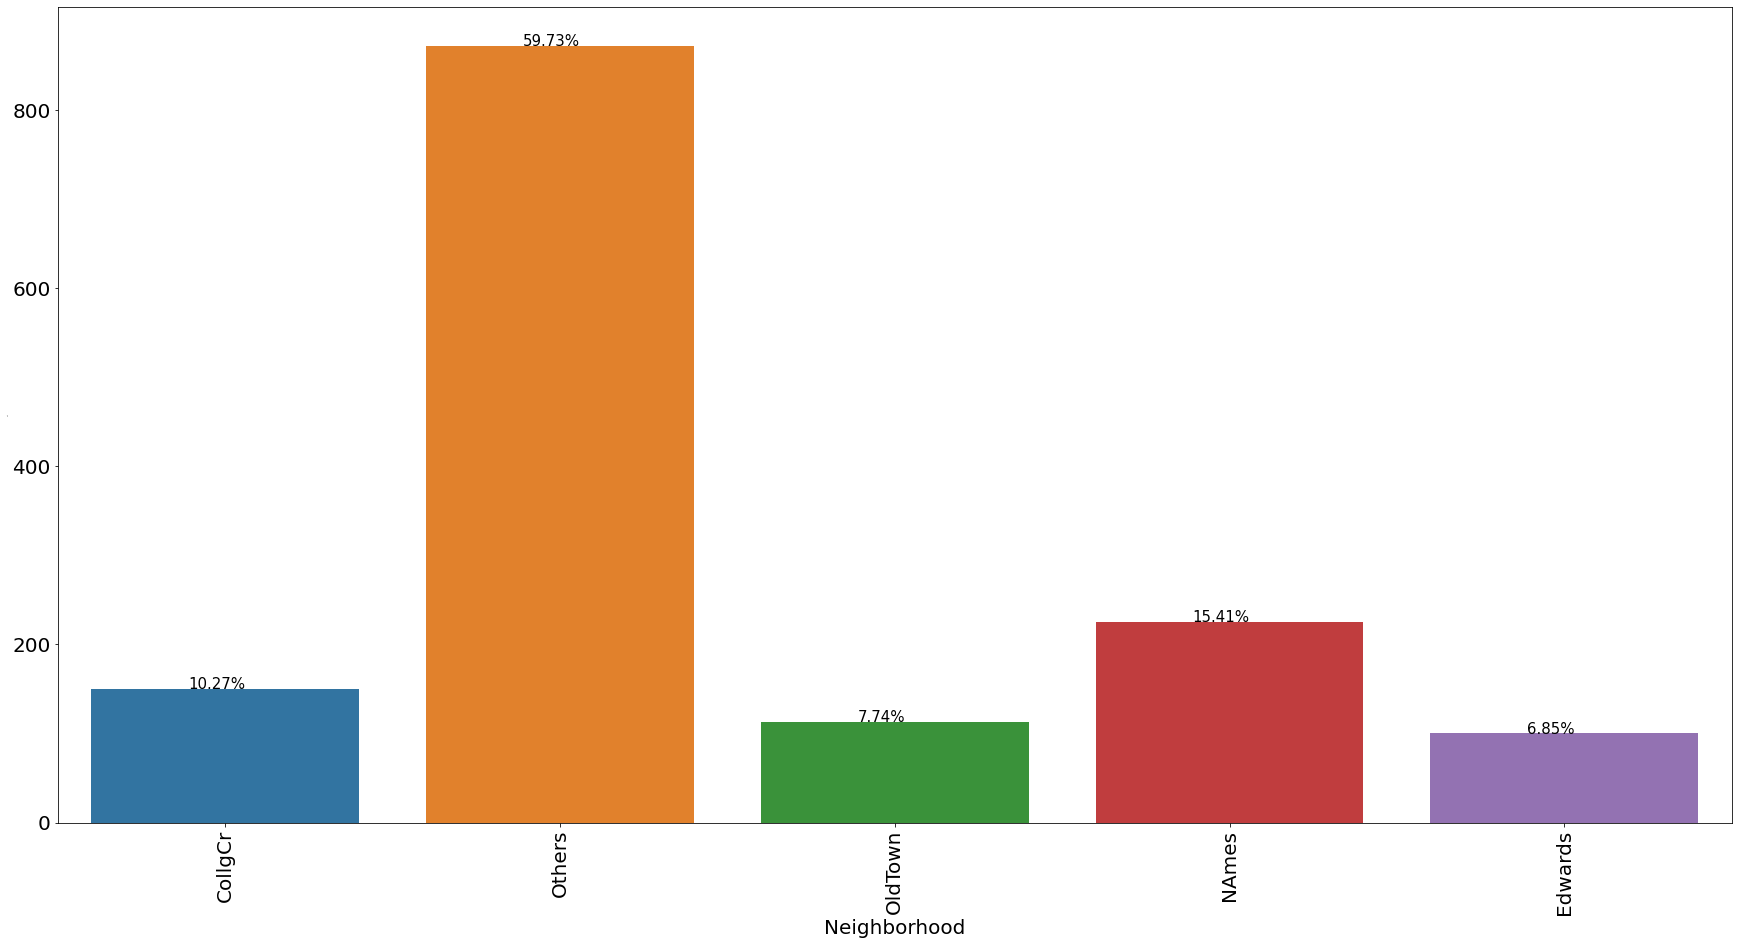

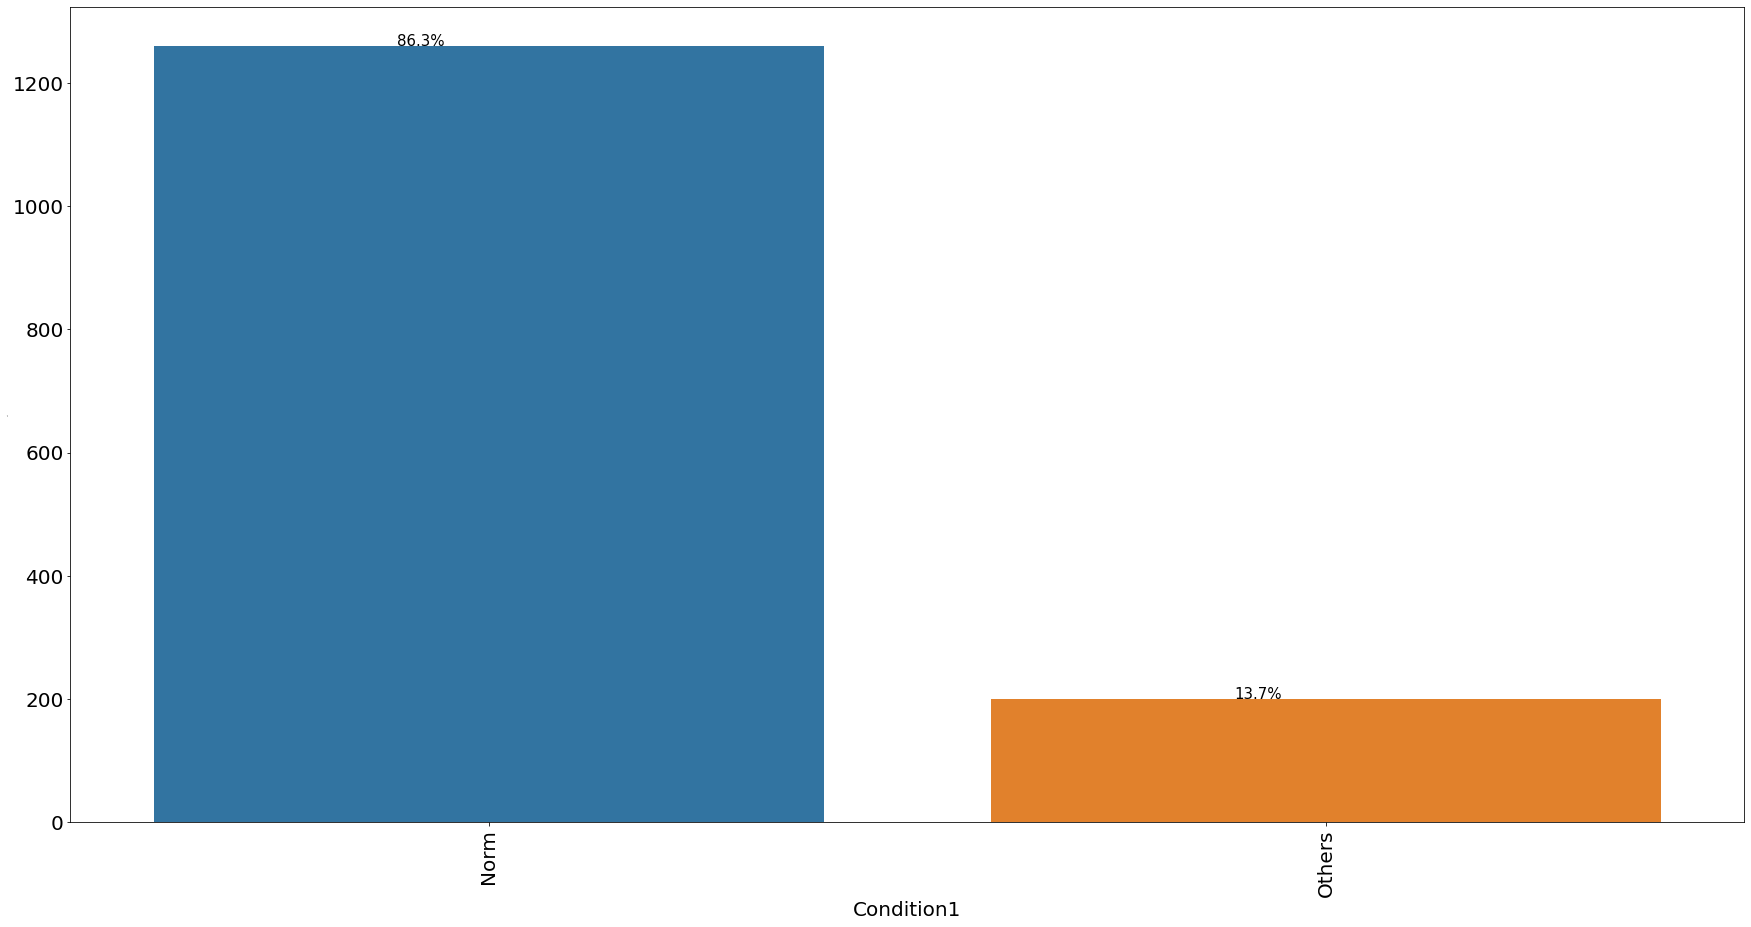

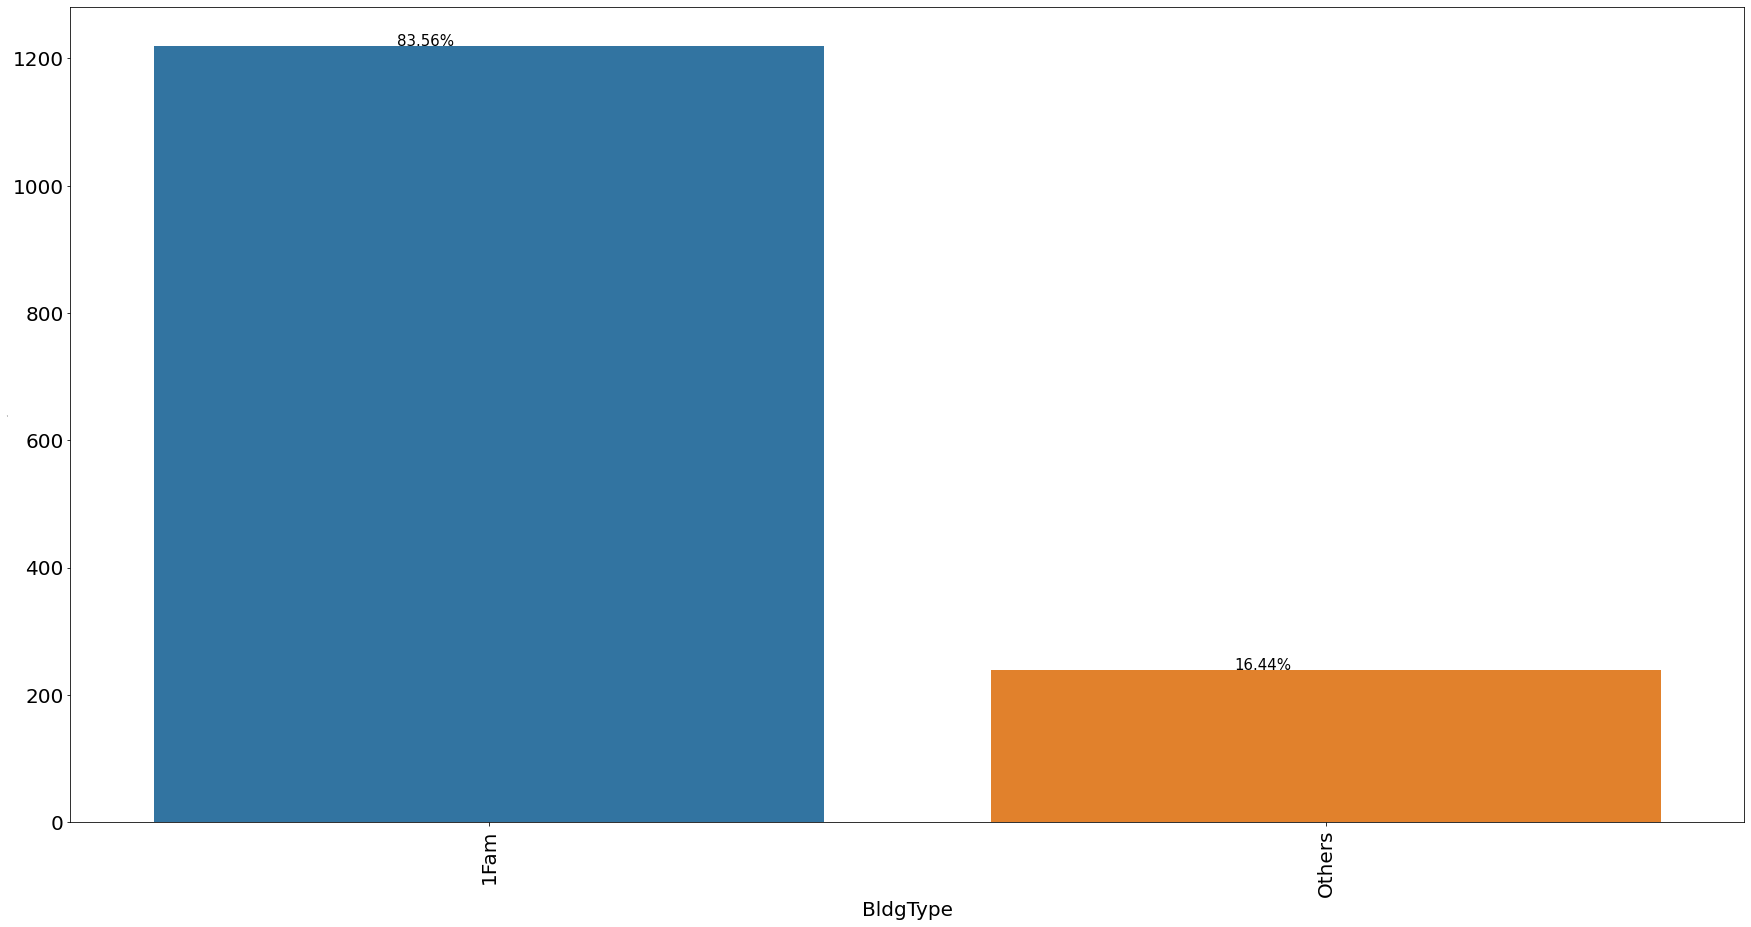

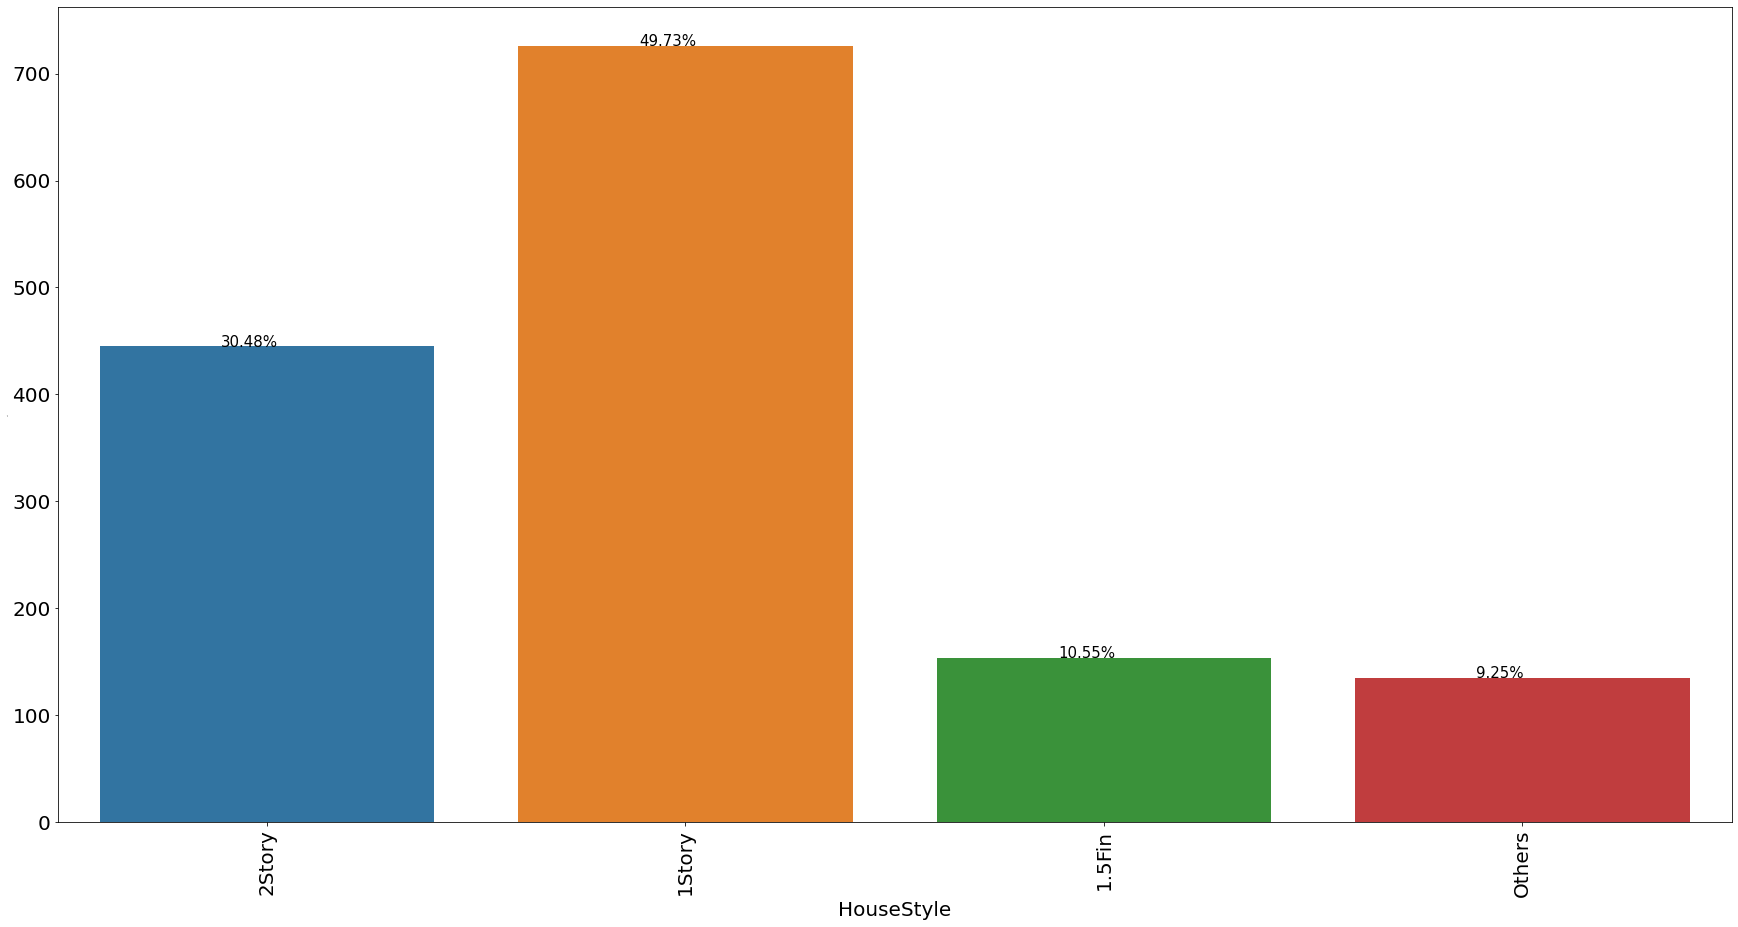

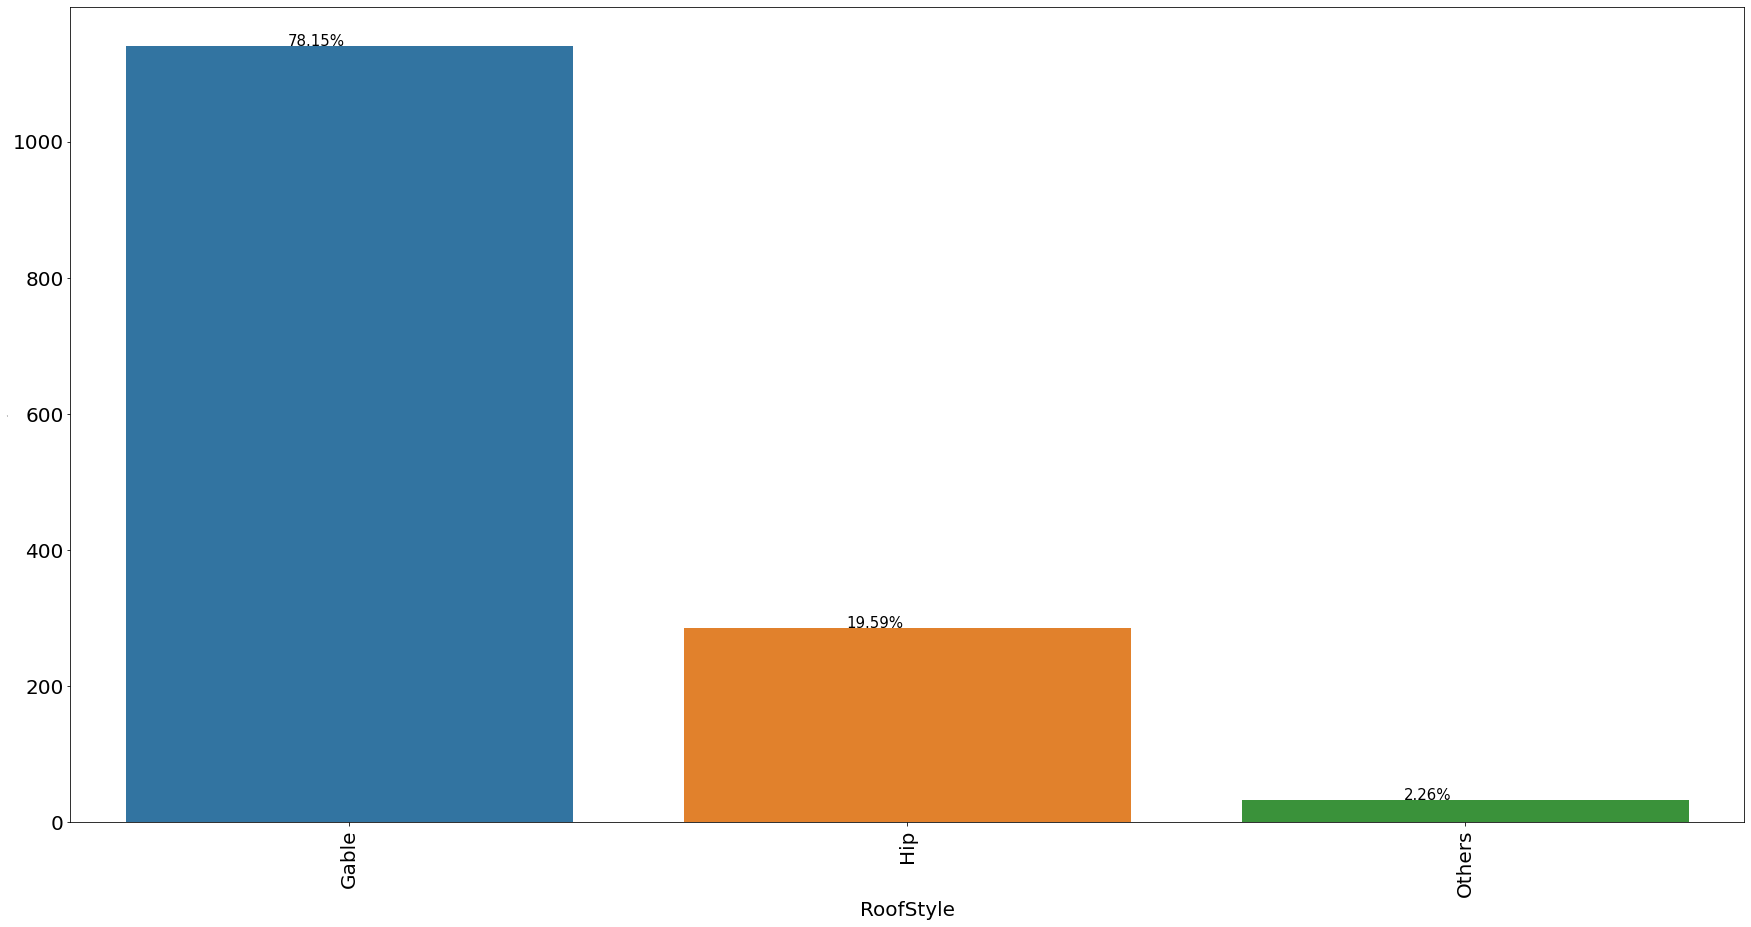

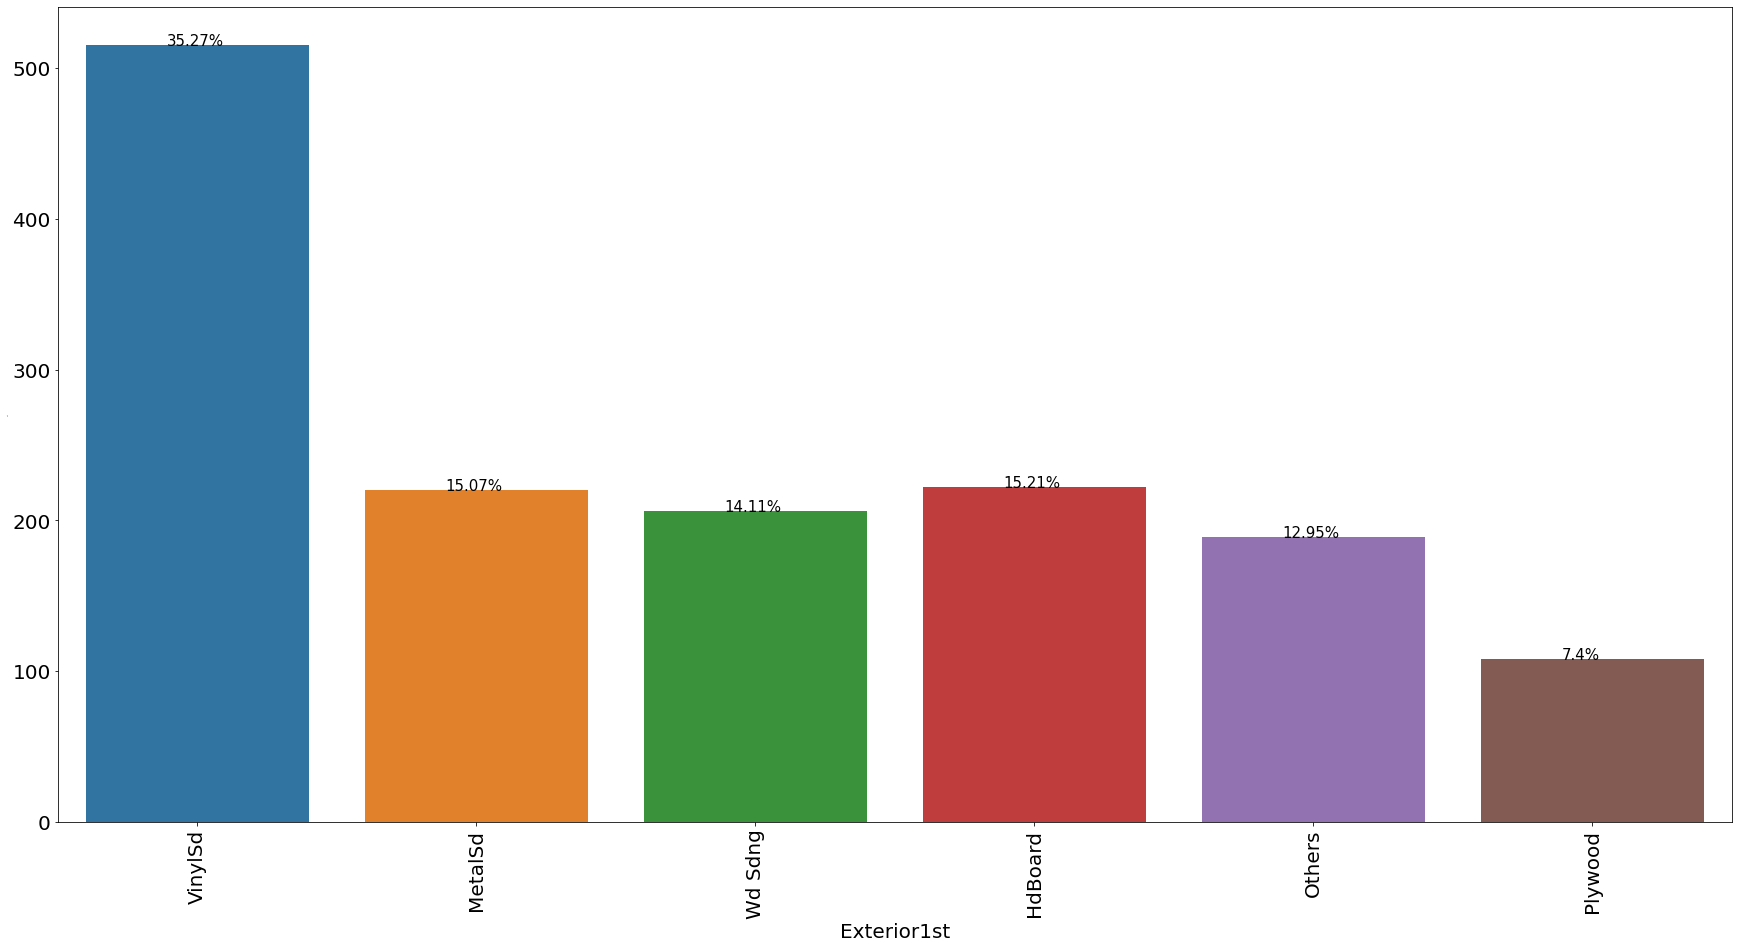

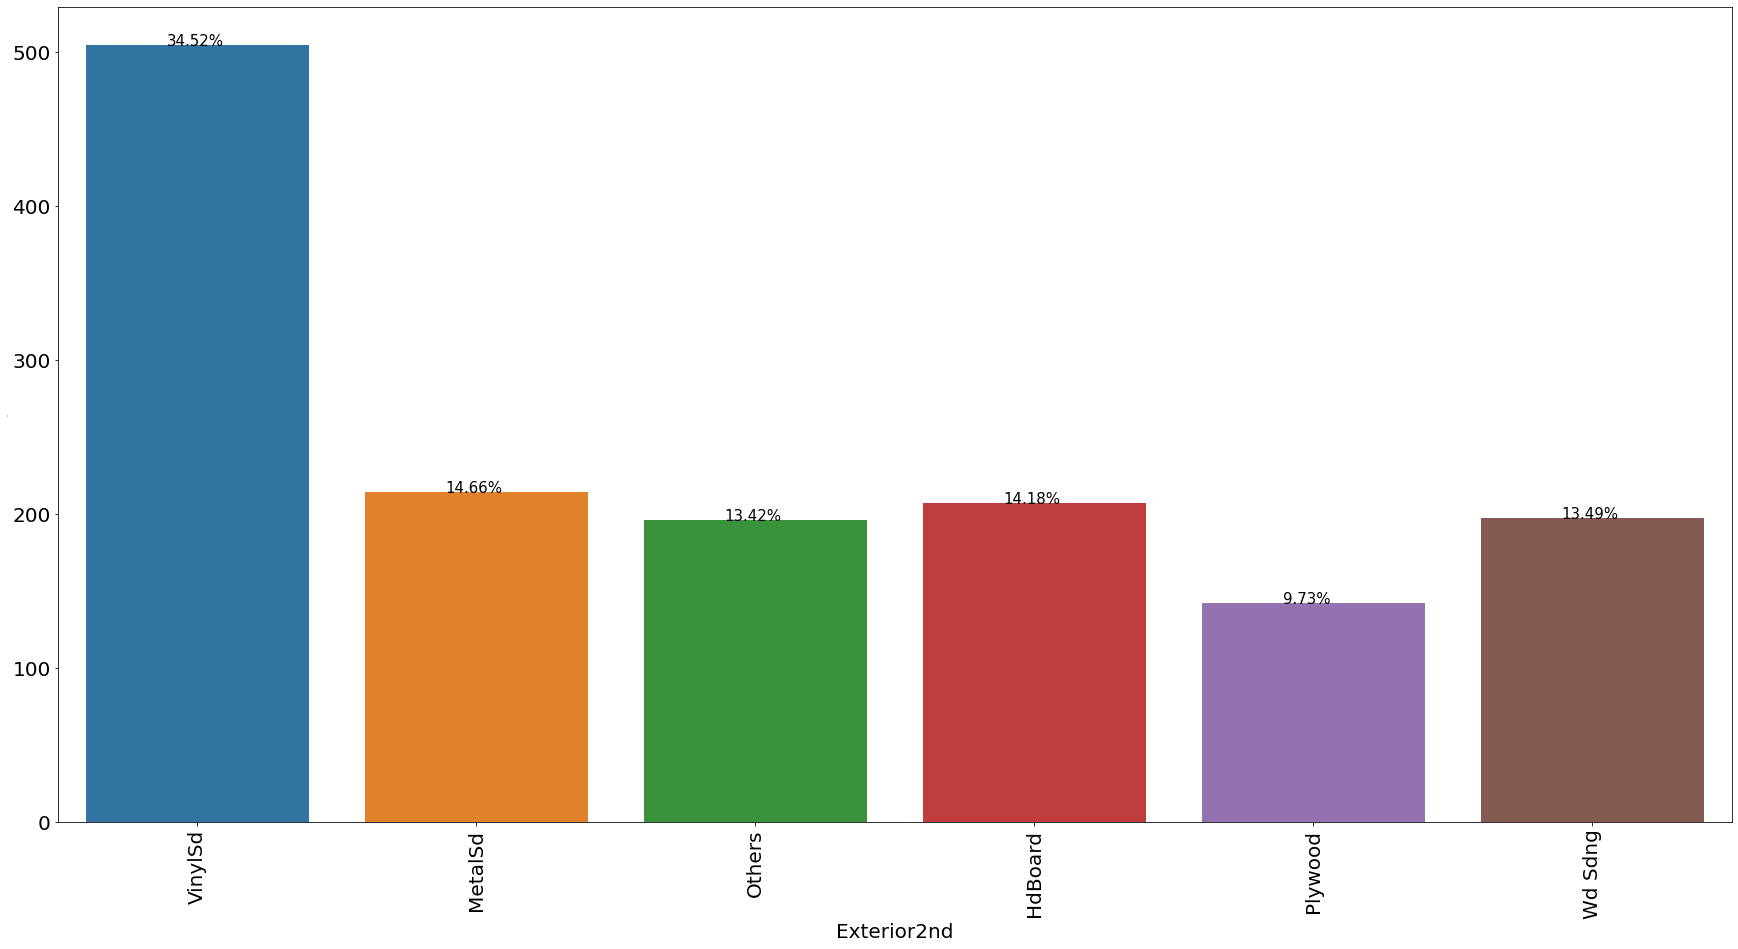

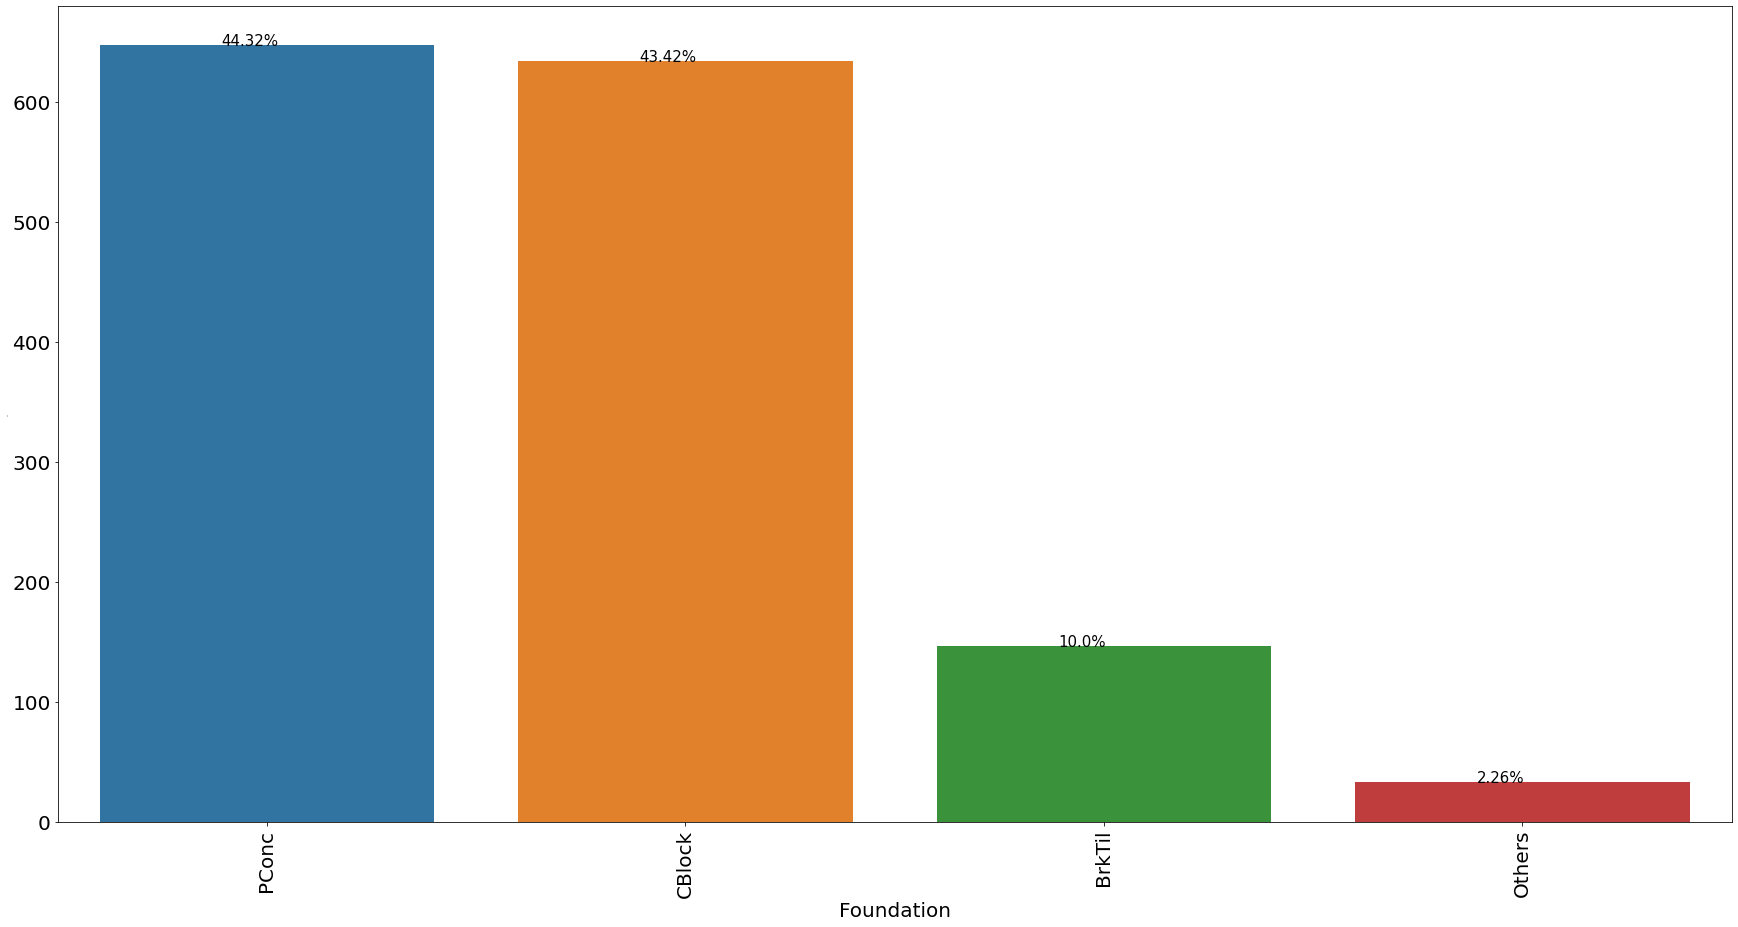

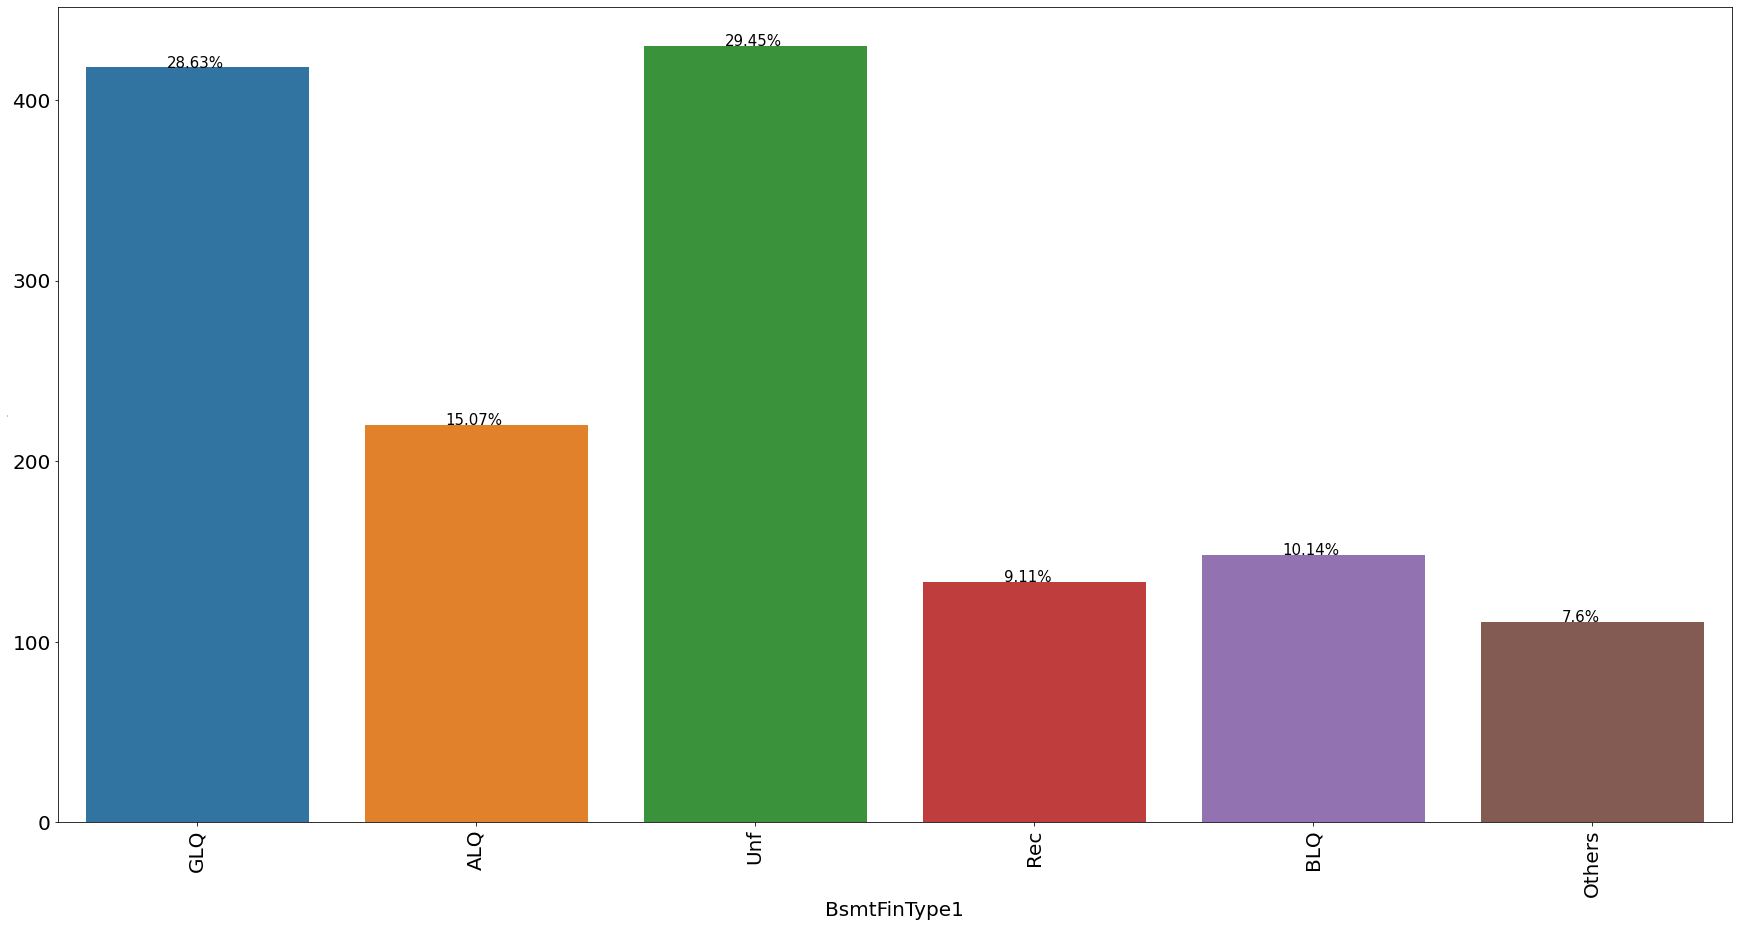

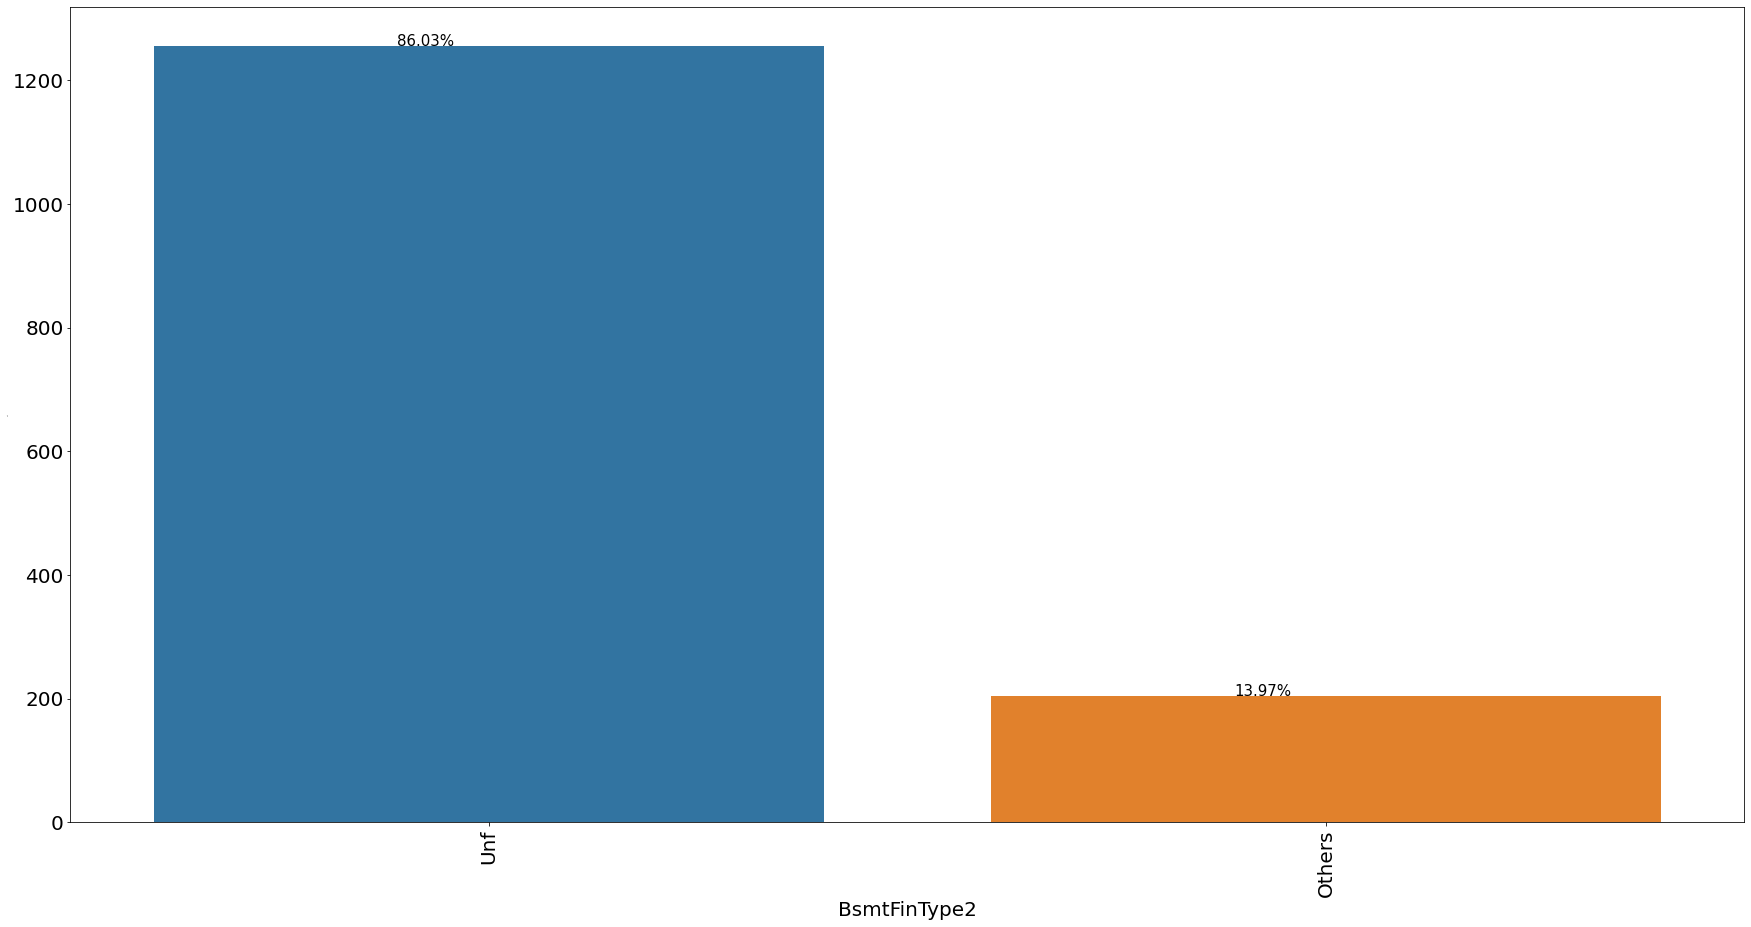

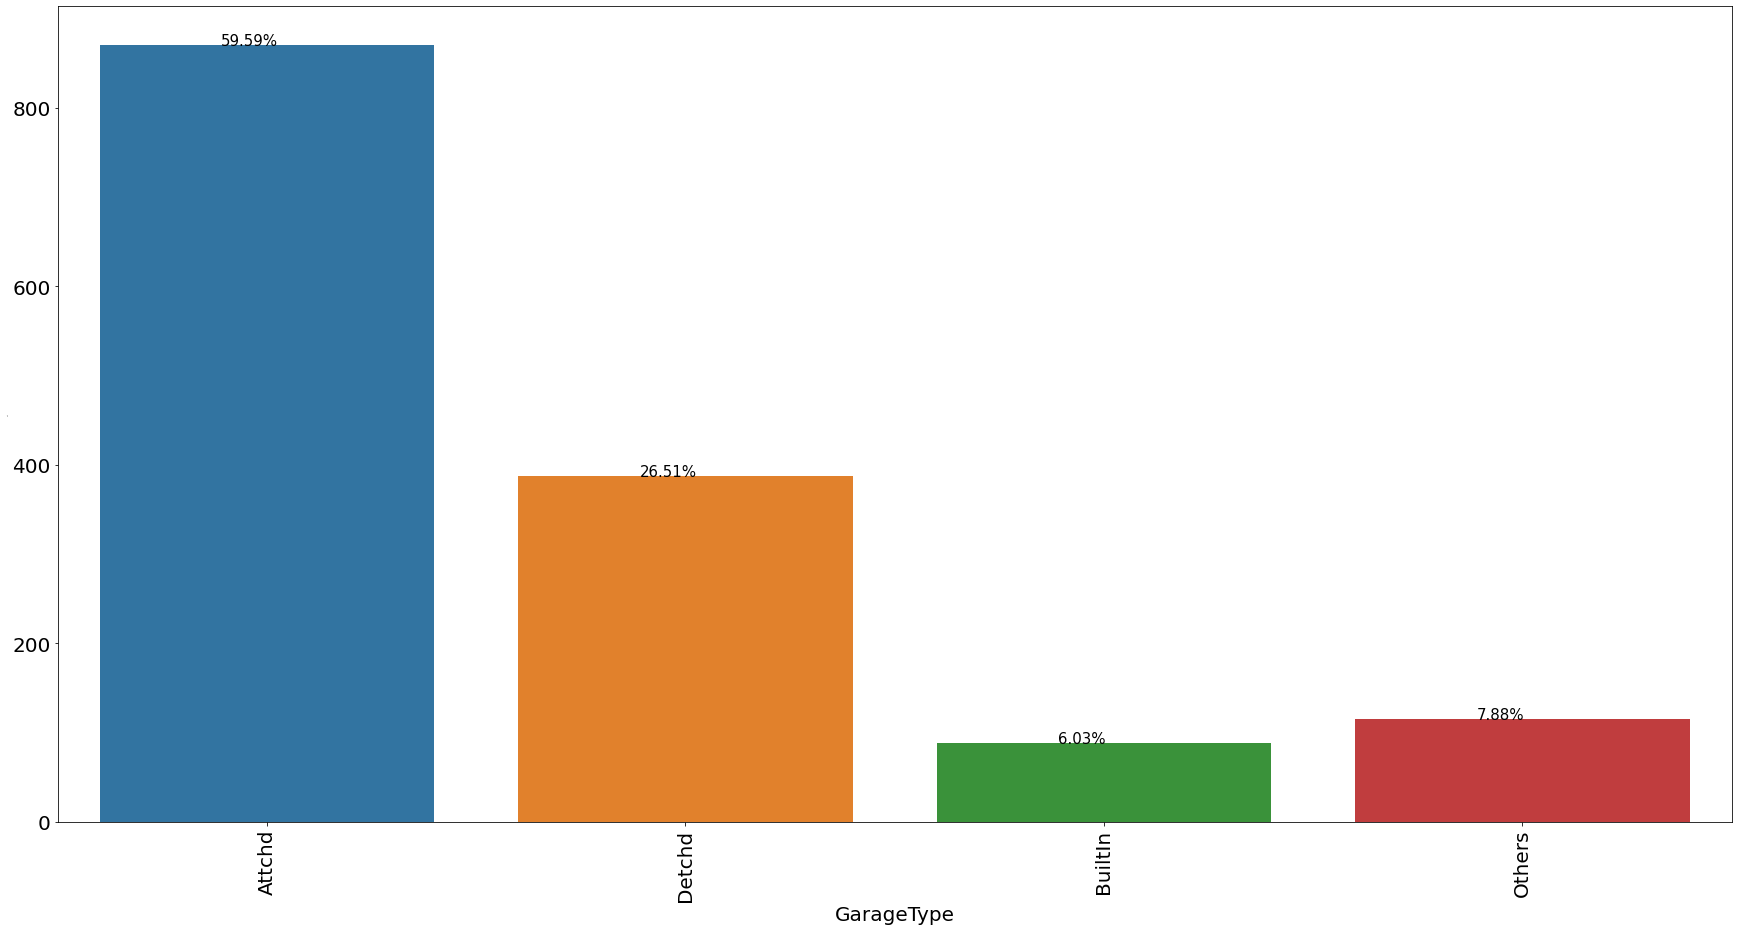

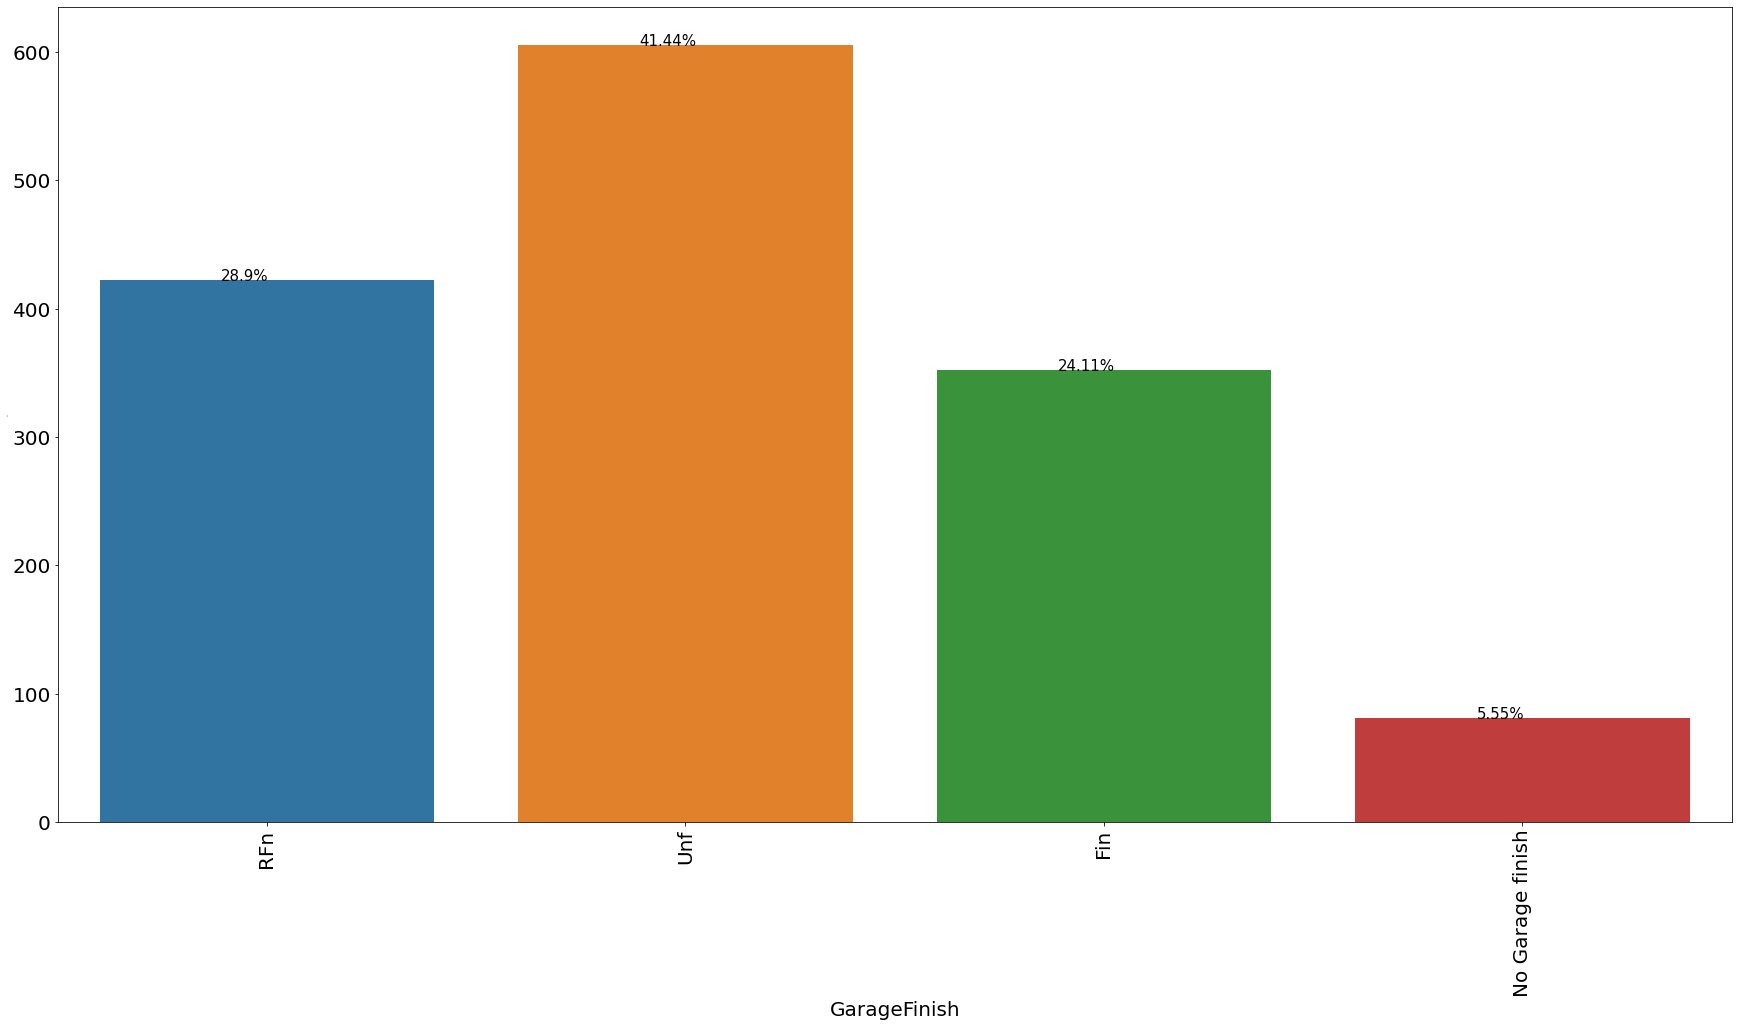

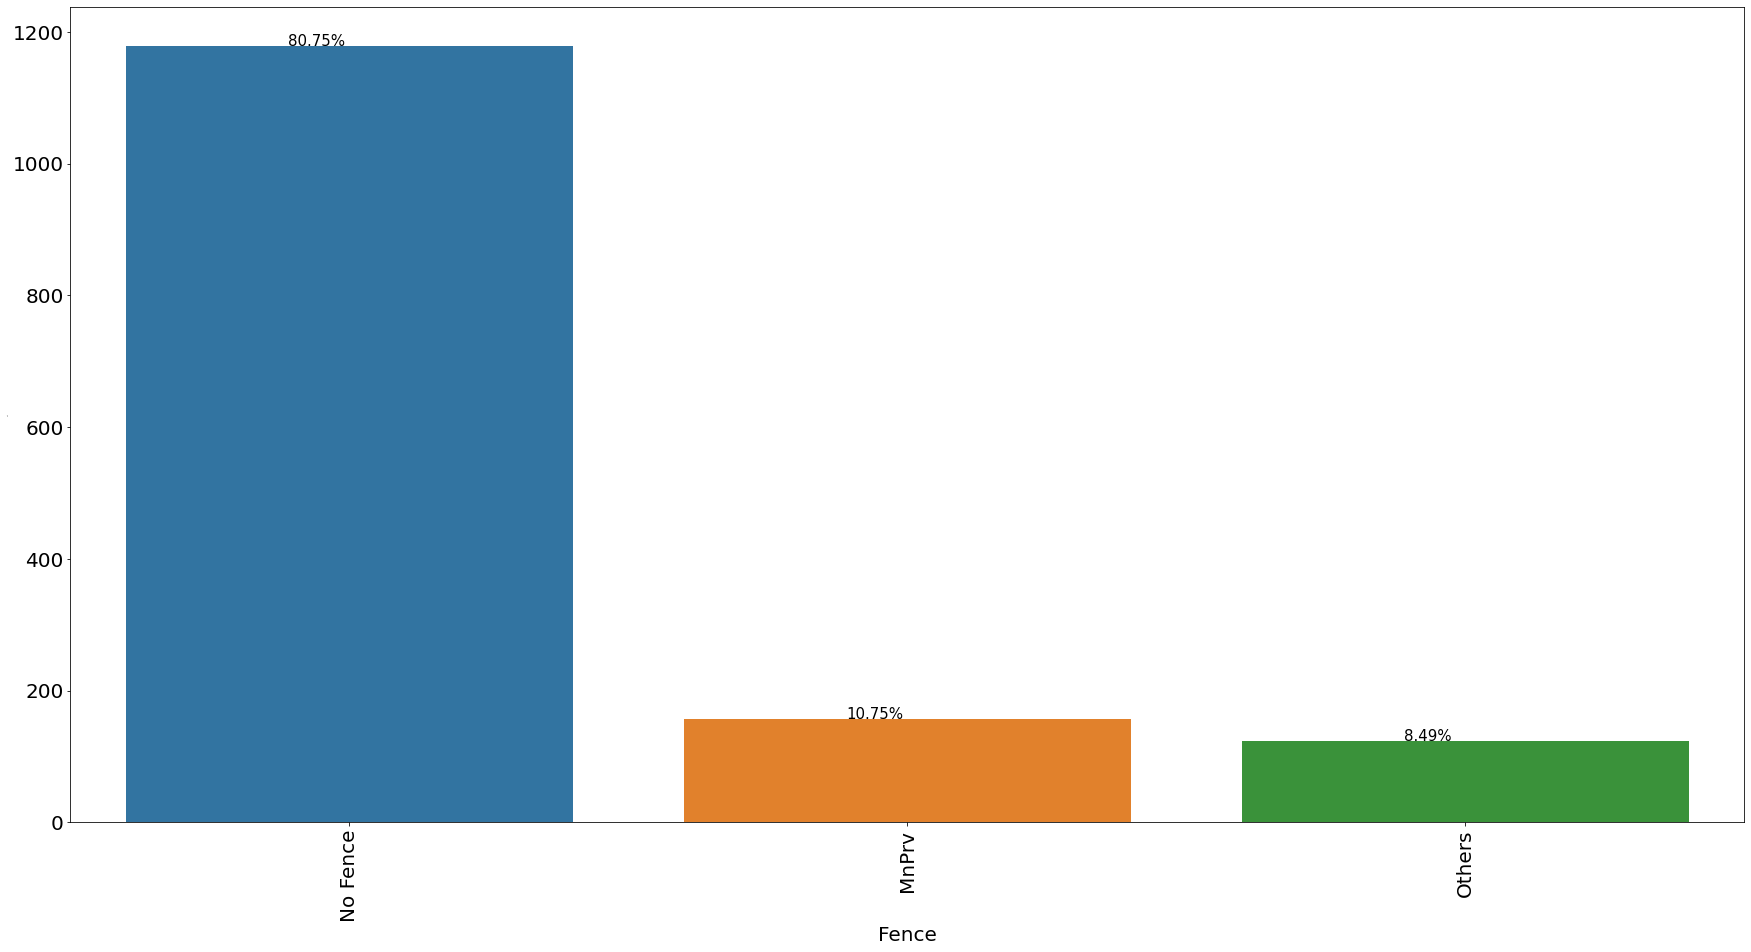

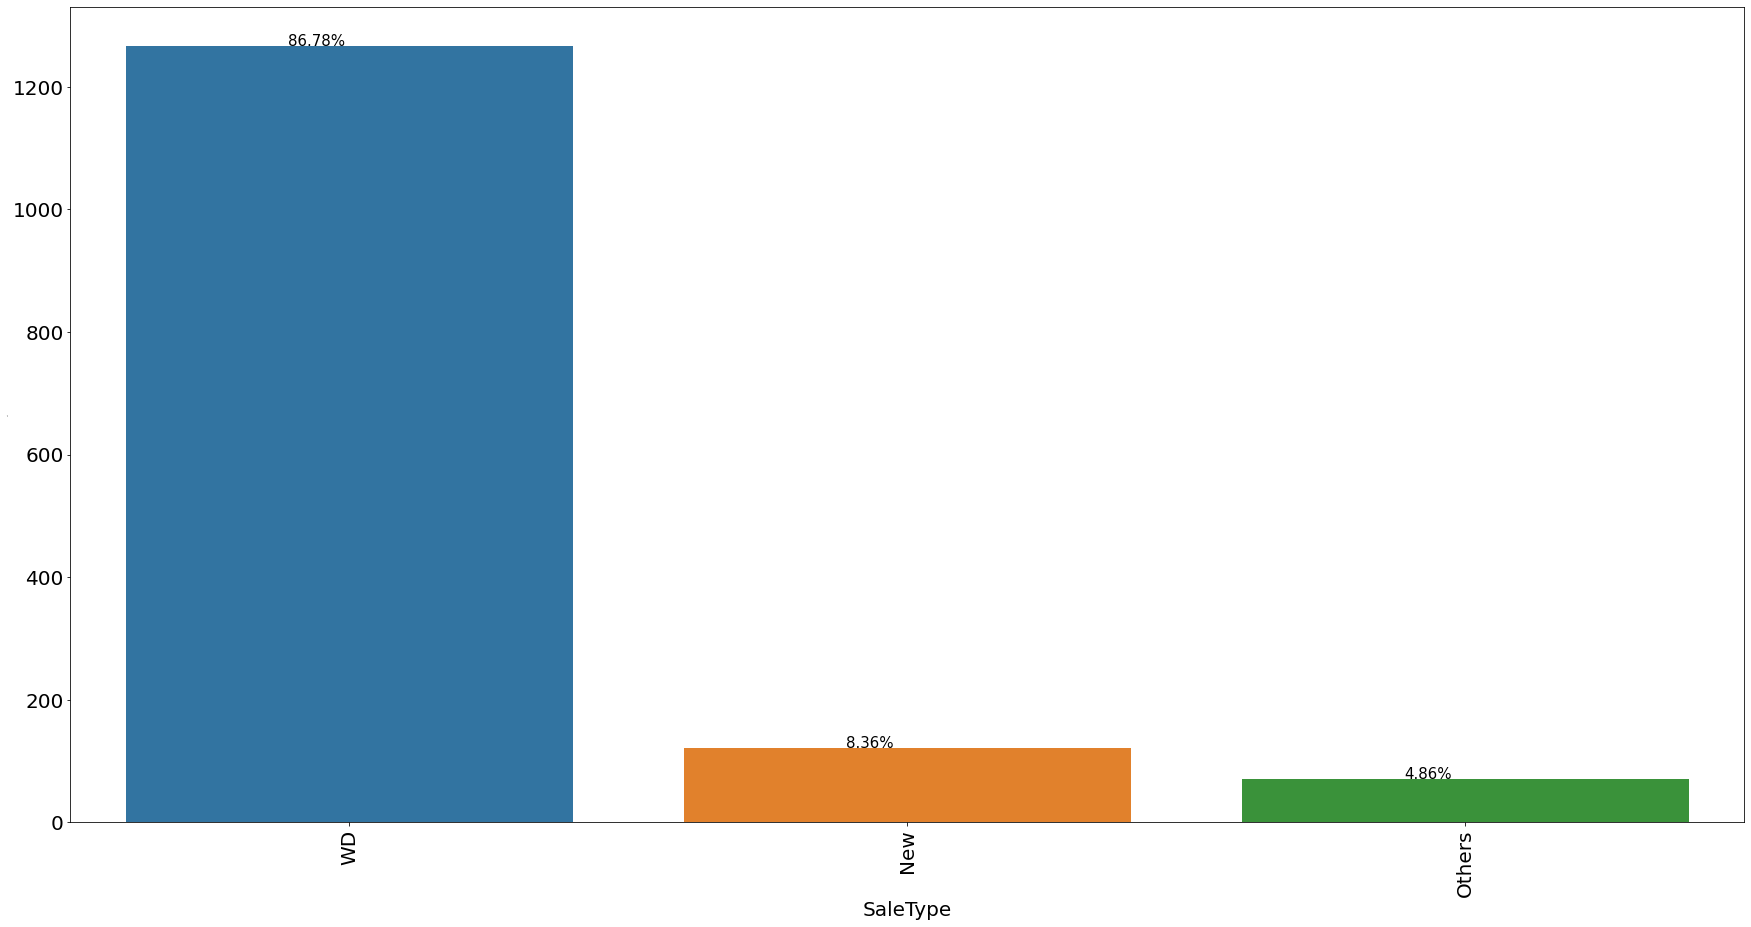

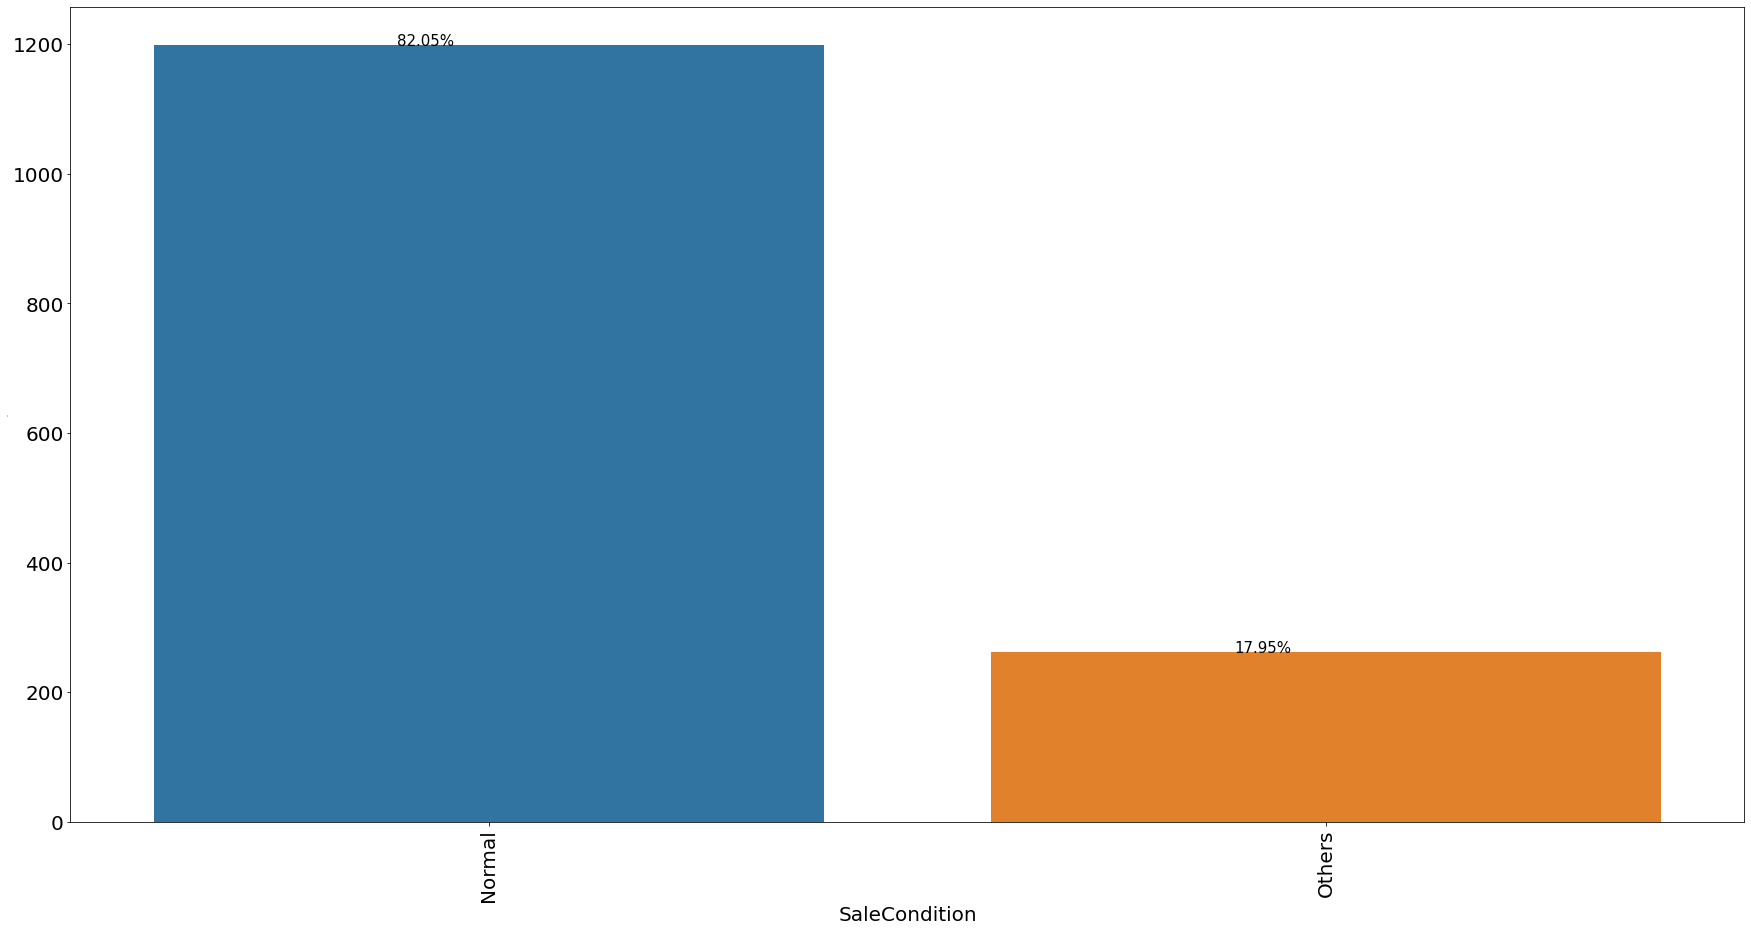

In [397]:
cnt(cat_col)

### <font color=red> <u>__INFERENCE__</u> 
    After adding the 'Others' Variable the data seem to be more clear and not uneven
    This is further help us in modelling when we create the dummy Variables 


In [398]:
house_df.head() #check data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,...,0,0,0,No Fence,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Reg,Lvl,Others,Others,Others,...,0,0,0,No Fence,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,...,0,0,0,No Fence,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,IR1,Lvl,Corner,Others,Norm,...,0,0,0,No Fence,0,2,2006,WD,Others,140000
4,5,60,RL,84.0,14260,IR1,Lvl,Others,Others,Norm,...,0,0,0,No Fence,0,12,2008,WD,Normal,250000


In [399]:
house_df.info() #check the data and the dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 66 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   Neighborhood   1460 non-null   object 
 9   Condition1     1460 non-null   object 
 10  BldgType       1460 non-null   object 
 11  HouseStyle     1460 non-null   object 
 12  OverallQual    1460 non-null   int64  
 13  OverallCond    1460 non-null   int64  
 14  YearBuilt      1460 non-null   int64  
 15  YearRemodAdd   1460 non-null   int64  
 16  RoofStyle      1460 non-null   object 
 17  Exterior1st    1460 non-null   object 
 18  Exterior

In [400]:
house_df.describe() #check data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.00000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,3.39589,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,0.57428,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,2.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,3.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,3.00000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,4.00000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5.00000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### <font color=purple> CREATING A NEW 'Age' COLUMN

In [401]:
house_df['Age']=2021-house_df['YearBuilt'] #creatig 'Age' column to determine the age of  the house from current year

In [402]:
house_df[['Age','YearBuilt']].head() #check age and year built 

,Age,YearBuilt
0,18,2003
1,45,1976
2,20,2001
3,106,1915
4,21,2000


In [403]:
#deleting the other Year and months and ID columns 
house_df = house_df.drop(['YearBuilt','YearRemodAdd','YrSold','MoSold','Id'],axis = 1)

In [404]:
house_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,SaleType,SaleCondition,SalePrice,Age
0,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,...,0,0,0,0,No Fence,0,WD,Normal,208500,18
1,20,RL,80.0,9600,Reg,Lvl,Others,Others,Others,1Fam,...,0,0,0,0,No Fence,0,WD,Normal,181500,45
2,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,...,0,0,0,0,No Fence,0,WD,Normal,223500,20
3,70,RL,60.0,9550,IR1,Lvl,Corner,Others,Norm,1Fam,...,272,0,0,0,No Fence,0,WD,Others,140000,106
4,60,RL,84.0,14260,IR1,Lvl,Others,Others,Norm,1Fam,...,0,0,0,0,No Fence,0,WD,Normal,250000,21


<AxesSubplot:>

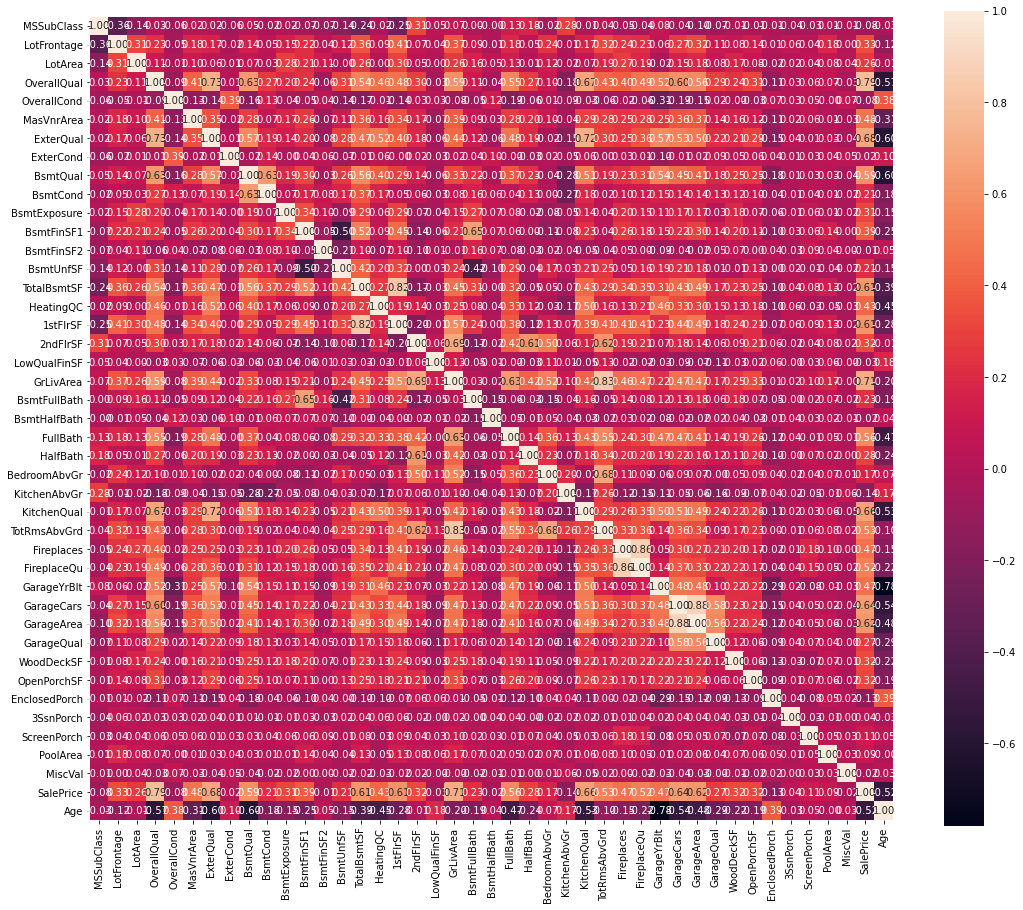

In [405]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(18, 15))
sns.heatmap(house_df.corr(),annot=True,square=True, fmt='.2f', annot_kws={'size': 10})

### <font color=red> <u>__INFERENCE__</u> 
    GarageCars and GarageArea are highly correlated 88% corelation
    TotRmsAbvGrd and GrLivArea are correlated about 83%
    
    We will not drop these now, however while modelling we will check and drop accordingly 
    
    


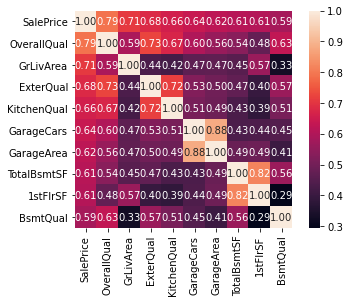

In [406]:
# Top 10 Heatmap
cols = house_df.corr().nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(house_df[house_df.corr().nlargest(10, 'SalePrice')['SalePrice'].index].values.T)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### <font color=red> <u>__INFERENCE__</u> 
    The Top Variables co-related to SalePrice are:
    -> OverallQual
    -> GrLivArea
    -> GarageCars
    -> GarageArea
    -> TotalBsmtSF
    -> 1stFlrSF
    -> ExterQual
    -> KitchenQual
    -> BsmtQual
    


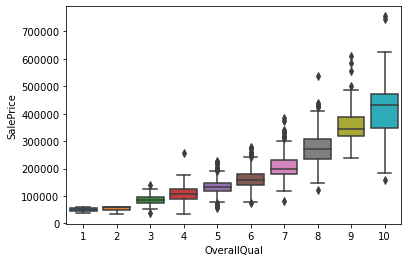

In [407]:
# Overall Quality vs Sale Price
data = pd.concat([house_df['SalePrice'], house_df['OverallQual']], axis=1)
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data)


### <font color=red> <u>__INFERENCE__</u> 
   We can see an expected trend when the OverallQual increases so does the SalesPrice


<Figure size 1440x1440 with 0 Axes>

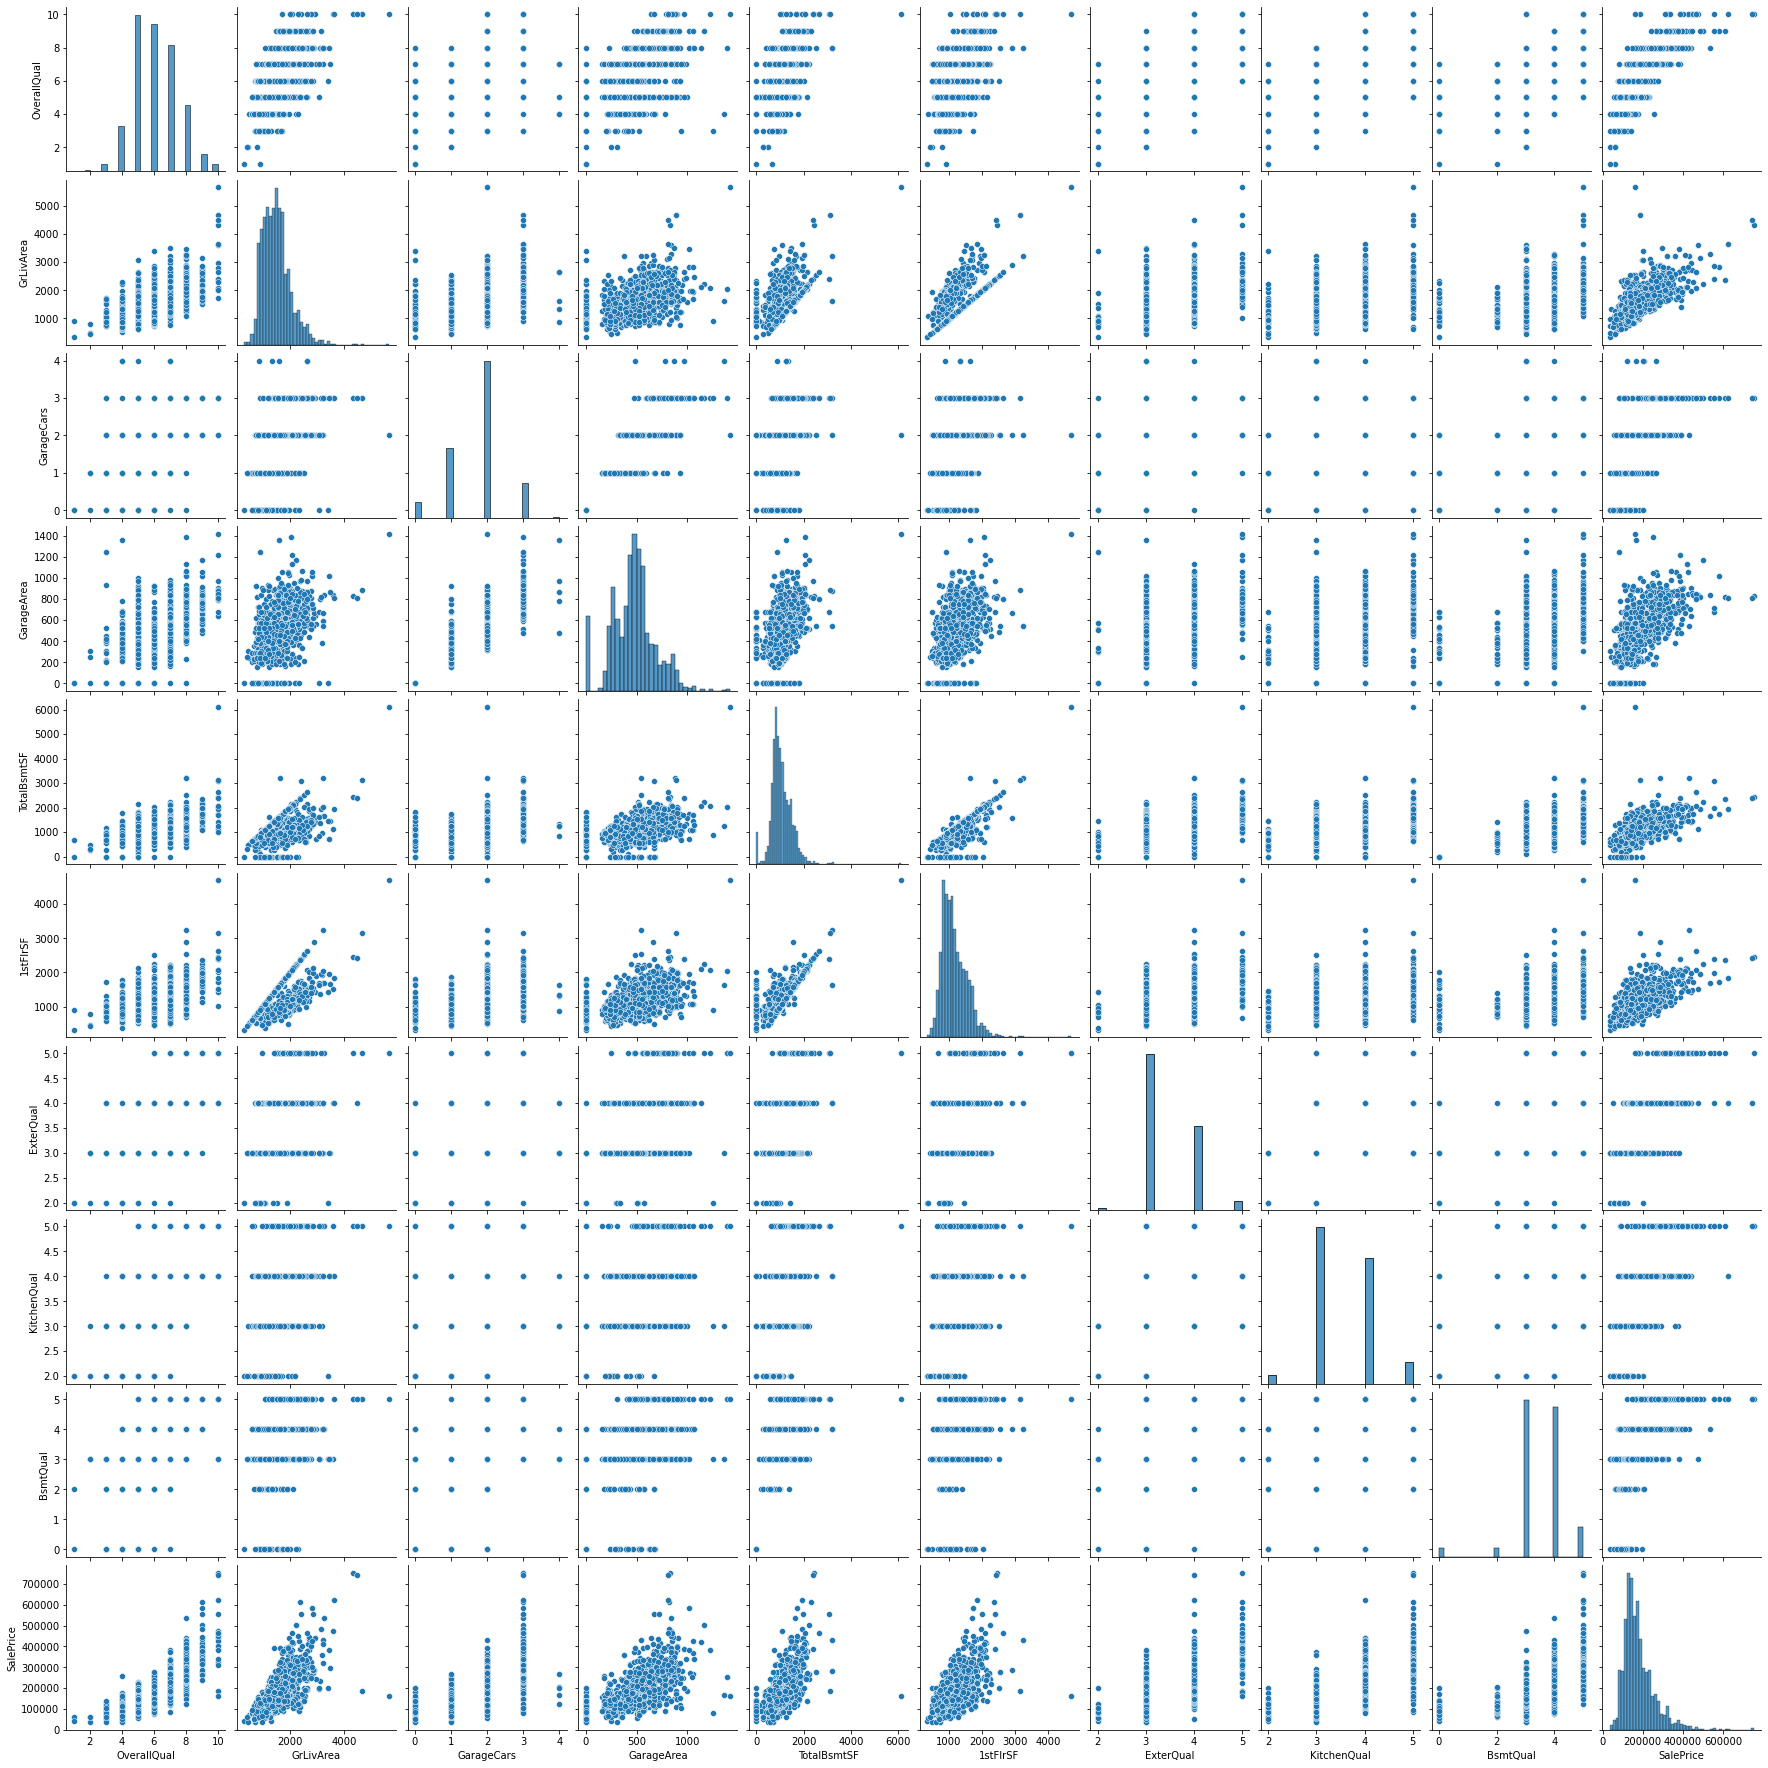

In [408]:
#check the relationship between the numeric variables 
plt.figure(figsize=(20,20))
sns.pairplot(data=house_df, vars=['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','ExterQual','KitchenQual','BsmtQual','SalePrice'])

plt.show()

### <font color=red> <u>__INFERENCE__</u> 
    -> GrLivArea is linearly corealted to TotalBsmtSF, 1stFlrSF, MasVnrArea and SalePrice
    ->TotalBsmtSF is linerly Corr to 1stFlrSF, GlivArea, MasVnrArea and Saleprice
    -> SalePrice has linear relationship with GrLivArea, GarageArea, TotalBsmtSf,1stFlrSF


<AxesSubplot:xlabel='Age', ylabel='SalePrice'>

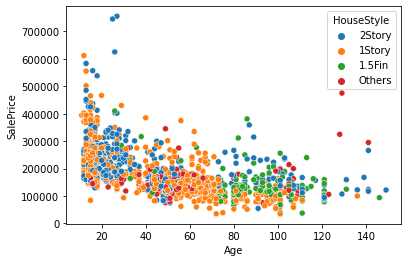

In [409]:
# Age vs Sale Price with HouseStyle
sns.scatterplot(x=house_df['Age'],y=house_df['SalePrice'], hue=house_df['HouseStyle'])

### <font color=red> <u>__INFERENCE__</u> 
    -> House with lesser age has higher Price
    -> Most of the house that are 2Story and 1Story, have lesser age and higher price


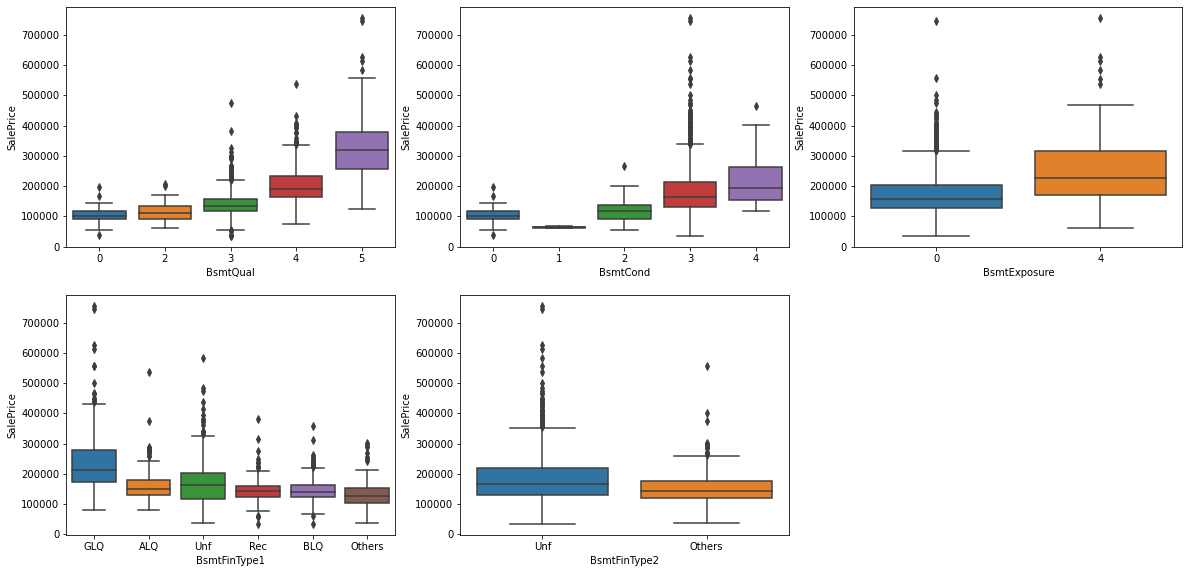

In [410]:
#check the Basement variables with SalePrice
col=['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
       'BsmtFinType2']
box_plot(col)

### <font color=red> <u>__INFERENCE__</u> 
    -> With good Basement Exposure the price incresed, Basement FinTyp1 of GLQ has higher SalePrice
    -> BasmtFinType2 Unf has higher SalePruce


# Step3: Data Preparation for Modelling

### <font color=purple>Checking the Distribution of Target Variable

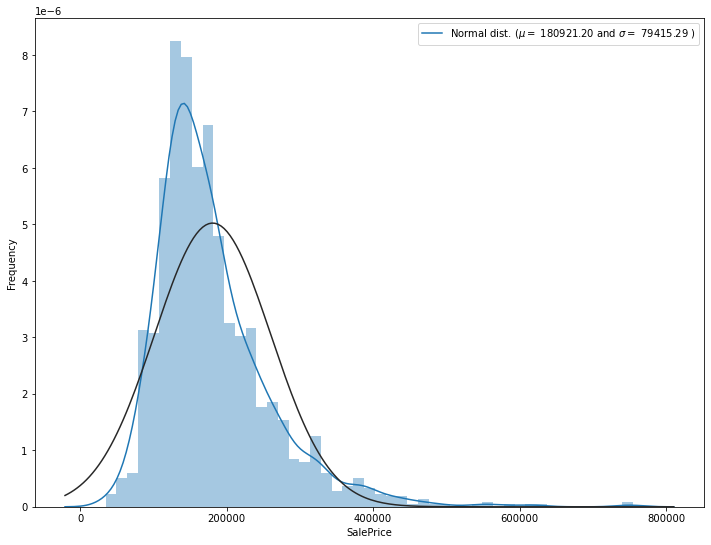

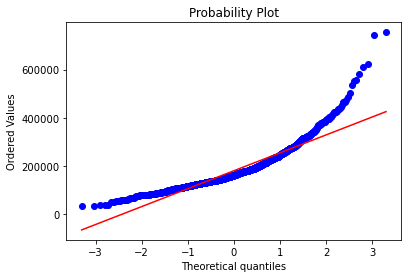

In [411]:

from scipy import stats #import Stats model from scipy

plt.subplots(figsize=(12,9))
sns.distplot(house_df['SalePrice'], fit=stats.norm)

# Get the parameters used by the function

(mu, sigma) = stats.norm.fit(house_df['SalePrice'])

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot

fig = plt.figure()
stats.probplot(house_df['SalePrice'], plot=plt)
plt.show()

### <font color=red> <u>__INFERENCE__</u> 
    -> We can observe from the above graphn that the target variable, SalePrice is not normaly sitributed
    -> The Data points does not aligh with the red ine which represents normal distribution, hence it is skewed.
    -> Data is right skewed due to presense of outliers


#### We can't cap or drop the outliers of the target as this would alter or delete a large range of data which would result in only a portion of data being available for modelling and that is not ideal. Therefore its best to perform transformation on the target varibale. We will use log trasform.

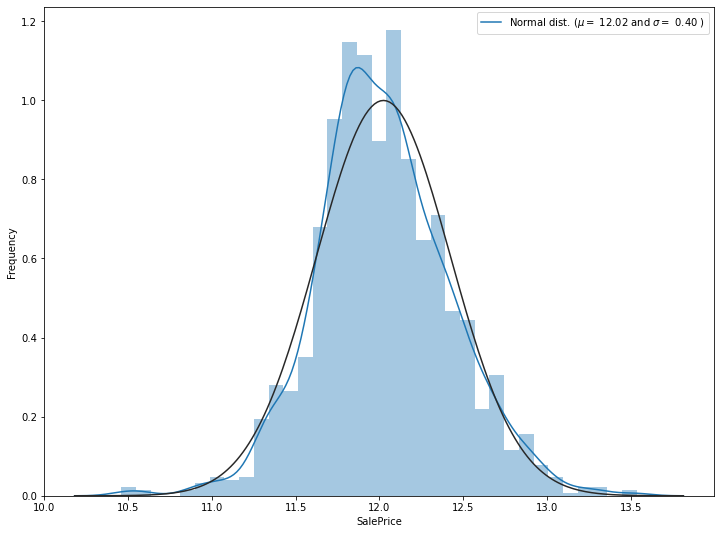

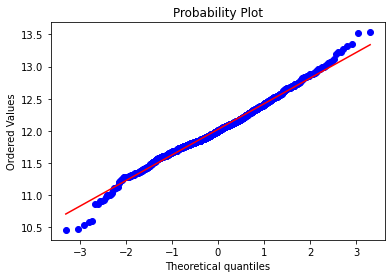

In [412]:
#we use log function which is in numpy
house_df['SalePrice'] = np.log(house_df['SalePrice'])

#Check again for normal distribution

plt.subplots(figsize=(12,9))
sns.distplot(house_df['SalePrice'], fit=stats.norm)

# Get the  parameters used by the function

(mu, sigma) = stats.norm.fit(house_df['SalePrice'])

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot

fig = plt.figure()
stats.probplot(house_df['SalePrice'], plot=plt)
plt.show()

### <font color=red> <u>__INFERENCE__</u> 
    -> The data now seem to be normally distributed.
    -> The data is aligned with the red line indicating there is no skewness
    -> Our data is now ready 


# Step3: Data Preparation for Modelling


The categorical string variables have to be converted to integer values for the modelling

In [413]:
#list all categorical columns 
house_df.select_dtypes(exclude=object).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'GarageQual',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'Age'],
      dtype='object')

In [414]:
num_vars=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'GarageQual',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'Age']

In [415]:
#list all categorical columns 
house_df.select_dtypes(include=object).columns

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'Foundation', 'BsmtFinType1', 'BsmtFinType2',
       'GarageType', 'GarageFinish', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')

### <font color=purple> Dividing into X and Y sets for the model building

In [416]:
# Putting independent variable to X

X = house_df.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,SaleType,SaleCondition,Age
0,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,...,61,0,0,0,0,No Fence,0,WD,Normal,18
1,20,RL,80.0,9600,Reg,Lvl,Others,Others,Others,1Fam,...,0,0,0,0,0,No Fence,0,WD,Normal,45
2,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,...,42,0,0,0,0,No Fence,0,WD,Normal,20
3,70,RL,60.0,9550,IR1,Lvl,Corner,Others,Norm,1Fam,...,35,272,0,0,0,No Fence,0,WD,Others,106
4,60,RL,84.0,14260,IR1,Lvl,Others,Others,Norm,1Fam,...,84,0,0,0,0,No Fence,0,WD,Normal,21


In [417]:
# Putting dependent variable to y

y = house_df['SalePrice']
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

### <font color=purple> Creating Dummy variables for Categorical columns

In [418]:
#creating dummies

MSZoning1=pd.get_dummies(X['MSZoning'],prefix='MSzon_',drop_first=True)#dropping first as n-1 dummy variables are suffice
LotShape1=pd.get_dummies(X['LotShape'],prefix='Lo1S_',drop_first=True)#dropping first as n-1 dummy variables are suffice
LandContour1=pd.get_dummies(X['LandContour'],prefix='LCon_',drop_first=True)#dropping first as n-1 dummy variables are suffice
LotConfig1=pd.get_dummies(X['LotConfig'],prefix='Lotcon_',drop_first=True)#dropping first as n-1 dummy variables are suffice
Neighborhood1=pd.get_dummies(X['Neighborhood'],prefix='Neig_',drop_first=True)#dropping first as n-1 dummy variables are suffice
Condition11=pd.get_dummies(X['Condition1'],prefix='Con1_',drop_first=True)#dropping first as n-1 dummy variables are suffice
BldgType1=pd.get_dummies(X['BldgType'],prefix='BldgT1_',drop_first=True)#dropping first as n-1 dummy variables are suffice
HouseStyle1=pd.get_dummies(X['HouseStyle'],prefix='HouseS1_',drop_first=True)#dropping first as n-1 dummy variables are suffice
RoofStyle1=pd.get_dummies(X['RoofStyle'],prefix='RoofS1_',drop_first=True)#dropping first as n-1 dummy variables are suffice
Exterior1st1=pd.get_dummies(X['Exterior1st'],prefix='Ext1_',drop_first=True)#dropping first as n-1 dummy variables are suffice
Exterior2nd1=pd.get_dummies(X['Exterior2nd'],prefix='Ext2_',drop_first=True)#dropping first as n-1 dummy variables are suffice
#ExterQual1=pd.get_dummies(house_df['ExterQual'],prefix='ExtQul_',drop_first=True)#dropping first as n-1 dummy variables are suffice
#ExterCond1=pd.get_dummies(house_df['ExterCond'],prefix='ExtCon_',drop_first=True)#dropping first as n-1 dummy variables are suffice
Foundation1=pd.get_dummies(X['Foundation'],prefix='Fon1_',drop_first=True)#dropping first as n-1 dummy variables are suffice
#BsmtQual1=pd.get_dummies(house_df['BsmtQual'],prefix='BsmtQ_',drop_first=True)#dropping first as n-1 dummy variables are suffice
#BsmtCond1=pd.get_dummies(house_df['BsmtCond'],prefix='Bsmtcon_',drop_first=True)#dropping first as n-1 dummy variables are suffice

#BsmtExposure1=pd.get_dummies(house_df['BsmtExposure'],prefix='BsmtExp_',drop_first=True)#dropping first as n-1 dummy variables are suffice
BsmtFinType11=pd.get_dummies(X['BsmtFinType1'],prefix='BsmtFT1_',drop_first=True)#dropping first as n-1 dummy variables are suffice
BsmtFinType21=pd.get_dummies(X['BsmtFinType2'],prefix='BsmtFT2_',drop_first=True)#dropping first as n-1 dummy variables are suffice
#HeatingQC1=pd.get_dummies(house_df['HeatingQC'],prefix='Heat_',drop_first=True)#dropping first as n-1 dummy variables are suffice
#KitchenQual1=pd.get_dummies(house_df['KitchenQual'],prefix='Kit_',drop_first=True)#dropping first as n-1 dummy variables are suffice
#FireplaceQu1=pd.get_dummies(house_df['FireplaceQu'],prefix='Fire_',drop_first=True)#dropping first as n-1 dummy variables are suffice
GarageType1=pd.get_dummies(X['GarageType'],prefix='GarTp_',drop_first=True)#dropping first as n-1 dummy variables are suffice
GarageFinish1=pd.get_dummies(X['GarageFinish'],prefix='GarFnsh_',drop_first=True)#dropping first as n-1 dummy variables are suffice
#GarageQual1=pd.get_dummies(house_df['GarageQual'],drop_first=True)#dropping first as n-1 dummy variables are suffice
Fence1=pd.get_dummies(X['Fence'],prefix='Fence_',drop_first=True)#dropping first as n-1 dummy variables are suffice
SaleType1=pd.get_dummies(X['SaleType'],prefix='SaleTyp_',drop_first=True)#dropping first as n-1 dummy variables are suffice
SaleCondition1=pd.get_dummies(X['SaleCondition'],prefix='Salecon_',drop_first=True)#dropping first as n-1 dummy variables are suffice


In [419]:
#concatenating all dummies with the dataframe
X=pd.concat([MSZoning1, LotShape1, LandContour1, LotConfig1, Neighborhood1,
       Condition11, BldgType1, HouseStyle1, RoofStyle1, Exterior1st1,
       Exterior2nd1,Foundation1,BsmtFinType11, BsmtFinType21,GarageType1,GarageFinish1,Fence1, SaleType1, SaleCondition1,X],axis=1) #concating the dummy varibales with house_df dataframe
X.head()

,MSzon__RL,MSzon__RM,Lo1S__Others,Lo1S__Reg,LCon__Others,Lotcon__Inside,Lotcon__Others,Neig__Edwards,Neig__NAmes,Neig__OldTown,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,SaleType,SaleCondition,Age
0,1,0,0,1,0,1,0,0,0,0,...,61,0,0,0,0,No Fence,0,WD,Normal,18
1,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,No Fence,0,WD,Normal,45
2,1,0,0,0,0,1,0,0,0,0,...,42,0,0,0,0,No Fence,0,WD,Normal,20
3,1,0,0,0,0,0,0,0,0,0,...,35,272,0,0,0,No Fence,0,WD,Others,106
4,1,0,0,0,0,0,1,0,0,0,...,84,0,0,0,0,No Fence,0,WD,Normal,21


In [420]:
X.select_dtypes(include=object).columns

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'Foundation', 'BsmtFinType1', 'BsmtFinType2',
       'GarageType', 'GarageFinish', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')

In [421]:
#droping the original categorical columns 
X.drop(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'Foundation', 'BsmtFinType1', 'BsmtFinType2',
       'GarageType', 'GarageFinish', 'Fence', 'SaleType', 'SaleCondition'],axis=1,inplace=True)

In [422]:
X.columns #final columns

Index(['MSzon__RL', 'MSzon__RM', 'Lo1S__Others', 'Lo1S__Reg', 'LCon__Others',
       'Lotcon__Inside', 'Lotcon__Others', 'Neig__Edwards', 'Neig__NAmes',
       'Neig__OldTown', 'Neig__Others', 'Con1__Others', 'BldgT1__Others',
       'HouseS1__1Story', 'HouseS1__2Story', 'HouseS1__Others', 'RoofS1__Hip',
       'RoofS1__Others', 'Ext1__MetalSd', 'Ext1__Others', 'Ext1__Plywood',
       'Ext1__VinylSd', 'Ext1__Wd Sdng', 'Ext2__MetalSd', 'Ext2__Others',
       'Ext2__Plywood', 'Ext2__VinylSd', 'Ext2__Wd Sdng', 'Fon1__CBlock',
       'Fon1__Others', 'Fon1__PConc', 'BsmtFT1__BLQ', 'BsmtFT1__GLQ',
       'BsmtFT1__Others', 'BsmtFT1__Rec', 'BsmtFT1__Unf', 'BsmtFT2__Unf',
       'GarTp__BuiltIn', 'GarTp__Detchd', 'GarTp__Others',
       'GarFnsh__No Garage finish', 'GarFnsh__RFn', 'GarFnsh__Unf',
       'Fence__No Fence', 'Fence__Others', 'SaleTyp__Others', 'SaleTyp__WD',
       'Salecon__Others', 'MSSubClass', 'LotFrontage', 'LotArea',
       'OverallQual', 'OverallCond', 'MasVnrArea', 'Exter

In [423]:
X.info() #check the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 90 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   MSzon__RL                  1460 non-null   uint8  
 1   MSzon__RM                  1460 non-null   uint8  
 2   Lo1S__Others               1460 non-null   uint8  
 3   Lo1S__Reg                  1460 non-null   uint8  
 4   LCon__Others               1460 non-null   uint8  
 5   Lotcon__Inside             1460 non-null   uint8  
 6   Lotcon__Others             1460 non-null   uint8  
 7   Neig__Edwards              1460 non-null   uint8  
 8   Neig__NAmes                1460 non-null   uint8  
 9   Neig__OldTown              1460 non-null   uint8  
 10  Neig__Others               1460 non-null   uint8  
 11  Con1__Others               1460 non-null   uint8  
 12  BldgT1__Others             1460 non-null   uint8  
 13  HouseS1__1Story            1460 non-null   uint8

In [424]:
X.describe()

,MSzon__RL,MSzon__RM,Lo1S__Others,Lo1S__Reg,LCon__Others,Lotcon__Inside,Lotcon__Others,Neig__Edwards,Neig__NAmes,Neig__OldTown,...,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,Age
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.788356,0.149315,0.034932,0.633562,0.102055,0.720548,0.099315,0.068493,0.154110,0.077397,...,472.980137,2.810274,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,49.732192
std,0.408614,0.356521,0.183669,0.481996,0.302824,0.448884,0.299187,0.252677,0.361177,0.267312,...,213.804841,0.722898,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,30.202904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,334.500000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
50%,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,480.000000,3.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000
75%,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,576.000000,3.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1418.000000,5.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,149.000000


In [425]:
X.shape

(1460, 90)

#### We can see that all the columns are now numeric and we have 91 columns and 1460 rows 

In [426]:
#importing libraries for modelling 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor



### <font color=purple> Scaling all the variables

In [427]:
# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSzon__RL', 'MSzon__RM', 'Lo1S__Others', 'Lo1S__Reg', 'LCon__Others',
       'Lotcon__Inside', 'Lotcon__Others', 'Neig__Edwards', 'Neig__NAmes',
       'Neig__OldTown', 'Neig__Others', 'Con1__Others', 'BldgT1__Others',
       'HouseS1__1Story', 'HouseS1__2Story', 'HouseS1__Others', 'RoofS1__Hip',
       'RoofS1__Others', 'Ext1__MetalSd', 'Ext1__Others', 'Ext1__Plywood',
       'Ext1__VinylSd', 'Ext1__Wd Sdng', 'Ext2__MetalSd', 'Ext2__Others',
       'Ext2__Plywood', 'Ext2__VinylSd', 'Ext2__Wd Sdng', 'Fon1__CBlock',
       'Fon1__Others', 'Fon1__PConc', 'BsmtFT1__BLQ', 'BsmtFT1__GLQ',
       'BsmtFT1__Others', 'BsmtFT1__Rec', 'BsmtFT1__Unf', 'BsmtFT2__Unf',
       'GarTp__BuiltIn', 'GarTp__Detchd', 'GarTp__Others',
       'GarFnsh__No Garage finish', 'GarFnsh__RFn', 'GarFnsh__Unf',
       'Fence__No Fence', 'Fence__Others', 'SaleTyp__Others', 'SaleTyp__WD',
       'Salecon__Others', 'MSSubClass', 'LotFrontage', 'LotArea',
       'OverallQual', 'OverallCond', 'MasVnrArea', 'Exter

### <font color=purple> Splitting the Data into Training and Testing Sets

In [428]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size=0.7,test_size=0.3, random_state=100)



In [429]:
X_train.describe()

,MSzon__RL,MSzon__RM,Lo1S__Others,Lo1S__Reg,LCon__Others,Lotcon__Inside,Lotcon__Others,Neig__Edwards,Neig__NAmes,Neig__OldTown,...,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,Age
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,...,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,-0.006981,0.004258,0.023124,0.002304,0.009066,-0.021127,-0.007862,0.027408,-0.006364,-0.000083,...,-0.006694,-0.008525,-0.014201,0.003739,0.022617,0.018107,-0.018191,-0.015164,0.010529,0.000533
std,1.005385,1.004664,1.057216,0.999848,1.012303,1.010605,0.989865,1.045928,0.994352,1.000359,...,0.995295,1.003893,0.993510,0.998904,1.034473,1.103264,0.916457,0.859589,1.166168,1.005075
min,-1.930005,-0.418955,-0.190252,-1.314904,-0.337126,-1.605749,-0.332063,-0.271163,-0.426833,-0.289638,...,-2.212963,-3.888844,-0.752176,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.282839
25%,0.518133,-0.418955,-0.190252,-1.314904,-0.337126,-1.605749,-0.332063,-0.271163,-0.426833,-0.289638,...,-0.678328,0.262542,-0.752176,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.951632
50%,0.518133,-0.418955,-0.190252,0.760512,-0.337126,0.622762,-0.332063,-0.271163,-0.426833,-0.289638,...,0.032844,0.262542,-0.752176,-0.327030,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.057371
75%,0.518133,-0.418955,-0.190252,0.760512,-0.337126,0.622762,-0.332063,-0.271163,-0.426833,-0.289638,...,0.482006,0.262542,0.588651,0.352386,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.571923
max,0.518133,2.386891,5.256182,0.760512,2.966253,0.622762,3.011472,3.687818,2.342838,3.452587,...,4.421526,3.030133,6.087635,7.191843,8.675309,17.217233,6.439718,16.065342,31.165268,3.287824


#### All vars are scaled now

# Step7: Model Building

Let's start by building logistic regression model till we achieve required metrics and a better stable model.

### <font color=purple> Running our Linear Regression Model

In [430]:
from sklearn.linear_model import LinearRegression

# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [431]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

12.023563132968146
[ 8.30121175e-03 -2.38959975e-02  1.31576747e-03  2.03525647e-03
 -8.17642913e-03 -3.78512049e-03  2.75584467e-03 -1.92219798e-02
  2.36921313e-03  2.45911736e-03  1.47895649e-02 -2.60195393e-02
 -1.85971999e-03  1.40629932e-02 -1.78503804e-02 -3.07789769e-04
  1.69282215e-03  6.43536473e-03  1.45394572e-02  1.87430826e-02
  4.69966832e-03  2.55987012e-02  6.47006974e-03 -3.98400197e-05
 -2.05435500e-02 -1.28684211e-05 -9.27889521e-03 -3.41079522e-03
  1.62040407e-02  7.94348088e-03  2.86629927e-02 -1.13146393e-03
  4.71757597e-03 -6.81949417e-03 -9.62516797e-03 -2.67135554e-02
  1.15224983e-02 -1.09130390e-02 -5.45282135e-03 -1.25524759e-02
  3.50538538e-02 -3.81950950e-03 -1.39387307e-02  9.18409063e-04
 -6.35307703e-03 -2.42915909e-02 -3.54272314e-02 -2.12206640e-02
 -1.83309465e-02 -1.14122060e-02  1.76716762e-02  9.25166034e-02
  4.94328662e-02  2.04136378e-03 -2.08128162e-04 -5.70866170e-03
  1.88947450e-02  4.04645090e-03  2.12824756e-02  5.58444926e+10
  1.97

In [432]:
from sklearn.metrics import r2_score, mean_squared_error

In [433]:
#check the scores
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 Train",r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 Test",r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Sum of square Train",rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Sum of square test",rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Mean Sqr Error Train",mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Mean Sqr Error test",mse_test_lr)
metric.append(mse_test_lr**0.5)

R2 Train 0.8952625771636427
R2 Test 0.8794691846813982
Sum of square Train 16.80954384366673
Sum of square test 8.686483626209593
Mean Sqr Error Train 0.01646380396049631
Mean Sqr Error test 0.019832154397738798


### <font color=red> <u>__INFERENCE__</u> 
    R2 for test and train is almost same
    Sum of Squares for train and test has huge difference 
    Mean Sqr Error is almost same for both test and train


#### Checking Mulicolinearity using VIF

In [434]:
# Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
61,BsmtUnfSF,inf
64,1stFlrSF,inf
59,BsmtFinSF1,inf
60,BsmtFinSF2,inf
62,TotalBsmtSF,inf
67,GrLivArea,inf
66,LowQualFinSF,inf
65,2ndFlrSF,inf
26,Ext2__VinylSd,30.96
21,Ext1__VinylSd,30.85


### Many of the of the columns have high VID it is infinity, this indicates high ,ulticolieanrity, hence drop the columns


In [435]:
X_train = X_train.drop(['BsmtUnfSF','1stFlrSF','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','GrLivArea','LowQualFinSF','2ndFlrSF'], axis = 1)

In [436]:
# Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
26,Ext2__VinylSd,30.80
21,Ext1__VinylSd,30.66
18,Ext1__MetalSd,28.16
23,Ext2__MetalSd,28.14
40,GarFnsh__No Garage finish,17.11
73,GarageQual,13.59
12,BldgT1__Others,12.18
48,MSSubClass,12.01
22,Ext1__Wd Sdng,10.29
27,Ext2__Wd Sdng,9.85


### Many of the of the columns have high VIF is > 10, this indicates high multicolieanrity, hence drop the columns


In [437]:
X_train = X_train.drop(['Ext2__VinylSd','Ext1__VinylSd','Ext1__MetalSd','Ext2__MetalSd','GarFnsh__No Garage finish','GarageQual','BldgT1__Others','MSSubClass','Ext1__Wd Sdng'], axis = 1)

In [438]:
# Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
72,Age,8.14
24,Fon1__PConc,6.73
63,GarageCars,6.68
64,GarageArea,6.42
22,Fon1__CBlock,5.43
61,FireplaceQu,5.23
60,Fireplaces,4.92
48,BsmtQual,4.74
12,HouseS1__1Story,4.48
59,TotRmsAbvGrd,4.18


#### ITS ALWAYS BETTER TO HAVE A MODEL WITH LESSER VARIABLE, PERFORMING FURTHER MODELLING.

###### ALSO RIDGE AND LASSO REGRESSION CAN'T HADLE THE HUDE DATA AND REDUCING THE VARIABLES WOULD BE BETTER

### <font color=purple> Performing RFE to identify variables to be used

In [439]:
#perform RFE
from sklearn.feature_selection import RFE #import RFE
rfe = RFE(lm, 50) #choose the model and number of variables
rfe.fit(X_train, y_train) #fit to data



RFE(estimator=LinearRegression(), n_features_to_select=50)

In [440]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))
#check the RFE ranking and suppport for each column

[('MSzon__RL', True, 1),
 ('MSzon__RM', True, 1),
 ('Lo1S__Others', False, 15),
 ('Lo1S__Reg', False, 5),
 ('LCon__Others', False, 4),
 ('Lotcon__Inside', True, 1),
 ('Lotcon__Others', False, 22),
 ('Neig__Edwards', True, 1),
 ('Neig__NAmes', False, 8),
 ('Neig__OldTown', False, 14),
 ('Neig__Others', True, 1),
 ('Con1__Others', True, 1),
 ('HouseS1__1Story', False, 11),
 ('HouseS1__2Story', True, 1),
 ('HouseS1__Others', True, 1),
 ('RoofS1__Hip', False, 3),
 ('RoofS1__Others', True, 1),
 ('Ext1__Others', True, 1),
 ('Ext1__Plywood', False, 24),
 ('Ext2__Others', True, 1),
 ('Ext2__Plywood', False, 23),
 ('Ext2__Wd Sdng', False, 7),
 ('Fon1__CBlock', True, 1),
 ('Fon1__Others', True, 1),
 ('Fon1__PConc', True, 1),
 ('BsmtFT1__BLQ', False, 13),
 ('BsmtFT1__GLQ', True, 1),
 ('BsmtFT1__Others', False, 20),
 ('BsmtFT1__Rec', True, 1),
 ('BsmtFT1__Unf', True, 1),
 ('BsmtFT2__Unf', False, 9),
 ('GarTp__BuiltIn', True, 1),
 ('GarTp__Detchd', True, 1),
 ('GarTp__Others', True, 1),
 ('GarFnsh_

In [441]:
selected_features = X_train.columns[rfe.support_]
selected_features #features which supports, ones with true value

Index(['MSzon__RL', 'MSzon__RM', 'Lotcon__Inside', 'Neig__Edwards',
       'Neig__Others', 'Con1__Others', 'HouseS1__2Story', 'HouseS1__Others',
       'RoofS1__Others', 'Ext1__Others', 'Ext2__Others', 'Fon1__CBlock',
       'Fon1__Others', 'Fon1__PConc', 'BsmtFT1__GLQ', 'BsmtFT1__Rec',
       'BsmtFT1__Unf', 'GarTp__BuiltIn', 'GarTp__Detchd', 'GarTp__Others',
       'GarFnsh__RFn', 'GarFnsh__Unf', 'Fence__Others', 'SaleTyp__Others',
       'SaleTyp__WD', 'Salecon__Others', 'LotArea', 'OverallQual',
       'OverallCond', 'MasVnrArea', 'BsmtQual', 'BsmtExposure', 'HeatingQC',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Age'],
      dtype='object')

In [442]:
insignificant_features = X_train.columns[~rfe.support_]
insignificant_features #features which dont support

Index(['Lo1S__Others', 'Lo1S__Reg', 'LCon__Others', 'Lotcon__Others',
       'Neig__NAmes', 'Neig__OldTown', 'HouseS1__1Story', 'RoofS1__Hip',
       'Ext1__Plywood', 'Ext2__Plywood', 'Ext2__Wd Sdng', 'BsmtFT1__BLQ',
       'BsmtFT1__Others', 'BsmtFT2__Unf', 'Fence__No Fence', 'LotFrontage',
       'ExterQual', 'ExterCond', 'BsmtCond', 'BsmtHalfBath', 'OpenPorchSF',
       'PoolArea', 'MiscVal'],
      dtype='object')

In [443]:
col=['MSzon__RL', 'MSzon__RM', 'Lotcon__Inside', 'Neig__Edwards',
       'Neig__Others', 'Con1__Others', 'HouseS1__2Story', 'HouseS1__Others',
       'RoofS1__Others', 'Ext1__Others', 'Ext2__Others', 'Fon1__CBlock',
       'Fon1__Others', 'Fon1__PConc', 'BsmtFT1__GLQ', 'BsmtFT1__Rec',
       'BsmtFT1__Unf', 'GarTp__BuiltIn', 'GarTp__Detchd', 'GarTp__Others',
       'GarFnsh__RFn', 'GarFnsh__Unf', 'Fence__Others', 'SaleTyp__Others',
       'SaleTyp__WD', 'Salecon__Others', 'LotArea', 'OverallQual',
       'OverallCond', 'MasVnrArea', 'BsmtQual', 'BsmtExposure', 'HeatingQC',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Age']

In [444]:

# Modify the X_train and X_test using columns from RFE
X_train = X_train[col]
X_test = X_test[col]

In [445]:
lm = LinearRegression()
lm.fit(X_train, y_train) #Fit model with new columns from RFE

LinearRegression()

In [446]:
# Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
49,Age,6.74
13,Fon1__PConc,6.55
43,GarageCars,6.30
44,GarageArea,5.98
41,FireplaceQu,5.08
11,Fon1__CBlock,5.07
40,Fireplaces,4.71
39,TotRmsAbvGrd,3.96
27,OverallQual,3.68
0,MSzon__RL,3.67


#### The VIF seem good, we can now proceed

In [447]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

12.024611116424206
[ 0.00687234 -0.02668237 -0.00608475 -0.01952292  0.00649727 -0.02297449
 -0.0258702  -0.01547634  0.01004877  0.01525249 -0.02212302  0.02233235
  0.01205282  0.03447994  0.00723793 -0.00750007 -0.02197952 -0.00652853
 -0.01197874 -0.00844891 -0.00751319 -0.01622046 -0.01153829 -0.01947032
 -0.02900899 -0.01748633  0.01856364  0.11028978  0.04686423  0.01055193
  0.03263257  0.02211743  0.02041456  0.02998614  0.03999181  0.02545808
  0.01654206 -0.0149888   0.02918613  0.0684011   0.00655463  0.02708631
 -0.01481408  0.03540041  0.0281358   0.01319221  0.0092867   0.00658296
  0.0106308  -0.01414912]


In [448]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 Train",r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 Test",r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Sum of square Train",rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Sum of square test",rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Mean Sqr Error Train",mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Mean Sqr Error test",mse_test_lr)
metric.append(mse_test_lr**0.5)

R2 Train 0.8803676607406647
R2 Test 0.8680762155415969
Sum of square Train 19.200062379252536
Sum of square test 9.507558632009566
Mean Sqr Error Train 0.01880515414226497
Mean Sqr Error test 0.02170675486760175


### <font color=red> <u>__INFERENCE__</u> 
    R2 for test and train is almost same
    Sum of Squares for train and test has huge difference 
    Mean Sqr Error is almost same for both test and train


In [449]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

## Ridge and Lasso Regression

Let's now try predicting car prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

## Ridge Regression

In [450]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 



Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.3s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

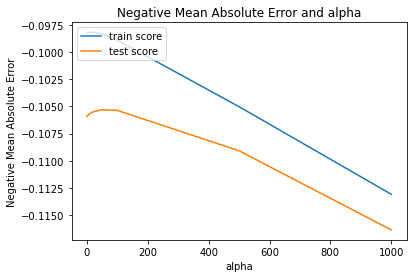

In [451]:
cv_results = pd.DataFrame(model_cv.cv_results_)
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()


In [452]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 50}


#### 50 is the optimal cutoff got Ridge regression

In [453]:
#Fitting Ridge model for alpha = 50 and printing coefficients which have been penalised
alpha = 50
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 0.0100956  -0.02368153 -0.0059342  -0.01865947  0.00738409 -0.02140414
 -0.0202307  -0.01413827  0.01002054  0.01277183 -0.01870591  0.01218024
  0.00833877  0.02448172  0.00923811 -0.00633127 -0.02036471 -0.00623108
 -0.01360544 -0.01063898 -0.00628619 -0.0159169  -0.01085886 -0.01558411
 -0.02369949 -0.01366525  0.0187909   0.09955162  0.04466441  0.01238995
  0.03293239  0.02193966  0.02052074  0.027881    0.03790725  0.02268168
  0.01847256 -0.0133106   0.03221522  0.06302378  0.01115312  0.02637636
 -0.00993147  0.03256981  0.03105295  0.01309796  0.00797231  0.00686069
  0.01064596 -0.01626665]


In [454]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8795884558410495
0.8671083851772365
19.32511872080245
9.57730878337742
0.018927638316163026
0.021866001788532922


## Lasso

In [455]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.0s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [456]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


##### The optimal lambda value for Lasso is 0.0001

In [457]:
#Fitting Ridge model for alpha = 0.0001 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [458]:
lasso.coef_

array([ 0.00695758, -0.0266364 , -0.00599504, -0.01943318,  0.00641701,
       -0.02280067, -0.02543639, -0.01535402,  0.01001655,  0.01486347,
       -0.02169289,  0.02136747,  0.01162723,  0.03348326,  0.00713265,
       -0.00736252, -0.02200159, -0.00638639, -0.01207935, -0.00844258,
       -0.00721824, -0.01593484, -0.01143033, -0.01905025, -0.0283621 ,
       -0.0170704 ,  0.01860303,  0.11036338,  0.04676714,  0.0105462 ,
        0.03251768,  0.02207819,  0.02033136,  0.02993809,  0.03973475,
        0.02515544,  0.01637798, -0.01483584,  0.02919176,  0.06834297,
        0.00665121,  0.02716059, -0.01418083,  0.03536805,  0.02810864,
        0.01310589,  0.00906011,  0.00653187,  0.01053872, -0.01426735])

In [459]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)





0.8803621350645658
0.8681438655434669
19.20094920739986
9.502683193043985
0.01880602273006842
0.021695623728410926


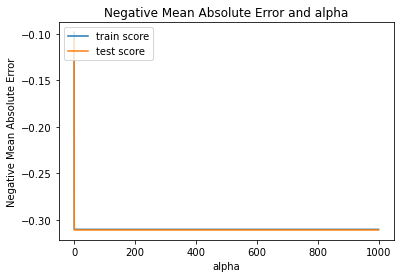

In [460]:
cv_results = pd.DataFrame(model_cv.cv_results_)
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [461]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.880368,0.879588,0.880362
1,R2 Score (Test),0.868076,0.867108,0.868144
2,RSS (Train),19.200062,19.325119,19.200949
3,RSS (Test),9.507559,9.577309,9.502683
4,MSE (Train),0.137132,0.137578,0.137135
5,MSE (Test),0.147332,0.147872,0.147294


### <font color=red> <u>__INFERENCE__</u> 
    R2 for test and train is almost same for Linear, Ridge and Lasso Regression
    All the other values remain same amoung all 3 regression types
    
    The R2 score noth test and train is above 85% indicating the model is doing pretty well
    The Mean square error is about 13%-14% indicating that the model is well
    
    Of all 3 models 


#### <Font color=blue> The Optimal Cut off for Ridge Regression is 50
    
#### <Font color=blue> The Optimal Cut off for Lasso Regression is 0.0001


In [462]:
betas = pd.DataFrame(index=X_train.columns) #create new df with columns from X_train

In [463]:
betas.rows = X_train.columns #set rows of new df

In [464]:
#add the coeff from all models 
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [465]:
pd.set_option('display.max_rows', None)
betas.head(50) #show data of df

,Linear,Ridge,Lasso
MSzon__RL,0.006872,0.010096,0.006958
MSzon__RM,-0.026682,-0.023682,-0.026636
Lotcon__Inside,-0.006085,-0.005934,-0.005995
Neig__Edwards,-0.019523,-0.018659,-0.019433
Neig__Others,0.006497,0.007384,0.006417
Con1__Others,-0.022974,-0.021404,-0.022801
HouseS1__2Story,-0.025870,-0.020231,-0.025436
HouseS1__Others,-0.015476,-0.014138,-0.015354
RoofS1__Others,0.010049,0.010021,0.010017
Ext1__Others,0.015252,0.012772,0.014863


### <font color=red> <u>__INFERENCE__</u> 
    There is a small change in coefficient values for the 3 regression.
    OverallQual seem to have the highest Coeff for all 3 models
    
    All the 3 models are built on following Variables :
    ['MSzon__RL', 'MSzon__RM', 'Lotcon__Inside', 'Neig__Edwards',
       'Neig__Others', 'Con1__Others', 'HouseS1__2Story', 'HouseS1__Others',
       'RoofS1__Others', 'Ext1__Others', 'Ext2__Others', 'Fon1__CBlock',
       'Fon1__Others', 'Fon1__PConc', 'BsmtFT1__GLQ', 'BsmtFT1__Rec',
       'BsmtFT1__Unf', 'GarTp__BuiltIn', 'GarTp__Detchd', 'GarTp__Others',
       'GarFnsh__RFn', 'GarFnsh__Unf', 'Fence__Others', 'SaleTyp__Others',
       'SaleTyp__WD', 'Salecon__Others', 'LotArea', 'OverallQual',
       'OverallCond', 'MasVnrArea', 'BsmtQual', 'BsmtExposure', 'HeatingQC',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Age']
    


In [466]:
#getting absolute value for each coeff so that we can analyse better
betas['Laabs']=betas['Lasso'].apply(lambda x: abs(x))
betas['Rabs']=betas['Ridge'].apply(lambda x: abs(x))
betas['Labs']=betas['Linear'].apply(lambda x: abs(x))

In [467]:
####  The TOP 15 Variables that affect the price of house based on Ridge Regression is 
betas_top15=betas.sort_values(by='Rabs', ascending=False)
betas_top15[['Ridge','Rabs']].head(10)

,Ridge,Rabs
OverallQual,0.099552,0.099552
TotRmsAbvGrd,0.063024,0.063024
OverallCond,0.044664,0.044664
FullBath,0.037907,0.037907
BsmtQual,0.032932,0.032932
GarageCars,0.032570,0.032570
KitchenQual,0.032215,0.032215
GarageArea,0.031053,0.031053
BsmtFullBath,0.027881,0.027881
FireplaceQu,0.026376,0.026376


In [468]:
betas_top15[['Ridge','Rabs']].head(10).index

Index(['OverallQual', 'TotRmsAbvGrd', 'OverallCond', 'FullBath', 'BsmtQual',
       'GarageCars', 'KitchenQual', 'GarageArea', 'BsmtFullBath',
       'FireplaceQu'],
      dtype='object')

#### <Font color=blue> The TOP 10 Variables that affect the price of house based on Ridge Regression are 
['OverallQual', 'TotRmsAbvGrd', 'OverallCond', 'FullBath', 'BsmtQual',
       'GarageCars', 'KitchenQual', 'GarageArea', 'BsmtFullBath',
       'FireplaceQu']
   
    1. Overall Quality
   
    2. Total rooms above grade (does not include bathrooms)
    
    3. Overall condition of the house
    
    4. Full bathrooms above grade
    
    5. Basement Quality
    
    6. Size of garage in car capacity
    
    7. Kitchen Qulity
    
    8. Garage Area
    
    9. Basement full bathrooms
    
    10. Fireplace Quality
 ##### Saleprice is directly proportional to the above mentioned varibales

In [469]:
####  The TOP 10 Variables that affect the price of house based on Ridge Regression is 
betas_top15=betas.sort_values(by='Laabs', ascending=False)
betas_top15[['Lasso','Laabs']].head(10)

,Lasso,Laabs
OverallQual,0.110363,0.110363
TotRmsAbvGrd,0.068343,0.068343
OverallCond,0.046767,0.046767
FullBath,0.039735,0.039735
GarageCars,0.035368,0.035368
Fon1__PConc,0.033483,0.033483
BsmtQual,0.032518,0.032518
BsmtFullBath,0.029938,0.029938
KitchenQual,0.029192,0.029192
SaleTyp__WD,-0.028362,0.028362


In [470]:
betas_top15[['Ridge','Rabs']].head(10).index

Index(['OverallQual', 'TotRmsAbvGrd', 'OverallCond', 'FullBath', 'GarageCars',
       'Fon1__PConc', 'BsmtQual', 'BsmtFullBath', 'KitchenQual',
       'SaleTyp__WD'],
      dtype='object')

#### <Font color=blue> The TOP 10 Variables that affect the price of house based on Lasso Regression are 
['OverallQual', 'TotRmsAbvGrd', 'OverallCond', 'FullBath', 'GarageCars',
       'Fon1__PConc', 'BsmtQual', 'BsmtFullBath', 'KitchenQual',
       'SaleTyp__WD']
    
       
    1. Overall Quality
   
    2. Total rooms above grade (does not include bathrooms)
    
    3. Overall condition of the house
    
    4. Full bathrooms above grade
    
    5. Size of garage in car capacity
    
    6. Poured Contrete Foundation
    
    7. Basement Quality
    
    8. Basement full bathrooms
    
    9. Kitchen Quality
    
    10. Warranty Deed - Conventional SaleType
    
 ##### Saleprice is directly proportional to the above mentioned varibales except Warranty Deed - Conventional SaleType, which is inversely proprotional 

### Variables that are significant in predicting the sales price are:
    MSZoning,
    LotConfig,
    Neighborhood,
    Condition1,
    HouseStyle,
    RoofStyle,
    Exterior1st,
    Exterior2nd,
    Foundation,
    BsmtFinType1,
    GarageType,
    GarageFinish,
    Fense,
    SaleType,
    SaleCondition,
    LotArea,
    OverallQual,
    OverallCond,
    MasVnrArea,
    BsmtQual,
    BsmtExposure,
    HeatingQC,
    BsmtFullBath,
    FullBath,
    HalfBath,
    BedroomAbvGr,
    KitchenAbvGr,
    KitchenQual,
    TotRmsAbvGrd,
    Fireplaces,
    FireplaceQu,
    GarageYrBlt,
    GarageCars,
    GarageArea,
    WoodDeckSF,
    EnclosedPorch,
    3SsnPorch,
    ScreenPorch,
    Age

### <font color=green> SUBJECTIVE QUESTION

Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

 

In [471]:
#Fitting Ridge model for alpha = 100 (50x2)
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

#Fitting Ridge model for alpha = 0.0002(0.0001x2) 

alpha =0.0002
lasso = Lasso(alpha=alpha) 
lasso.fit(X_train, y_train) 


betas['Ridge_new']=ridge.coef_
betas['Lasso_new'] = lasso.coef_
betas

,Linear,Ridge,Lasso,Laabs,Rabs,Labs,Ridge_new,Lasso_new
MSzon__RL,0.006872,0.010096,0.006958,0.006958,0.010096,0.006872,0.011875,0.007044
MSzon__RM,-0.026682,-0.023682,-0.026636,0.026636,0.023682,0.026682,-0.021900,-0.026588
Lotcon__Inside,-0.006085,-0.005934,-0.005995,0.005995,0.005934,0.006085,-0.005860,-0.005905
Neig__Edwards,-0.019523,-0.018659,-0.019433,0.019433,0.018659,0.019523,-0.017977,-0.019344
Neig__Others,0.006497,0.007384,0.006417,0.006417,0.007384,0.006497,0.007979,0.006337
Con1__Others,-0.022974,-0.021404,-0.022801,0.022801,0.021404,0.022974,-0.020144,-0.022627
HouseS1__2Story,-0.025870,-0.020231,-0.025436,0.025436,0.020231,0.025870,-0.016262,-0.025003
HouseS1__Others,-0.015476,-0.014138,-0.015354,0.015354,0.014138,0.015476,-0.013094,-0.015231
RoofS1__Others,0.010049,0.010021,0.010017,0.010017,0.010021,0.010049,0.009755,0.009984
Ext1__Others,0.015252,0.012772,0.014863,0.014863,0.012772,0.015252,0.010992,0.014477


##### The Optimalvalue for Ridge Regression is 50 and for Lasso Regression is 0.0001. When we increase the Lamba value to twice the optimal value then there would be more penialization. However, the Overall Quality is still the variable with most importance

_______________________________

Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [472]:
#### The five most important predictor values are ['OverallQual', 'TotRmsAbvGrd', 'OverallCond', 'FullBath', 'GarageCars']

X_train_new=X_train.drop(['OverallQual', 'TotRmsAbvGrd', 'OverallCond', 'FullBath', 'GarageCars'],axis = 1)
model_cv_new = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_new.fit(X_train_new, y_train) 


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.7s finished


GridSearchCV(cv=5, estimator=Lasso(alpha=0.0002),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [473]:
# Printing the best hyperparameter alpha
print(model_cv_new.best_params_)

{'alpha': 0.001}


In [474]:
alpha =0.001
lasso_new = Lasso(alpha=alpha) 
lasso_new.fit(X_train_new, y_train) 

b2 = pd.DataFrame(index=X_train_new.columns)
b2.rows = X_train.columns
b2['Lasso_new'] = lasso_new.coef_
b2['Lasso_new']

MSzon__RL          0.012725
MSzon__RM         -0.016305
Lotcon__Inside    -0.006617
Neig__Edwards     -0.019868
Neig__Others       0.017523
Con1__Others      -0.019486
HouseS1__2Story    0.001823
HouseS1__Others   -0.008033
RoofS1__Others     0.008118
Ext1__Others       0.017230
Ext2__Others      -0.020405
Fon1__CBlock      -0.000964
Fon1__Others       0.011390
Fon1__PConc        0.017538
BsmtFT1__GLQ       0.019218
BsmtFT1__Rec      -0.006148
BsmtFT1__Unf      -0.015863
GarTp__BuiltIn    -0.003717
GarTp__Detchd     -0.019276
GarTp__Others     -0.026323
GarFnsh__RFn      -0.008487
GarFnsh__Unf      -0.031564
Fence__Others     -0.007337
SaleTyp__Others   -0.013234
SaleTyp__WD       -0.025114
Salecon__Others   -0.016482
LotArea            0.021416
MasVnrArea         0.023148
BsmtQual           0.061666
BsmtExposure       0.027128
HeatingQC          0.034364
BsmtFullBath       0.012098
HalfBath           0.019746
BedroomAbvGr       0.070260
KitchenAbvGr       0.002150
KitchenQual        0

#### New 5 most important factors KitchenQual, GarageArea, BedroomAbvGr, BsmtQual,FireplaceQu